<a href="https://colab.research.google.com/github/codecraftingwarrior/claim-spot/blob/main/HAI817_fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJET MACHINE LEARNING**

---


**GUEYE** El Hadji Ahmadou, **HENRY** Nathan, **BENGOUFA** Ryan et **BOURRET** Maxime

# **Tâche 0 : Importation et Visualisation des données**

Installation de bibliothèques tierces :

In [1]:
# Installation de la bibliothèque langdetect pour la détection de la langue
!pip install langdetect

# Installation de la bibliothèque contractions pour gérer les contractions dans le texte
!pip install contractions

# Installation de la bibliothèque wordcloud pour générer des nuages de mots
!pip install wordcloud

# Installation de la bibliothèque imbalanced-learn pour le rééquilibrage des données
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importation de diverse librairie Python et téléchargement des ressources nécessaires pour le traitement du langage naturel (NLP) :

In [2]:
# Ignore les avertissements liés aux futures modifications de la librairie
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import unicodedata

# Librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import contractions

# Librairie BeautifulSoup pour traiter les documents HTML et XML
from bs4 import BeautifulSoup

# Librairies d'affichage
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import inflect

# Librairies pour la détection de langues
import langdetect 
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import RegexpParser

# Il est possible de charger l'ensemble des librairies en une seule fois :
# nltk.download('all') 

# Téléchargement des ressources nécessaires pour NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
nltk.download('tagsets')
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import ne_chunk

# Librairie spaCy pour le traitement du langage naturel
import spacy
from spacy.tokens import Span

# Il faut sélectionner dans quelles langues les traitements vont être faits
# !python -m spacy download en_core_web_sm

# Chargement du modèle spaCy pour l'anglais
nlp = spacy.load("en_core_web_sm")
from spacy.lang.fr import French

# Téléchargement des ressources pour la gestion des langues dans NLTK
import nltk
nltk.download('omw-1.4')

# Importation des fonctions pour les tags de parties de discours (POS)
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Chargement du modèle spaCy pour l'anglais et création d'une instance de la classe Inflect
nlp = spacy.load("en_core_web_sm")
p = inflect.engine()

# Importation des classes et fonctions de scikit-learn pour le traitement du texte et les pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline

from collections import Counter

# Importation des classificateurs de scikit-learn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Importation des fonctions de validation croisée de scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Importation des métriques de performance de scikit-learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Importation de la bibliothèque tabulate pour un affichage de tableaux amélioré
from tabulate import tabulate

# Importation de LabelEncoder pour convertir les étiquettes en valeurs numériques
from sklearn.preprocessing import LabelEncoder

# Importation de la fonction de upsampling
from imblearn.over_sampling import RandomOverSampler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker

Lie notre Google Drive au Notebook pour accéder à nos fichiers :

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Accès et navigation dans les répertoires de notre Google Drive :

In [4]:
# Attribution du chemin complet du répertoire de notre projet dans une variable
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/ML_FDS/Projet Fake News Detection'

# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)

# Se positionner sur le répertoire associé
%cd $my_local_drive

# Affiche le répertoire de travail actuel
%pwd

/content/gdrive/My Drive/Colab Notebooks/ML_FDS/Projet Fake News Detection


'/content/gdrive/My Drive/Colab Notebooks/ML_FDS/Projet Fake News Detection'

Fonctions utilities (affichage, confusion...) et pré-traitement du texte :

In [5]:
# Affiche un nuage de mots à partir d'un texte donné
def show_wordcloud(text):
    # Crée un objet WordCloud avec les paramètres spécifiés
    wordCloud = wordcloud.WordCloud(width=1600, height=800, random_state=21, max_font_size=110, collocations=False)
    # Affiche le nuage de mots avec une taille de figure spécifiée
    plt.figure(figsize=(15, 10))
    plt.imshow(wordCloud.generate(text), interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Normalise et encode un texte en ASCII
def normalize_and_encode_text(text):
    # Normalise le texte en utilisant la forme NFKD (forme de décomposition canonique)
    normalized_string = unicodedata.normalize('NFKD', text)
    # Encode le texte normalisé en ASCII en ignorant les caractères non-ASCII
    ascii_encoded_string = normalized_string.encode('ascii', 'ignore')
    # Retourne la chaîne décodée en ASCII
    return ascii_encoded_string.decode('ascii')

# Nettoie une phrase en supprimant les caractères spéciaux, les caractères uniques et les espaces multiples
def clean_sentence(sentence):
    # Supprime des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # Supprime les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # Remplace les espaces multiple par une seul espace 
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)
    return sentence

# Supprime les mots vides (stop words) d'une liste de mots (tokens)
def remove_stop_words(tokens):
    # Crée un ensemble de mots vides en anglais
    the_stopwords=set(stopwords.words("english"))
    # Retourne une liste de mots sans les mots vides
    return [word for word in tokens if word not in the_stopwords]

# Lemmatise une liste de phrases en utilisant la bibliothèque spaCy
def lemmatize(sentences):
    lemmas = []

    for sentence in sentences:
      # Nettoie la phrase en utilisant la fonction clean_sentence
      sentence = clean_sentence(sentence)
      # Traite la phrase avec spaCy
      doc = nlp(sentence)
      # Ajoute les lemmes de chaque token de la phrase à la liste des lemmes
      lemmas = lemmas + [token.lemma_ for token in doc]

    return lemmas

# Tokénise les tweet
def tweet_tokenization(s, lowercase=False):
  # Traitement des émoticones
  emoticons_str = r"""
      (?:
          [:=;] # Eyes
          [oO\-]? # Nose (optional)
          [D\)\]\(\]/\\OpP] # Mouth
      )"""

  # Prise en compte des éléments qui doivent être regroupés
  regex_str = [
      emoticons_str, # Émoticônes
      r'<[^>]+>', # Balises HTML
      r'(?:@[\w_]+)', # Mentions avec @
      r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # Hashtags
      r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
      r'(?:(?:\d+,?)+(?:\.?\d+)?)', # Nombres
      r"(?:[a-z][a-z'\-_]+[a-z])", # Mots avec - et '
      r'(?:[\w_]+)', # Autres mots
      r'(?:\S)' # Le reste
  ]

  # Compilation des expressions régulières pour la tokenisation
  tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
  emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
  
  # Recherche des tokens correspondant aux expressions régulières
  tokens = tokens_re.findall(s)

  # Conversion en minuscules si nécessaire, sauf pour les émoticônes
  if lowercase:
      tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]

  return tokens

"""
    -DOCUMENTATION-

    Cette fonction effectue le prétraitement de texte sur une chaîne de caractères donnée, en appliquant les différentes opérations de nettoyage et de transformation demandées.

    Args:
        text (str): La chaîne de caractères à traiter.
        lowercase (bool): Si True, les caractères de la chaîne seront convertis en minuscules.
        remove_stopwords (bool): Si True, les mots vides (stopwords) seront supprimés de la chaîne.
        remove_digits (bool): Si True, les chiffres seront supprimés de la chaîne.
        convert_digits (bool): Si True, les chiffres présents dans la chaîne seront convertis en lettres correspondantes.
        do_stem (bool): Si True, les mots dans la chaîne seront réduits à leur radical.
        do_lemmatize (bool): Si True, les mots dans la chaîne seront ramenés à leur forme canonique.
        pos_tagging (bool): Si True, la fonction effectuera une étiquetage grammatical (POS tagging) sur les mots de la chaîne.
        replace_contractions (bool): Si True, les contractions seront remplacées par leur forme étendue.

    Returns:
        list[str]: La chaîne de caractères prétraitée sous forme de liste de mots. / Retourne un tableau de tuple quand pos_tagging=True

    Examples:
        >>> text = "Bonjour, voici un exemple de texte à prétraiter. Il contient des mots vides et des chiffres, 123."
        >>> preprocess_text(text, lowercase=True, remove_stopwords=True, remove_digits=True, do_stem=True, replace_contractions=True)
        ['bonjour', 'exemple', 'texte', 'prétraiter', 'contient', 'mots', 'vides', 'chiffres', 'cent', 'vingt', 'trois']
"""
def preprocess_text(text, lowercase=False, remove_stopwords=False, remove_digits=False, convert_digits=False, do_stem=False, do_lemmatize=False, replace_contractions=False, tokenization_strategy='nltk'):
    
    # 1. Normalisation et encodage du texte
    text = normalize_and_encode_text(text)

    # 2. Ajout d'un espace après chaque point et suppression des espaces multiples
    text = re.sub(r'\.(?!\s)', '. ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # 3. Remplacement des contractions si nécessaire
    if replace_contractions:
      text = contractions.fix(text)

    # 4. Tokenisation du texte
    if tokenization_strategy == 'tweet':
      tokens = tweet_tokenization(text)
    else:
      tokens = word_tokenize(text)

    # 5. Suppression des ponctuations
    table = str.maketrans('', '', string.punctuation)
    tokens = [token.translate(table) for token in tokens]

    # 6. Suppression des mots non alphanumériques
    tokens = [word for word in tokens if word.isalnum()]

    # 7. Conversion en minuscules si nécessaire
    if lowercase:
      tokens = [token.lower() for token in tokens]
    
    # 8. Suppression des chiffres si nécessaire
    if remove_digits:
      tokens = [word for word in tokens if not word.isdigit()]

    # 9. Conversion des chiffres en lettres si nécessaire
    if convert_digits:
      for i in range(len(tokens)):
        if tokens[i].isdigit():
          tokens[i] = p.number_to_words(tokens[i])

    # 10. Suppression des stopwords si nécessaire
    if remove_stopwords:
      tokens = remove_stop_words(tokens)

    # 11. Réduction à la racine (stemming) si nécessaire
    if do_stem:
      stemmer=nltk.stem.porter.PorterStemmer()
      tokens = [stemmer.stem(word)for word in tokens]

    # 12. Lemmatisation si nécessaire
    if do_lemmatize:
      lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
      tokens = [lemmatizer.lemmatize(word) for word in tokens]


    # 14. Retourne les tokens prétraités
    return tokens

Évaluation et comparaison des performances de différents modèles de classification :

In [6]:
# Classe pour stocker les résultats de la validation croisée
class CrossValResult:
  def __init__(self,name, scoremean, std, ellapsed_time):
         self.name = name # Nom du modèle
         self.scoremean = scoremean # Moyenne des scores
         self.std = std # Écart-type des scores
         self.ellapsed_time = ellapsed_time # Temps écoulé lors de l'exécution
  
  # Méthode pour représenter l'objet sous forme de chaîne
  def __repr__(self):
      return repr((self.name, self.scoremean, self.std,self.ellapsed_time))

# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(confusion_matrix, labels):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(8, 5))
 
    plt.title("Matrice de confusion")
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'},fmt='g')
 
    ax.set_xticklabels(labels,rotation=45)
    ax.set_yticklabels(labels,rotation=0)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()
    plt.close() 

# Fonction pour afficher différentes métriques de performance
def show_scores(y_test, y_pred, show_accuracy=False, show_recall=False, show_precision=False, show_f1_score=False, show_classification_report=False, show_confusion_matrix=False):
  classes = np.unique(y_test)

  if show_accuracy:
    print("Accuracy : %0.3f"%(accuracy_score(y_test, y_pred)))

  if show_recall:
    print("Recall : %0.3f"%(recall_score(y_test, y_pred, average='weighted')))

  if show_precision:
    print("Precision : %0.3f"%(precision_score(y_test, y_pred, average='weighted')))

  if show_f1_score:
    print("f1_Score : %0.3f"%(f1_score(y_test, y_pred, average='weighted')))

  if show_classification_report:
    print("Classification Report")
    print(classification_report(y_test, y_pred,digits=5))
  
  if show_confusion_matrix:
    cnf_matrix = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cnf_matrix, classes)

Classe de prétraitement du texte qui applique des transformations personnalisées : 

In [7]:
# Classe héritant de BaseEstimator et TransformerMixin pour la préparation du texte
class TextPreprocessor(BaseEstimator, TransformerMixin):

  # Initialisation des paramètres de prétraitement
  def __init__(self, lowercase=False, remove_stopwords=False, remove_digits=False, convert_digits=False, do_stem=False, do_lemmatize=False, pos_tagging=False, replace_contractions=False):
      self.lowercase = lowercase
      self.remove_stopwords = remove_stopwords
      self.remove_digits = remove_digits
      self.convert_digits = convert_digits
      self.do_stem = do_stem
      self.do_lemmatize = do_lemmatize
      self.pos_tagging = pos_tagging

  # Applique le prétraitement sur chaque texte du corpus
  def transform(self, corpus, **transform_params):
    return [' '.join(preprocess_text(
        text, 
        lowercase=self.lowercase, 
        remove_stopwords=self.remove_stopwords, 
        remove_digits=self.remove_digits, 
        convert_digits=self.convert_digits,
        do_stem=self.do_stem,
        do_lemmatize=self.do_lemmatize
      )) for text in corpus
    ]

  # Ne fait rien et retourne l'instance de la classe
  def fit(self, X, y=None, **fit_params):
    return self
  
  # Applique "fit" et "transform" en une seule méthode
  def fit_transform(self, X, y=None, **fit_params):
      return self.fit(X).transform(X)

  # Retourne les paramètres actuels de l'instance
  def get_params(self, deep=True):
    return {
        'lowercase':self.lowercase,
        'remove_stopwords':self.remove_stopwords,
        'remove_digits':self.remove_digits,
        'convert_digits':self.convert_digits,
        'do_stem':self.do_stem,
        'do_lemmatize': self.do_lemmatize,
        'pos_tagging':self.pos_tagging
    }    
  
  # Met à jour les paramètres de l'instance
  def set_params (self, **parameters):
      for parameter, value in parameters.items():
          setattr(self,parameter,value)
      return self 


Évaluation des performances de différents prétraitements de texte sur un classificateur donné :

In [8]:
def preprocessing_evaluation(X, y, classifier):

  # Définition des pipelines de prétraitement avec CountVectorizer
  CV_lowercase = Pipeline([
      ('preprocessor', TextPreprocessor(lowercase=True)), 
      ('vectorizer', CountVectorizer()),
      ('clf', classifier)
  ])

  CV_low_sw = Pipeline([
      ('preprocessor', TextPreprocessor(remove_stopwords=True, lowercase=True)), 
      ('vectorizer', CountVectorizer()),
      ('clf', classifier)
  ])

  CV_low_sw_stem = Pipeline([
      ('preprocessor', TextPreprocessor(remove_stopwords=True, lowercase=True, do_stem=True)), 
      ('vectorizer', CountVectorizer()),
      ('clf', classifier)
  ])

  CV_low_sw_lem = Pipeline([
      ('preprocessor', TextPreprocessor(remove_stopwords=True, lowercase=True, do_lemmatize=True)), 
      ('vectorizer', CountVectorizer()),
      ('clf', classifier)
  ])

  CV_low_sw_lem_rc_cd = Pipeline([
      ('preprocessor', TextPreprocessor(remove_stopwords=True, lowercase=True, do_lemmatize=True, replace_contractions=True, convert_digits=True)), 
      ('vectorizer', CountVectorizer()),
      ('clf', classifier)
  ])

  CV_low_sw_lem_rc_rd = Pipeline([
      ('preprocessor', TextPreprocessor(remove_stopwords=True, lowercase=True, do_lemmatize=True, replace_contractions=True, remove_digits=True)), 
      ('vectorizer', CountVectorizer()),
      ('clf', classifier)
  ])

  # Définition des pipelines de prétraitement avec TfidfVectorizer
  TFIDF_lowercase = Pipeline([
      ('preprocessor', TextPreprocessor(lowercase=True)), 
      ('vectorizer', TfidfVectorizer()),
      ('clf', classifier)
  ])

  TFIDF_low_sw = Pipeline([
      ('preprocessor', TextPreprocessor(remove_stopwords=True,lowercase=True)), 
      ('vectorizer', TfidfVectorizer()),
      ('clf', classifier)
  ])

  TFIDF_low_sw_stem = Pipeline([
      ('preprocessor', TextPreprocessor(remove_stopwords=True,lowercase=True,do_stem=True)), 
      ('vectorizer', TfidfVectorizer()),
      ('clf', classifier)
  ])

  TFIDF_low_sw_lem = Pipeline([
      ('preprocessor', TextPreprocessor(remove_stopwords=True,lowercase=True,do_lemmatize=True)), 
      ('vectorizer', TfidfVectorizer()),
      ('clf', classifier)
  ])

  TFIDF_low_sw_lem_rc_cd = Pipeline([
      ('preprocessor', TextPreprocessor(remove_stopwords=True,lowercase=True,do_lemmatize=True, replace_contractions=True, convert_digits=True)), 
      ('vectorizer', TfidfVectorizer()),
      ('clf', classifier)
  ])

  TFIDF_low_sw_lem_rc_rd = Pipeline([
      ('preprocessor', TextPreprocessor(remove_stopwords=True,lowercase=True,do_lemmatize=True, replace_contractions=True, remove_digits=True)), 
      ('vectorizer', TfidfVectorizer()),
      ('clf', classifier)
  ])

  # Liste de tous les modèles à tester
  all_models = [
      ("CV_lowercase", CV_lowercase),
      ("CV_low_sw", CV_low_sw),
      ("CV_low_sw_stem",CV_low_sw_stem),
      ("CV_low_sw_lem", CV_low_sw_lem),
      ("CV_low_sw_lem_rc_cd", CV_low_sw_lem_rc_cd),
      ("CV_low_sw_lem_rc_rd",CV_low_sw_lem_rc_rd),
      ("TFIDF_lowercase", TFIDF_lowercase),
      ("TFIDF_low_sw", TFIDF_low_sw),
      ("TFIDF_low_sw_stem", TFIDF_low_sw_stem),
      ("TFIDF_low_sw_lem", TFIDF_low_sw_lem),
      ("TFIDF_low_sw_lem_rc_cd", TFIDF_low_sw_lem_rc_cd),
      ("TFIDF_low_sw_lem_rc_rd", TFIDF_low_sw_lem),
  ]

  # Évaluation des différents pipelines
  print ("Evaluation des différentes configurations : ")

  # Calcul des scores de validation croisée pour chaque pipeline en utilisant la fonction cross_val_score() avec 5 plis (cv=5)
  # et en calculant la moyenne des scores obtenus
  unsorted_scores = [(name, cross_val_score(model, X, y, cv=5).mean()) for name, model in all_models]

  # Trie les scores dans l'ordre décroissant (du plus élevé au plus bas)
  # en utilisant la fonction sorted() et une fonction lambda pour comparer les scores
  scores = sorted(unsorted_scores, key=lambda x: -x[1])

  # Affichage des scores dans un tableau formaté en utilisant la fonction tabulate() pour une meilleure lisibilité
  print (tabulate(scores, floatfmt='.4f', headers=('Pipeline', 'Score')))

Évaluation de classificateurs avec validation croisée K-Fold et prétraitement :

In [9]:
def evaluate_classifiers_cross_val(X, y, kfold, vectorizer, preprocessor, classifiers, scoring='accuracy'):
  results = []
  allresults = []
  results = []
  names = []

  # Prétraitement des données en utilisant le préprocesseur
  X_preprocessed=preprocessor.transform(X)

  # Extraction des caractéristiques en utilisant le vectoriseur
  vectorized_corpus = vectorizer.fit_transform(X_preprocessed).toarray()

  # Essai de plusieurs classificateurs en utilisant la validation croisée K-Fold
  for name, model in models:
      # Enregistrement du temps de début pour mesurer la durée d'exécution  
      start_time = time.time()

      # Calcul des résultats de validation croisée pour le modèle actuel
      cv_results = cross_val_score(model, vectorized_corpus, y, cv=kfold, scoring=scoring)

      # Enregistrement du temps écoulé pour exécuter la validation croisée
      end_time = time.time() - start_time

      # Création d'un objet CrossValResult pour stocker les résultats
      result = CrossValResult(name,cv_results.mean(),cv_results.std(),end_time)
      allresults.append(result)

      # Ajout des résultats à la liste pour un affichage ultérieur
      results.append(cv_results)
      names.append(name)

      # Affichage des résultats pour le modèle actuel
      print("%s : %0.3f (%0.3f) in %0.3f s" % (name, cv_results.mean(), cv_results.std(), end_time)) 

  # Tri des résultats par score moyen décroissant
  allresults = sorted(allresults, key=lambda result: result.scoremean, reverse=True)

  # Affichage de tous les résultats
  print ('Tous les résultats : \n')
  for result in allresults:
      print (result.name, ' %s : %0.3f' %(scoring,result.scoremean),  ' (%0.3f)'%result.std, ' en %0.3f '%result.ellapsed_time,' s')
  
  return results

Chargement des ensembles de données d'entraînement et de test et vérification des valeurs manquantes :

In [10]:
# Définition des noms de colonnes
names = ['PID', 'ID', 'Text', 'Title', 'Our rating']

# Chargement des données d'entraînement et de test depuis les fichiers CSV
df_train = pd.read_csv("Dataset/train.csv", sep=",", skiprows=1, names=names, usecols=[col for col in names if col != 'PID'])
df_test = pd.read_csv("Dataset/test.csv", sep=",", skiprows=1, names=names, usecols=[col for col in names if col != 'PID'])
all_classes = df_train['Our rating'].unique()

# Affichage des informations sur les données d'entraînement
print("== Train dataset ==")
# Vérification des valeurs manquantes dans les données d'entraînement
display(df_train.isnull().sum())
print("\n")
# Affichage des notes correspondant aux titres manquants dans les données d'entraînement
display(df_train.loc[df_train['Title'].isnull(), 'Our rating'])

# Affichage des informations sur les données de test
print("\n== Test dataset ==\n")
# Vérification des valeurs manquantes dans les données de test
display(df_test.isnull().sum())
print("\n")

== Train dataset ==


ID             0
Text           0
Title         23
Our rating     0
dtype: int64

483     mixture
510     mixture
533     mixture
555       false
565       false
590       false
591        true
608     mixture
690     mixture
742       other
767       other
774        true
797        true
863        true
879     mixture
898       false
923       false
944     mixture
988       false
1022    mixture
1025    mixture
1037      false
1038       true
Name: Our rating, dtype: object


== Test dataset ==



ID            0
Text          0
Title         0
Our rating    0
dtype: int64

Nettoyage des données et création d'une nouvelle colonne "Text_Title" combinant "Title" et "Text" :

In [11]:
# Remplacement des valeurs manquantes dans la colonne 'Title' par des chaînes vides
df_cleaned = df_train.copy()
df_cleaned_test = df_test.copy()
df_cleaned['Title'] = df_train['Title'].fillna('')

# Concaténation des colonnes 'Title' et 'Text' pour créer une nouvelle colonne 'Text_Title'
df_cleaned['Text_Title'] = df_cleaned.apply(lambda x: x['Title'] + ' ' + x['Text'], axis=1)
df_cleaned_test['Text_Title'] = df_cleaned_test.apply(lambda x: x['Title'] + ' ' + x['Text'], axis=1)


#Creation d'un dataframe unique contenant les données d'entrainement et de test.
df_merged = pd.concat([df_cleaned, df_cleaned_test], axis=0)

Affichage de la taille et de la distribution des notes du jeu de données d'entraînement nettoyé :

== Dataset ==
(1876, 5)


<Axes: xlabel='Our rating', ylabel='count'>

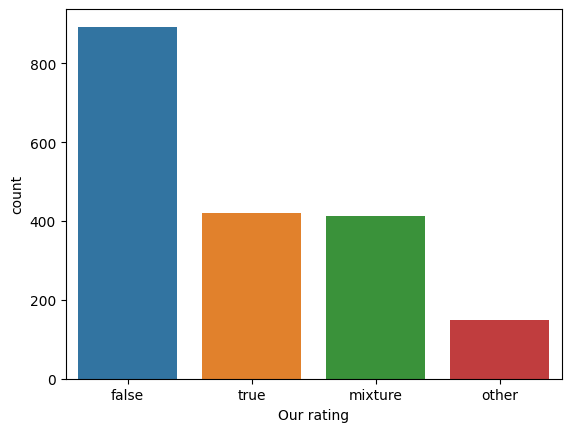

In [12]:
# Affichage de la taille du jeu de donnée fusionnée
print("== Dataset ==")
print(df_merged.shape)

# Création d'un graphique à barres montrant la distribution des notes dans le jeu de données fusionnée
sns.countplot(data=df_merged,  x='Our rating',order=df_merged['Our rating'].value_counts().index)

Vérification des valeurs manquantes dans le jeu de données fusionné :

In [13]:
df_merged.isnull().sum()

ID            0
Text          0
Title         0
Our rating    0
Text_Title    0
dtype: int64

## **WORDCLOUD**

Wordcloud {Text + Titre} -  {True}


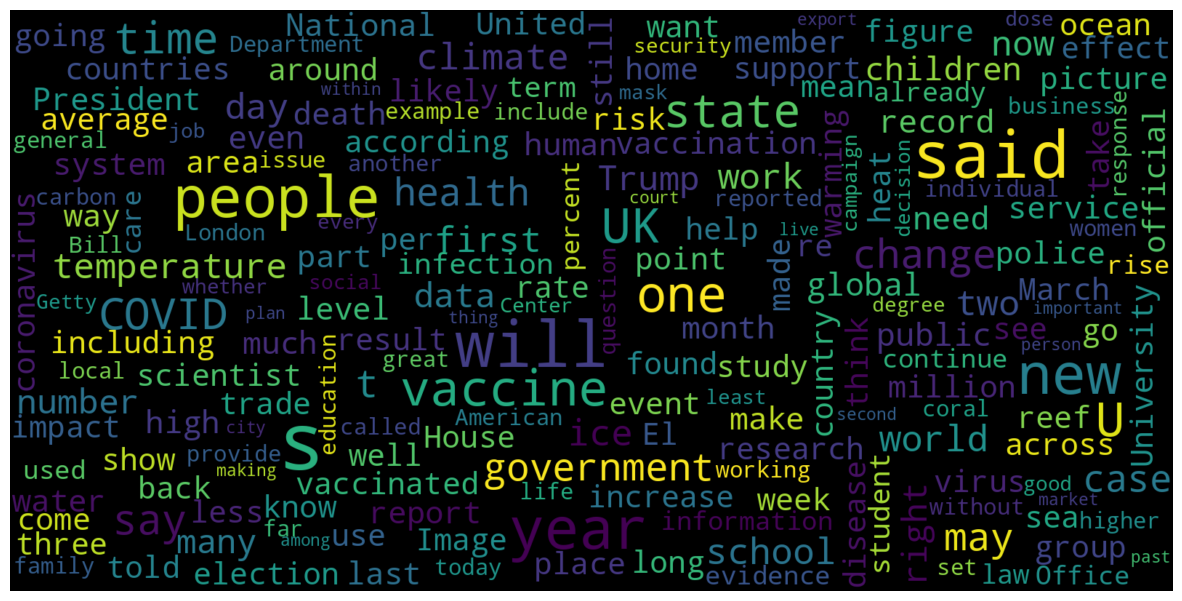

Wordcloud {Text + Titre} -  {False}


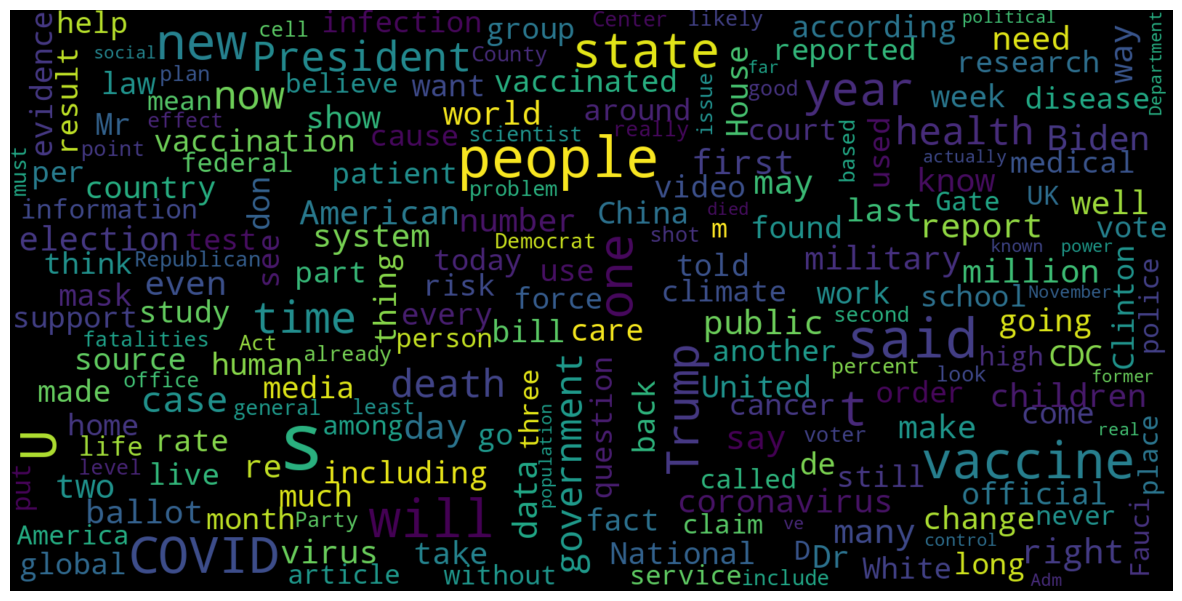

Wordcloud {Text + Titre} -  {Other}


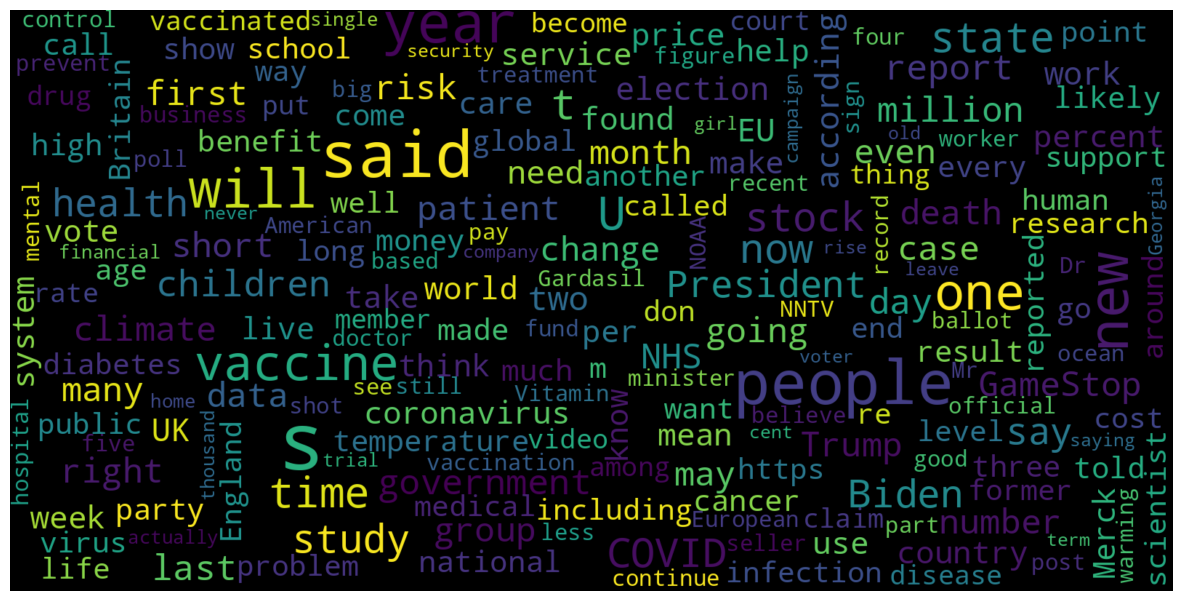

Wordcloud {Text + Titre} -  {Mixture}


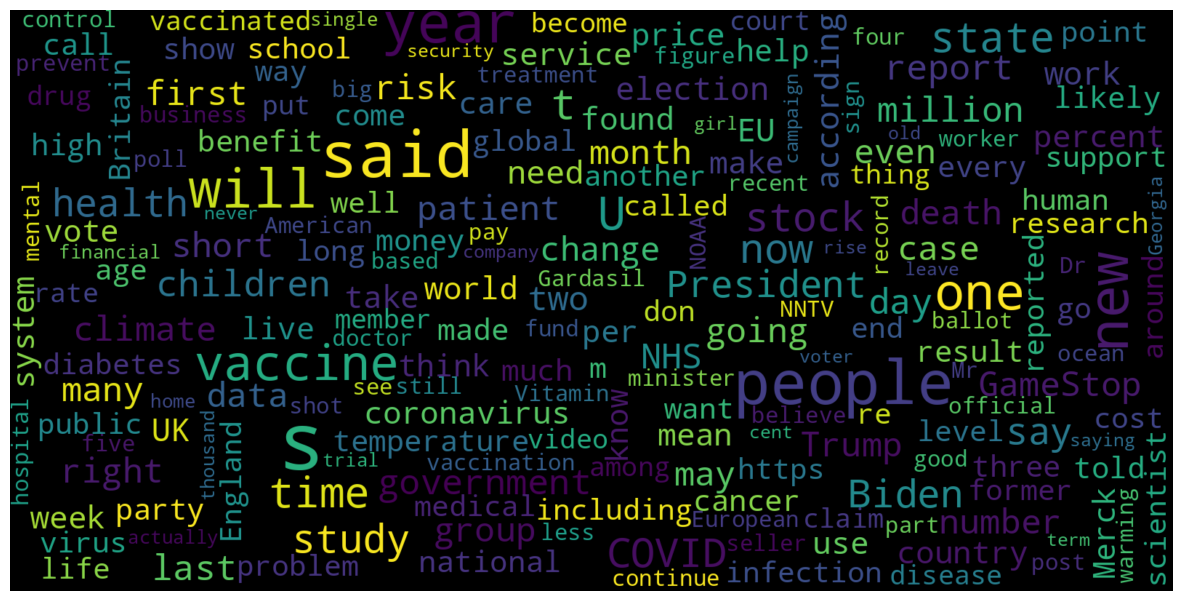

In [14]:
# Nuage de mots pour {texte + titre} articles de classe {true}
merged_real_text = ' '.join(text for text in df_merged['Text_Title'][df_merged['Our rating'] == 'true'].astype(str))
print('Wordcloud {Text + Titre} -  {True}')
show_wordcloud(merged_real_text)

# Nuage de mots pour {texte + titre} articles de classe {false}
merged_real_text = ' '.join(text for text in df_merged['Text_Title'][df_merged['Our rating'] == 'false'].astype(str))
print('Wordcloud {Text + Titre} -  {False}')
show_wordcloud(merged_real_text)

# Nuage de mots pour {texte + titre} articles de classe {other}
merged_real_text = ' '.join(text for text in df_merged['Text_Title'][df_merged['Our rating'] == 'other'].astype(str))
print('Wordcloud {Text + Titre} -  {Other}')
show_wordcloud(merged_real_text)

# Nuage de mots pour {texte + titre} articles de classe {mixture}
merged_real_text = ' '.join(text for text in df_merged['Text_Title'][df_merged['Our rating'] == 'other'].astype(str))
print('Wordcloud {Text + Titre} -  {Mixture}')
show_wordcloud(merged_real_text)

# **Tâche 1 : Classification TRUE VS FALSE**

Dans cette section, nous nous concentrons sur la classification des articles uniquement étiquetés comme `true` ou `false`. Le but de cette classification binaire est d'identifier et de distinguer les articles véridiques des articles trompeurs en utilisant différentes approches de prétraitement et d'extraction de caractéristiques. Pour ce faire, nous ferons la sélection du meilleur prétraitement, l'extraction des features, ainsi que la sélection du modèle dans les trois cas suivants :
 - corpus composé uniquement des **textes des articles**;
 - corpus composé uniquement des **titres des articles**;
 - corpus composé uniquement des **titres des articles concaténés avec leurs contenus (Text)**.

Nous évaluerons à chaque fois les résultats obtenus avant d'entamer la recherche des hyperparamètres du modèle sélectionné afin qu'il soit beaucoup plus performant. En comparant les performances des modèles pour les trois cas mentionnés, nous pourrons déterminer l'importance des titres et des textes des articles dans le processus de classification.

Toujours, nous effectuons l'ensemble des traitements sans rééquilibrage des données avant de procéder à un downsampling, upsampling ou à la combinaison des deux.

## **Texte**

### **Détermination du meilleur pré-traitement**

Création d'un dataframe contenant uniquement les articles étiquetés `true` ou `false` et préparation des ensembles d'entraînement et de test :

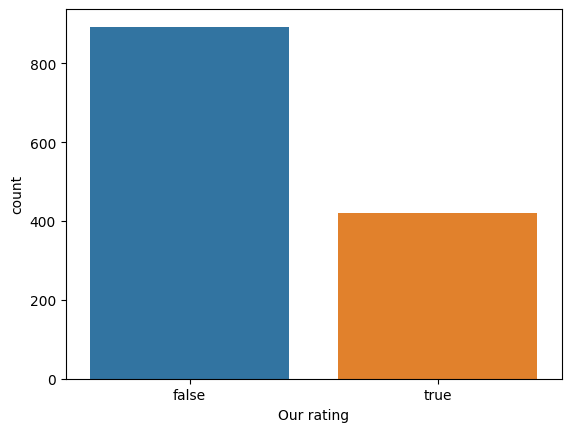

In [17]:
# Copie du DataFrame original pour créer un nouveau DataFrame
df_True_vs_False = df_merged.copy()

# Filtrage des articles en ne gardant que ceux étiquetés "true" ou "false"
df_True_vs_False = df_True_vs_False.loc[(df_True_vs_False['Our rating'] != 'mixture') & (df_True_vs_False['Our rating'] != 'other')]

# Récupération des textes des articles et de leurs étiquettes correspondantes
X = df_True_vs_False['Text']
y = df_True_vs_False['Our rating']

# Définition des tailles des ensembles d'entraînement et de test
train_size=0.7 # 70% pour l'ensemble d'entraînement
test_size= 0.3 # 30% pour l'ensemble de test
seed=7

# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed,test_size=test_size)

# Affichage de la distribution des étiquettes dans le DataFrame filtré
sns.countplot(data=df_True_vs_False,  x='Our rating',order=df_True_vs_False['Our rating'].value_counts().index)

classifiers = []
accuracies = []

Affichage du nombre d'articles pour chaque étiquette `true` et `false` dans le DataFrame filtré :

In [ ]:
df_True_vs_False['Our rating'].value_counts()

false    893
true     421
Name: Our rating, dtype: int64

Évaluation des différentes combinaisons de prétraitement et de vectorisation à l'aide d'un classificateur SVM sur les données :

Nous avons choisi le classifieur SVM car il donne souvent de bons resultats sur des données textuelles. Bien sûr, nous par la suite nous essaierons tous le corpus de données sur plusieurs classifieurs afin de selectionner le plus performant.

Dans la cellule suivante, nous faisons appel à la fonction `preprocessing_evaluation` en lui passant tout le corpus de données afin qu'il fasse une KFold et une validation croisée sur ce dernier avant d'afficher l'accuracy moyenne.

Pour le moment, nous avons choisi l'accuracy global comme score. 

In [ ]:
# Note : peut prendre plusieurs minutes à s'exécuter
preprocessing_evaluation(X, y, SVC())

Evaluation des différentes configurations : 
Pipeline                  Score
----------------------  -------
CV_low_sw_stem           0.7215
CV_low_sw                0.7199
CV_low_sw_lem            0.7192
CV_low_sw_lem_rc_rd      0.7192
TFIDF_lowercase          0.7177
TFIDF_low_sw_stem        0.7139
TFIDF_low_sw_lem         0.7139
TFIDF_low_sw_lem_rc_rd   0.7139
TFIDF_low_sw_lem_rc_cd   0.7116
TFIDF_low_sw             0.7093
CV_low_sw_lem_rc_cd      0.7093
CV_lowercase             0.7017


Aprés avoir lancer les differents pipeline que nous avons pré-défini, nous voyons que la pipeline `CV_low_sw_lem` a donné un score (accuracy) plus elevé que les autres nous utiliserons donc par la suite : 
- Le `CountVectorizer` comme vectorizer pour l'extraction des features.
- Le `TextPreprocessor(lowercase=True, remove_stopwords=True, do_=True)` pour le prétraitement.

### **Essai de plusieurs classifieurs**

Comparaison de différents classificateurs à l'aide d'une validation croisée sur les données d'entraînement :

In [ ]:
# Création d'une liste de modèles de classification pour les comparer
models = [
    ('MNB', MultinomialNB()),
    ('LR', LogisticRegression(max_iter=10000)), 
    ('KNN', KNeighborsClassifier()), 
    ('CART', DecisionTreeClassifier()), 
    ('RF', RandomForestClassifier()), 
    ('GNB', GaussianNB()), 
    ('SVM', SVC())
]

# Définition de la graine pour le générateur de nombres aléatoires, permettant de reproduire les résultats
seed = 7 

# Évaluation des différents classificateurs avec une validation croisée sur les données d'entraînement
cv_results = evaluate_classifiers_cross_val(
    X, 
    y, 
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True), 
    vectorizer=CountVectorizer(),
    preprocessor=TextPreprocessor(lowercase=True, remove_stopwords=True, do_stem=True),
    classifiers=models
)

MNB : 0.786 (0.035) in 7.354 s
LR : 0.819 (0.036) in 119.413 s
KNN : 0.726 (0.043) in 6.737 s
CART : 0.731 (0.032) in 67.449 s
RF : 0.784 (0.047) in 61.626 s
GNB : 0.743 (0.028) in 7.727 s
SVM : 0.766 (0.049) in 277.511 s
Tous les résultats : 

LR  accuracy : 0.819  (0.036)  en 119.413   s
MNB  accuracy : 0.786  (0.035)  en 7.354   s
RF  accuracy : 0.784  (0.047)  en 61.626   s
SVM  accuracy : 0.766  (0.049)  en 277.511   s
GNB  accuracy : 0.743  (0.028)  en 7.727   s
CART  accuracy : 0.731  (0.032)  en 67.449   s
KNN  accuracy : 0.726  (0.043)  en 6.737   s


Les résultat ci - dessus se présente comme suit : `\<nom_classifier> accuracy : \<valeur_accuracy> (\<ecart_type>) en (\<temps_de_calcul>)` et par ordre décroissant. Ainsi, le meilleur score est obtenu avec le classifier `Logistic Regression`.

Visualisation des performances des différents algorithmes de classification à l'aide de boîtes à moustaches :

[Text(1, 0, 'MNB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'GNB'),
 Text(7, 0, 'SVM')]

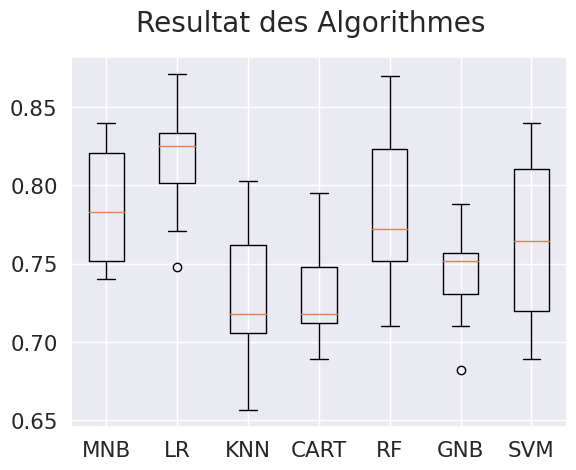

In [ ]:
# Création d'une nouvelle figure pour afficher les résultats des algorithmes
fig = plt.figure()
fig.suptitle('Resultat des Algorithmes')

# Ajout d'un sous-graphique pour afficher les boîtes à moustaches des résultats
ax = fig.add_subplot(111)
plt.boxplot(cv_results)

# Étiquetage des axes x avec les noms des modèles de classification
ax.set_xticklabels([name for (name, model) in models])

Le `Boxplot` représentant les accuracy obtenu pour chaque models lors de la validation croisée montre que, l'algorithme `Logistic Regression (LR)` 
semble offrir de meilleures performances par rapport aux autres modèles sur ce jeu de données. La prochaine étape consistera à explorer et à ajuster les différents hyperparamètres de l'algorithme `LR` afin de trouver la combinaison optimale pour améliorer encore davantage ses performances.

Dans les etapes suivantes nous entamons une analyse détaillée des resultats des 3 classifieurs ayant les meilleurs performance pour avoir une vue d'ensemble.

In [ ]:
preprocessor = TextPreprocessor(lowercase=True, remove_stopwords=True, do_stem=True)
df_True_vs_False['Preprocessed_text'] = preprocessor.transform(df_True_vs_False['Text'])

vectorizer = CountVectorizer()
X_tf = vectorizer.fit_transform(df_True_vs_False['Preprocessed_text'])
y_tf = df_True_vs_False['Our rating']

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, train_size=0.7, random_state=7,test_size=0.3)

#### Logistic Regression Classifier

Accuracy : 0.820
Recall : 0.820
Precision : 0.816
f1_Score : 0.816
Classification Report
              precision    recall  f1-score   support

       false    0.84589   0.90476   0.87434       273
        true    0.74757   0.63115   0.68444       122

    accuracy                        0.82025       395
   macro avg    0.79673   0.76795   0.77939       395
weighted avg    0.81552   0.82025   0.81569       395



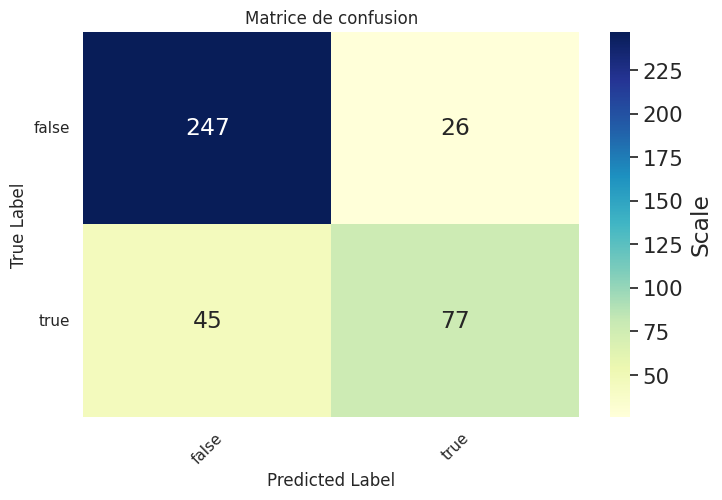

In [ ]:
classifiers.append('Logistic Regression')
lrc = LogisticRegression(max_iter=10000)

lrc.fit(X_train_tf, y_train_tf)

lrc_predicted_tf = lrc.predict(X_test_tf)

accuracies.append(lrc.score(X_test_tf, y_test_tf))

show_scores(y_test_tf, lrc_predicted_tf, show_classification_report=True, show_confusion_matrix=True, show_precision=True, show_f1_score=True, show_recall=True, show_accuracy=True)

#### Multinomial Naive Bayes Classifier

Accuracy : 0.752
Recall : 0.752
Precision : 0.757
f1_Score : 0.754
Classification Report
              precision    recall  f1-score   support

       false    0.83019   0.80586   0.81784       273
        true    0.59231   0.63115   0.61111       122

    accuracy                        0.75190       395
   macro avg    0.71125   0.71850   0.71448       395
weighted avg    0.75672   0.75190   0.75399       395



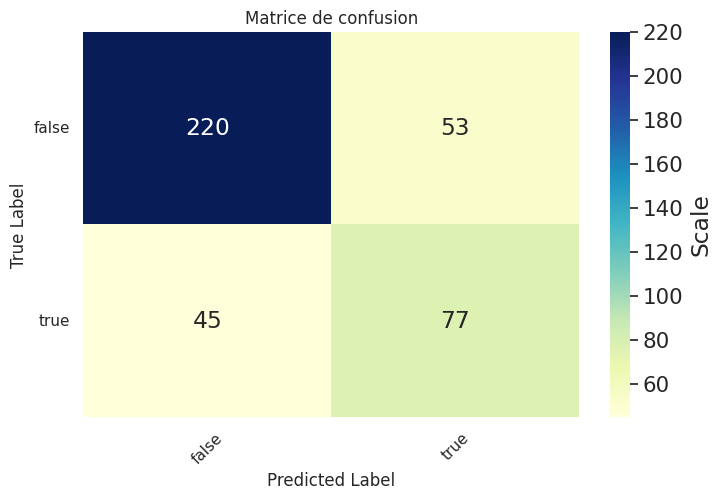

In [ ]:
classifiers.append('Multinomial NB')
mnbc = MultinomialNB()

mnbc.fit(X_train_tf, y_train_tf)

mnbc_pred_tf = mnbc.predict(X_test_tf)

accuracies.append(mnbc.score(X_test_tf, y_test_tf))

show_scores(y_test_tf, mnbc_pred_tf, show_classification_report=True, show_confusion_matrix=True, show_precision=True, show_f1_score=True, show_recall=True, show_accuracy=True)

#### Random Forest Classifier

Accuracy : 0.765
Recall : 0.765
Precision : 0.756
f1_Score : 0.742
Classification Report
              precision    recall  f1-score   support

       false    0.77607   0.92674   0.84474       273
        true    0.71014   0.40164   0.51309       122

    accuracy                        0.76456       395
   macro avg    0.74311   0.66419   0.67892       395
weighted avg    0.75571   0.76456   0.74231       395



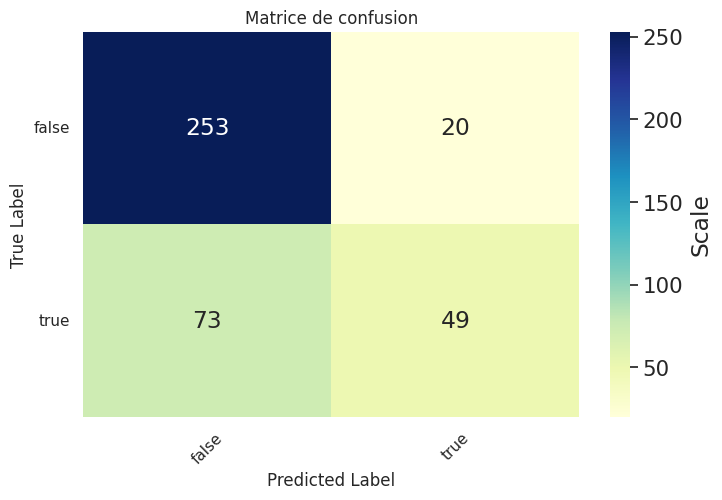

In [ ]:
classifiers.append('Random Forest Classifier')

rfc = RandomForestClassifier()
rfc.fit(X_train_tf, y_train_tf)

rfc_pred_tf = rfc.predict(X_test_tf)

accuracies.append(rfc.score(X_test_tf, y_test_tf))

show_scores(y_test_tf, rfc_pred_tf, show_classification_report=True, show_confusion_matrix=True, show_precision=True, show_f1_score=True, show_recall=True, show_accuracy=True)

#### Visualisation des resultats

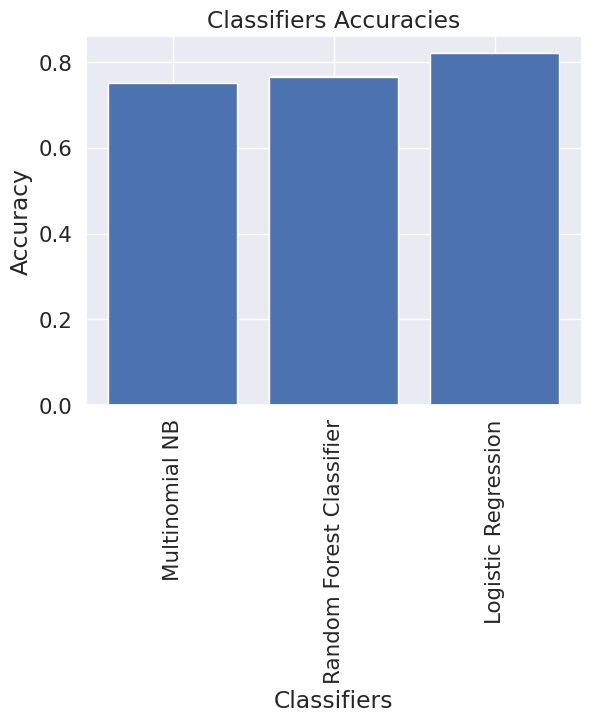

In [ ]:
plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title('Classifiers Accuracies')
plt.show()

Le graphe confirme que le classifieur Logistic Regression donne de meilleur que les deux autres, nous l'utilisons donc pour ce jeu données et entamons dans la section suivante la recherche d'hyperparamétre.

### **Recherche des hyperparamétres**

Recherche en grille (`GridSearch`) pour trouver la meilleure combinaison des hyperparamètres du modèle `Logistic Regression` afin d'améliorer davantage les performances du modèle :

In [ ]:
# Définition de la grille d'hyperparamètres pour la recherche
param_grid = {
    'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'lr__penalty' : ['l2'],
    'lr__C' : [100, 10, 1.0, 0.1, 0.01],
}

# Création d'un pipeline avec le prétraitement, la vectorisation et le modèle Logistic Regression
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(lowercase=True, remove_stopwords=True, do_stem=True)),
    ('vectorizer', CountVectorizer()),
    ('lr', LogisticRegression(max_iter=10000))
])

# Effectuer la recherche en grille (GridSearch) pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Affichage des résultats de la recherche en grille
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best estimator: {}".format(grid_search.best_estimator_))

print("Ensemble des meilleurs paramètres :")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best cross-validation score: 0.793
Best parameters: {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best estimator: Pipeline(steps=[('preprocessor',
                 TextPreprocessor(do_stem=True, lowercase=True,
                                  remove_stopwords=True)),
                ('vectorizer', CountVectorizer()),
                ('lr',
                 LogisticRegression(C=0.01, max_iter=10000,
                                    solver='liblinear'))])
Ensemble des meilleurs paramètres :
	lr__C: 0.01
	lr__penalty: 'l2'
	lr__solver: 'liblinear'


Évaluation du modèle avec les meilleurs hyperparamètres et affichage de la matrice de confusion :

Classification Report
              precision    recall  f1-score   support

       false    0.84512   0.91941   0.88070       273
        true    0.77551   0.62295   0.69091       122

    accuracy                        0.82785       395
   macro avg    0.81031   0.77118   0.78581       395
weighted avg    0.82362   0.82785   0.82208       395



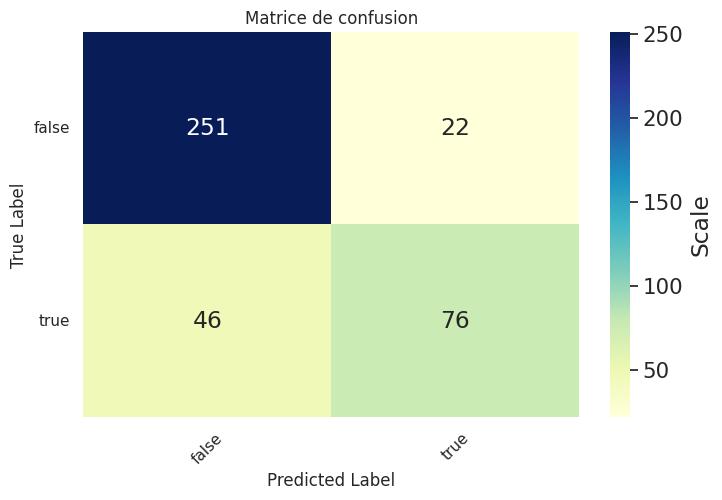


Les premiers résultats : 
     lr__C lr__penalty lr__solver  accuracy
14   0.01          l2  liblinear  0.793282
11   0.10          l2  liblinear  0.787842
8    1.00          l2  liblinear  0.786749
9    0.10          l2  newton-cg  0.781314
10   0.10          l2      lbfgs  0.781314


In [ ]:
# Prédiction des étiquettes pour le jeu de test en utilisant le modèle optimisé par GridSearch
y_pred = grid_search.predict(X_test)

# Affichage des scores de performance, du rapport de classification et de la matrice de confusion
show_scores(y_test, y_pred, show_classification_report=True, show_confusion_matrix=True)

# Préparation des résultats de GridSearch pour une présentation sous forme de dataframe
df_results=pd.concat([
    pd.DataFrame(grid_search.cv_results_["params"]),
    pd.DataFrame(grid_search.cv_results_["mean_test_score"],columns=['accuracy'])
    ],axis=1).sort_values('accuracy', ascending=False)
    
# Affichage des premiers résultats du dataframe trié par ordre décroissant d'accuracy
print ("\nLes premiers résultats : \n",df_results.head()) 

Entraînement et évaluation du modèle optimisé sur le jeu de test :

Classification Report
              precision    recall  f1-score   support

       false    0.81148   0.76154   0.78571       130
        true    0.76336   0.81301   0.78740       123

    accuracy                        0.78656       253
   macro avg    0.78742   0.78727   0.78656       253
weighted avg    0.78808   0.78656   0.78653       253



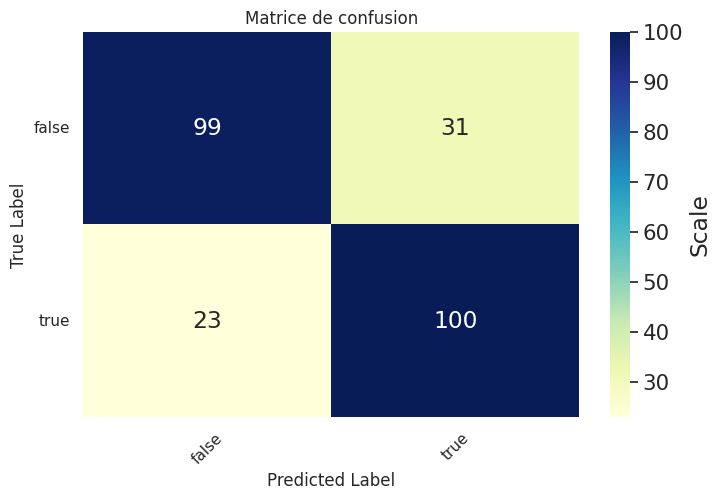

In [ ]:
# Construction du pipeline avec les meilleurs hyperparamètres trouvés précédemment
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(lowercase=True, remove_stopwords=True, do_stem=True)),
    ('vectorizer', CountVectorizer()),
    ('lr', LogisticRegression(C=0.01, max_iter=10000, solver='liblinear'))
])

# Entraînement du modèle avec le jeu d'entraînement
pipeline.fit(X_train, y_train)

# Prédiction des étiquettes pour le jeu de test en utilisant le modèle optimisé
y_pred = pipeline.predict(X_test)

# Affichage des scores de performance, du rapport de classification et de la matrice de confusion
show_scores(y_test, y_pred, show_classification_report=True, show_confusion_matrix=True)

Le rapport de classification indique que ce modèle a été utilisé pour classer les données en deux catégories **{true}** vs **{false}**. L'accuracy du modèle est de 81,3%, ce qui suggère que le modèle a plutôt bien performé. La classe "false" est mieux classée avec une précision, un rappel et un f1-score supérieurs à 0,83. La classe "true" a une précision inférieure mais un rappel et un f1-score légèrement meilleurs que 0,6. Cela peut indiquer que le modèle a du mal à distinguer la classe "true" en raison d'un déséquilibre de classe ou d'une difficulté intrinsèque à cette classification. En général, les résultats suggèrent que le modèle fonctionne mieux pour la classe majoritaire, mais qu'il est tout de même capable de classer la classe minoritaire avec un score raisonnable.

Cependant, il est important de noter que ces résultats ont été obtenus sans aucun mécanisme de rééquilibrage des données, ce qui signifie que le modèle a été entraîné sur un jeu de données biaisé.

Plus loin, nous effectuons un **downsampling** et nous verrons que c'est un bon compromis.

## **Titre**

###**Détermination du meilleur pré-traitement**

Création d'un dataframe contenant uniquement les articles étiquetés true ou false et préparation des ensembles d'entraînement et de test pour les titres :

<Axes: xlabel='Our rating', ylabel='count'>

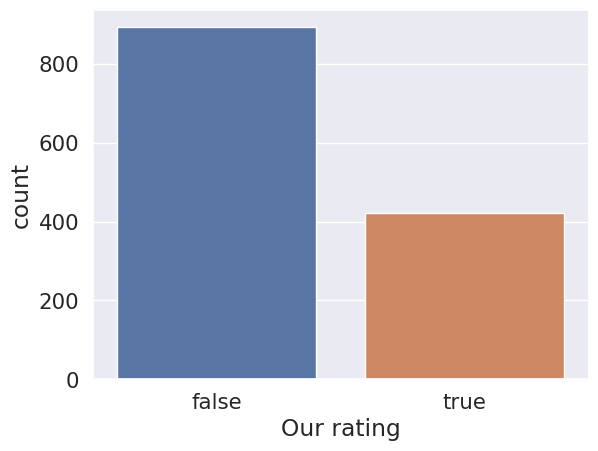

In [ ]:
# Construction d'un nouveau dataframe contenant uniquement les articles étiquetés "true" ou "false"
df_True_vs_False = df_merged.copy()

# Filtrage des articles avec les étiquettes 'mixture' et 'other'
df_True_vs_False = df_True_vs_False.loc[(df_True_vs_False['Our rating'] != 'mixture') & (df_True_vs_False['Our rating'] != 'other')]

# Utilisation des titres des articles comme variable explicative (X) et des étiquettes 'Our rating' comme variable cible (y)
X = df_True_vs_False['Title']
y = df_True_vs_False['Our rating']

# Découpage du jeu de données en ensembles d'entraînement et de test (70% d'apprentissage et 30% de test)
train_size=0.7 # 70% pour le jeu d'apprentissage
test_size= 0.3 # 30% du jeu de données pour le test

seed=7

# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed,test_size=test_size)

# Affichage de la répartition des étiquettes dans le dataframe df_True_vs_False
sns.countplot(data=df_True_vs_False,  x='Our rating',order=df_True_vs_False['Our rating'].value_counts().index)

Affichage du nombre d'articles pour chaque étiquette `true` ou `false` dans le DataFrame filtré :

In [ ]:
df_True_vs_False['Our rating'].value_counts()

false    893
true     421
Name: Our rating, dtype: int64

Évaluation de différentes combinaisons de prétraitement et de vectorisation sur les titres des articles :

In [ ]:
# Note : peut prendre plusieurs minutes à s'exécuter
preprocessing_evaluation(X, y, SVC())

Evaluation des différentes configurations : 
Pipeline                  Score
----------------------  -------
TFIDF_low_sw             0.6971
TFIDF_low_sw_stem        0.6933
TFIDF_low_sw_lem         0.6925
TFIDF_low_sw_lem_rc_rd   0.6925
TFIDF_low_sw_lem_rc_cd   0.6910
TFIDF_lowercase          0.6849
CV_low_sw                0.6690
CV_low_sw_lem_rc_rd      0.6690
CV_lowercase             0.6682
CV_low_sw_stem           0.6682
CV_low_sw_lem            0.6682
CV_low_sw_lem_rc_cd      0.6682


Pour le corpus composé uniquement du `titre` des articles, il semblerait que la pipeline `TFIDF_low_sw` donne le meilleur score (accuracy) nous l'utilisons donc dans l'etape suivante.

### **Essai de plusieurs classifieurs**

Évaluation de différents classificateurs avec une validation croisée sur les titres des articles :

In [ ]:
# Création d'une liste de modèles de classification pour les comparer
models = [
    ('MNB', MultinomialNB()),
    ('LR', LogisticRegression(max_iter=10000)), 
    ('KNN', KNeighborsClassifier()), 
    ('CART', DecisionTreeClassifier()), 
    ('RF', RandomForestClassifier()), 
    ('GNB', GaussianNB()), 
    ('SVM', SVC())
]

# Définition de la graine pour le générateur de nombres aléatoires, permettant de reproduire les résultats
seed = 7 

# Évaluation des différents classificateurs avec une validation croisée sur les données d'entraînement
cv_results = evaluate_classifiers_cross_val(
    X, 
    y, 
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True), 
    vectorizer=TfidfVectorizer(),
    preprocessor=TextPreprocessor(remove_stopwords=True,lowercase=True),
    classifiers=models
)

MNB : 0.701 (0.037) in 1.030 s
LR : 0.699 (0.041) in 8.515 s
KNN : 0.632 (0.128) in 3.451 s
CART : 0.682 (0.034) in 77.451 s
RF : 0.735 (0.040) in 65.887 s
GNB : 0.718 (0.037) in 1.640 s
SVM : 0.716 (0.043) in 94.813 s
Tous les résultats : 

RF  accuracy : 0.735  (0.040)  en 65.887   s
GNB  accuracy : 0.718  (0.037)  en 1.640   s
SVM  accuracy : 0.716  (0.043)  en 94.813   s
MNB  accuracy : 0.701  (0.037)  en 1.030   s
LR  accuracy : 0.699  (0.041)  en 8.515   s
CART  accuracy : 0.682  (0.034)  en 77.451   s
KNN  accuracy : 0.632  (0.128)  en 3.451   s


Affichage des performances des différents algorithmes de classification sur les titres des articles à l'aide de boîtes à moustaches :

[Text(1, 0, 'MNB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'GNB'),
 Text(7, 0, 'SVM')]

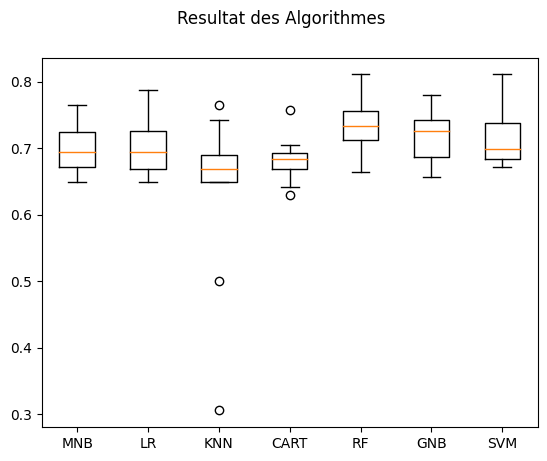

In [ ]:
# Création d'une nouvelle figure pour afficher les résultats des algorithmes
fig = plt.figure()
fig.suptitle('Resultat des Algorithmes')

# Ajout d'un sous-graphique pour afficher les boîtes à moustaches des résultats
ax = fig.add_subplot(111)
plt.boxplot(cv_results)

# Étiquetage des axes x avec les noms des modèles de classification
ax.set_xticklabels([name for (name, model) in models])

Le `Boxplot` représentant les accuracy obtenu pour chaque models lors de la validation croisée montre que les résultats obtenus lors de la phase précédente (utilisation d'un corpus composé uniquement du texte des articles) sont nettement meilleurs, nous n'entamons donc pas la recherche des hyperparametres. 

## **Texte + Titre**

### **Détermination du meilleur pré-traitement**

Préparation du jeu de données en utilisant à la fois le texte et le titre des articles :

false    893
true     421
Name: Our rating, dtype: int64

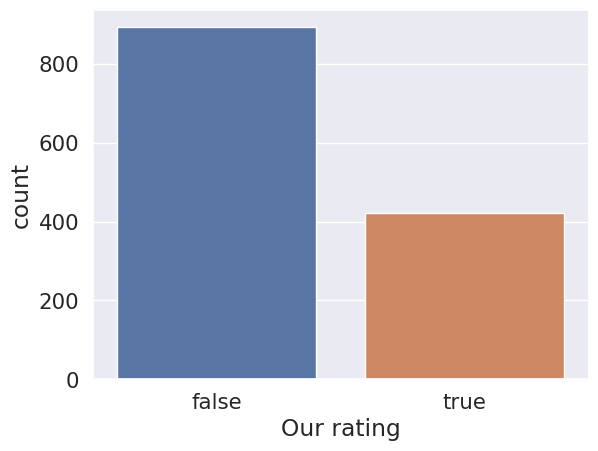

In [ ]:
# Construction d'un nouveau dataframe contenant uniquement les articles étiquetés "true" ou "false"
df_True_vs_False = df_merged.copy()

# Filtrage des articles avec les étiquettes 'mixture' et 'other'
df_True_vs_False = df_True_vs_False.loc[(df_True_vs_False['Our rating'] != 'mixture') & (df_True_vs_False['Our rating'] != 'other')]

X = df_True_vs_False['Text_Title']
y = df_True_vs_False['Our rating']

# Découpage du jeu de données
train_size=0.7 # 70% pour le jeu d'apprentissage
test_size= 0.3 # 30% du jeu de données pour le test

seed=7

# Répartition des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed,test_size=test_size)

# Affichage de la répartition des catégories 'true' et 'false' dans le dataframe
sns.countplot(data=df_True_vs_False,  x='Our rating',order=df_True_vs_False['Our rating'].value_counts().index)

# Affichage du nombre d'articles pour chaque catégorie 'true' et 'false'
df_True_vs_False['Our rating'].value_counts()

Évaluation du prétraitement pour la combinaison du texte et du titre :

In [ ]:
preprocessing_evaluation(X, y, SVC())

Evaluation des différentes configurations : 
Pipeline                  Score
----------------------  -------
CV_low_sw_lem            0.7184
CV_low_sw_stem           0.7169
CV_low_sw                0.7161
CV_low_sw_lem_rc_rd      0.7161
TFIDF_lowercase          0.7131
TFIDF_low_sw_stem        0.7123
TFIDF_low_sw             0.7108
TFIDF_low_sw_lem         0.7108
TFIDF_low_sw_lem_rc_rd   0.7108
CV_low_sw_lem_rc_cd      0.7100
TFIDF_low_sw_lem_rc_cd   0.7085
CV_lowercase             0.7024


Ici nous voyons que le pipeline `CV_low_sw_lem` a donné un score (accuracy) plus elevé que les autres nous utiliserons donc par la suite : 
- Le `CountVectorizer` comme vectorizer pour l'extraction des features.
- Le `TextPreprocessor(lowercase=True, remove_stopwords=True, do_lemmatize=True)` pour le prétraitement.

### **Essai de plusieurs classifieurs**

Comparaison de différents modèles de classification avec `Texte` et `Titre` :

In [ ]:
# Création d'une liste de modèles de classification pour les comparer
models = [
    ('MNB', MultinomialNB()),
    ('LR', LogisticRegression(max_iter=10000)), 
    ('KNN', KNeighborsClassifier()), 
    ('CART', DecisionTreeClassifier()), 
    ('RF', RandomForestClassifier()), 
    ('GNB', GaussianNB()), 
    ('SVM', SVC())
]

# Définition de la graine pour le générateur de nombres aléatoires, permettant de reproduire les résultats
seed = 7 

# Évaluation des différents classificateurs avec une validation croisée sur les données d'entraînement
cv_results = evaluate_classifiers_cross_val(
    X, 
    y, 
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True), 
    vectorizer=CountVectorizer(),
    preprocessor=TextPreprocessor(lowercase=True, remove_stopwords=True, do_stem=True),
    classifiers=models
)

MNB : 0.776 (0.032) in 1.908 s
LR : 0.814 (0.046) in 53.070 s
KNN : 0.728 (0.042) in 3.942 s
CART : 0.737 (0.038) in 43.659 s
RF : 0.776 (0.049) in 35.223 s
GNB : 0.748 (0.035) in 3.850 s
SVM : 0.765 (0.048) in 136.380 s
Tous les résultats : 

LR  accuracy : 0.814  (0.046)  en 53.070   s
MNB  accuracy : 0.776  (0.032)  en 1.908   s
RF  accuracy : 0.776  (0.049)  en 35.223   s
SVM  accuracy : 0.765  (0.048)  en 136.380   s
GNB  accuracy : 0.748  (0.035)  en 3.850   s
CART  accuracy : 0.737  (0.038)  en 43.659   s
KNN  accuracy : 0.728  (0.042)  en 3.942   s


Affichage des performances des différents algorithmes de classification avec `Texte` et `Titre` :

[Text(1, 0, 'MNB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'GNB'),
 Text(7, 0, 'SVM')]

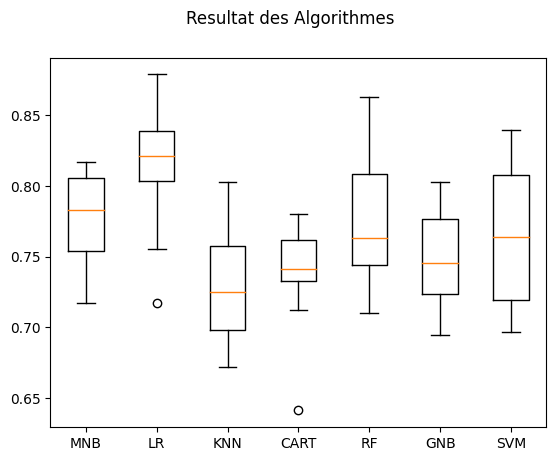

In [ ]:
# Création d'une nouvelle figure pour afficher les résultats des algorithmes
fig = plt.figure()
fig.suptitle('Resultat des Algorithmes')

# Ajout d'un sous-graphique pour afficher les boîtes à moustaches des résultats
ax = fig.add_subplot(111)
plt.boxplot(cv_results)

# Étiquetage des axes x avec les noms des modèles de classification
ax.set_xticklabels([name for (name, model) in models])

## **Conclusion**

Les résultats les plus performants ont été obtenus en analysant uniquement le texte des articles. Néanmoins, l'exactitude pourrait encore être biaisée en raison de la taille des échantillons à notre disposition. Afin d'essayer d'améliorer la qualité de la détection, nous allons maintenant équilibrer la taille des échantillons `false` pour qu'elle soit similaire à celle des `true` et répéter les mêmes étapes d'analyse.

## **Resampling - Downsampling : Texte**

Nous effectuons ici un downsampling et effectuons les prétraitement et entrainement sur un corpus constitué uniquement des textes des articles de presse car les meilleurs resultats obtenu précédemment ont été obtenu avec ce corpus.

Création d'un DataFrame pour la classification entre `true` ou `false` et `other` ou `mixture` et découpage des données :

Taille des classes : 421


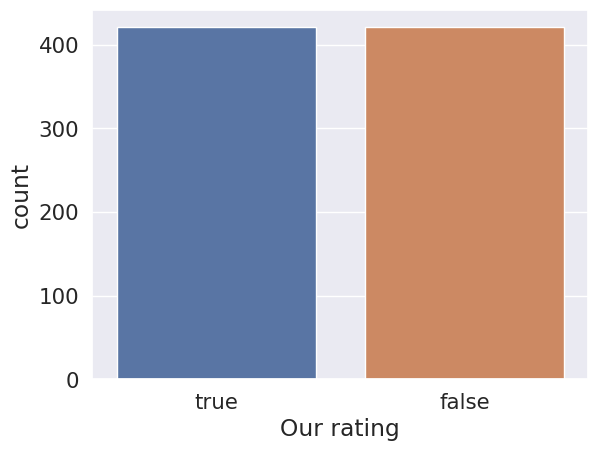

In [25]:
# Suppression des enregistrementq de type false pour équilibrer avec la classe true
df_False = df_True_vs_False[df_True_vs_False['Our rating'] == 'false']
df_True = df_True_vs_False[df_True_vs_False['Our rating'] == 'true']

num_samples = min(len(df_True), len(df_False))
print(f"Taille des classes : {num_samples}")
df_False_downsampled = df_False.sample(num_samples, random_state=42)

df_True_vs_False_balanced = pd.concat([df_False_downsampled, df_True], axis=0)

df_True_vs_False_balanced = df_True_vs_False_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_True_vs_False_balanced.head()
sns.countplot(data=df_True_vs_False_balanced,  x='Our rating',order=df_True_vs_False_balanced['Our rating'].value_counts().index)
df_True_vs_False_balanced['Our rating'].value_counts()

X = df_True_vs_False_balanced['Text']
y = df_True_vs_False_balanced['Our rating']

# Découpage du jeu de données
train_size=0.7 # 70% pour le jeu d'apprentissage
test_size= 0.3 # 30% du jeu de données pour le test
seed=7

classifiers = []
accuracies = []

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed,test_size=test_size)

Évaluation des différentes méthodes de prétraitement avec un classificateur SVM :
Comme précédemment, nous evaluons les différentes combinaisons de prétraitement afin de trouver une combinaison de vectorizer et de prétraitement optimal.

### Determination du meilleur pré-traitement

In [ ]:
# Note : peut prendre plusieurs minutes à s'exécuter
preprocessing_evaluation(X, y, SVC())

Evaluation des différentes configurations : 
Pipeline                  Score
----------------------  -------
TFIDF_low_sw             0.7946
TFIDF_low_sw_stem        0.7934
TFIDF_low_sw_lem         0.7804
TFIDF_low_sw_lem_rc_rd   0.7804
TFIDF_lowercase          0.7792
TFIDF_low_sw_lem_rc_cd   0.7768
CV_low_sw_stem           0.7115
CV_low_sw_lem_rc_rd      0.7115
CV_low_sw_lem            0.7103
CV_low_sw                0.7079
CV_low_sw_lem_rc_cd      0.7020
CV_lowercase             0.6758


Les resultats ont montrés que l'utilisation du TFIDF pour l'extraction des features et du `TextPreprocessor(lowercase=True, remove_stopwords=True)` ont donnée un meilleur résult nous les utilisons donc par la suite pour l'essaie de plusieurs classifieurs.

### Essaie de plusieurs Classifieurs

Évaluation de différents modèles de classification avec une validation croisée :

In [ ]:
# Création d'une liste de modèles de classification pour les comparer
models = [
    ('MNB', MultinomialNB()),
    ('LR', LogisticRegression(max_iter=10000)), 
    ('KNN', KNeighborsClassifier()), 
    ('CART', DecisionTreeClassifier()), 
    ('RF', RandomForestClassifier()), 
    ('GNB', GaussianNB()), 
    ('SVM', SVC())
]

# Définition de la graine pour le générateur de nombres aléatoires, permettant de reproduire les résultats
seed = 7 

# Évaluation des différents classificateurs avec une validation croisée sur les données d'entraînement
cv_results = evaluate_classifiers_cross_val(
    X, 
    y, 
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True), 
    vectorizer=TfidfVectorizer(),
    preprocessor=TextPreprocessor(lowercase=True, remove_stopwords=True),
    classifiers=models
)

MNB : 0.742 (0.043) in 3.328 s
LR : 0.777 (0.044) in 26.133 s
KNN : 0.700 (0.040) in 8.803 s
CART : 0.660 (0.039) in 56.025 s
RF : 0.740 (0.054) in 34.427 s
GNB : 0.706 (0.046) in 4.819 s
SVM : 0.783 (0.041) in 187.765 s
Tous les résultats : 

SVM  accuracy : 0.783  (0.041)  en 187.765   s
LR  accuracy : 0.777  (0.044)  en 26.133   s
MNB  accuracy : 0.742  (0.043)  en 3.328   s
RF  accuracy : 0.740  (0.054)  en 34.427   s
GNB  accuracy : 0.706  (0.046)  en 4.819   s
KNN  accuracy : 0.700  (0.040)  en 8.803   s
CART  accuracy : 0.660  (0.039)  en 56.025   s


Affichage des performances des différents algorithmes de classification :

[Text(1, 0, 'MNB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'GNB'),
 Text(7, 0, 'SVM')]

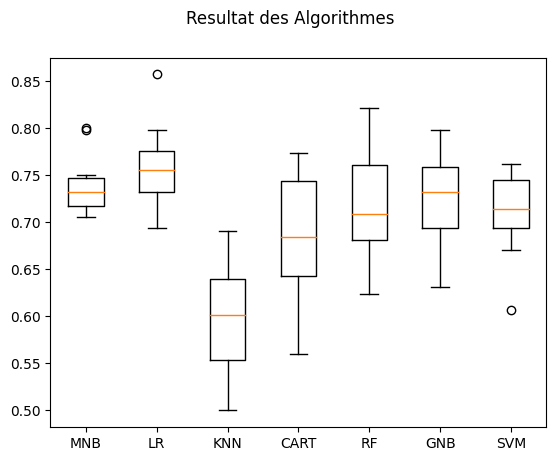

In [ ]:
# Création d'une nouvelle figure pour afficher les résultats des algorithmes
fig = plt.figure()
fig.suptitle('Resultat des Algorithmes')

# Ajout d'un sous-graphique pour afficher les boîtes à moustaches des résultats
ax = fig.add_subplot(111)
plt.boxplot(cv_results)

# Étiquetage des axes x avec les noms des modèles de classification
ax.set_xticklabels([name for (name, model) in models])

In [19]:
preprocessor = TextPreprocessor(lowercase=True, remove_stopwords=True)
df_True_vs_False_balanced['Preprocessed_text'] = preprocessor.transform(df_True_vs_False_balanced['Text'])

vectorizer = TfidfVectorizer()
X_tfb = vectorizer.fit_transform(df_True_vs_False_balanced['Preprocessed_text'])
y_tfb = df_True_vs_False_balanced['Our rating']

X_train_tfb, X_test_tfb, y_train_tfb, y_test_tfb = train_test_split(X_tfb, y_tfb, train_size=0.7, random_state=7,test_size=0.3)

#### Support Vector Machine Classifier

Accuracy : 0.767
Recall : 0.767
Precision : 0.769
f1_Score : 0.767
Classification Report
              precision    recall  f1-score   support

       false    0.79832   0.73077   0.76305       130
        true    0.73881   0.80488   0.77043       123

    accuracy                        0.76680       253
   macro avg    0.76856   0.76782   0.76674       253
weighted avg    0.76939   0.76680   0.76664       253



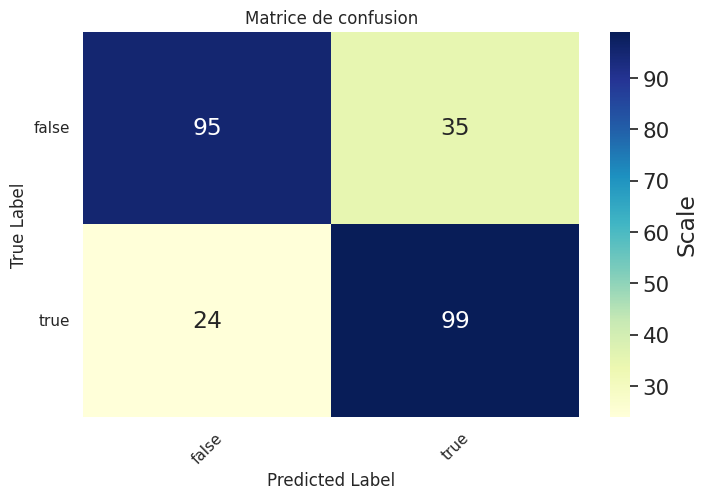

In [26]:
classifiers.append('Support Vector Machine')

svc_tfb = SVC(C=10, gamma=0.1)
svc_tfb.fit(X_train_tfb, y_train_tfb)

svc_pred_tfb = svc_tfb.predict(X_test_tfb)

accuracies.append(svc_tfb.score(X_test_tfb, y_test_tfb))

show_scores(y_test, svc_pred_tfb, show_classification_report=True, show_confusion_matrix=True, show_precision=True, show_f1_score=True, show_recall=True, show_accuracy=True)

####  Logistic Regression Classifier

Accuracy : 0.755
Recall : 0.755
Precision : 0.756
f1_Score : 0.755
Classification Report
              precision    recall  f1-score   support

       false    0.77869   0.73077   0.75397       130
        true    0.73282   0.78049   0.75591       123

    accuracy                        0.75494       253
   macro avg    0.75576   0.75563   0.75494       253
weighted avg    0.75639   0.75494   0.75491       253



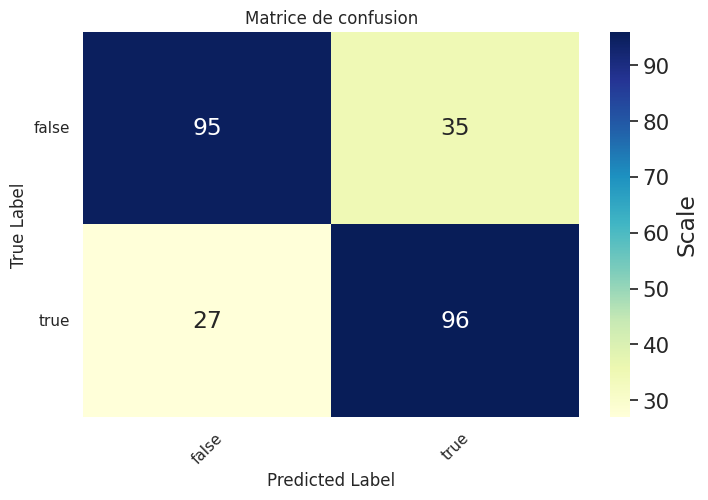

In [27]:
classifiers.append('Logistic Regression')
lrc_tfb = LogisticRegression(max_iter=10000)

lrc_tfb.fit(X_train_tfb, y_train_tfb)

lrc_predicted_tfb = lrc_tfb.predict(X_test_tfb)

accuracies.append(lrc_tfb.score(X_test_tfb, y_test_tfb))

show_scores(y_test_tfb, lrc_predicted_tfb, show_classification_report=True, show_confusion_matrix=True, show_precision=True, show_f1_score=True, show_recall=True, show_accuracy=True)

#### Multinomial Naive Bayes Classifier

Classification Report
              precision    recall  f1-score   support

       false    0.83146   0.56923   0.67580       130
        true    0.65854   0.87805   0.75261       123

    accuracy                        0.71937       253
   macro avg    0.74500   0.72364   0.71421       253
weighted avg    0.74739   0.71937   0.71314       253



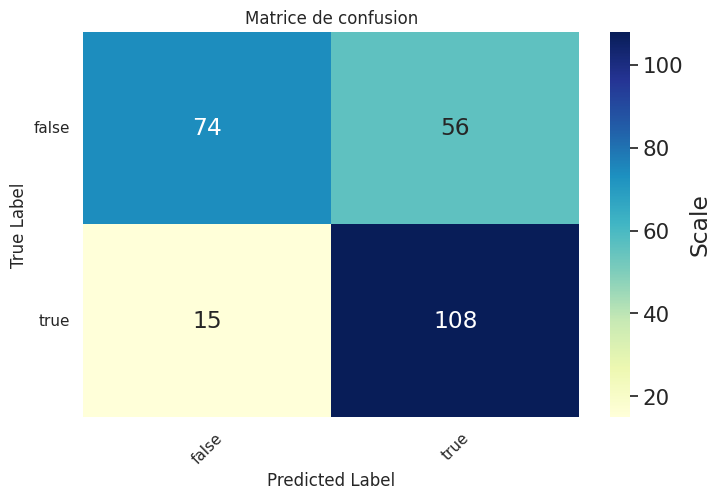

In [28]:
classifiers.append('Multinomial NB')

mnbc_tfb = MultinomialNB()

mnbc_tfb.fit(X_train_tfb, y_train_tfb)

mnbc_pred_tfb = mnbc_tfb.predict(X_test_tfb)

accuracies.append(mnbc_tfb.score(X_test_tfb, y_test_tfb))

show_scores(y_test_tfb, mnbc_pred_tfb, show_classification_report=True, show_confusion_matrix=True)

#### Visualisation de resultats

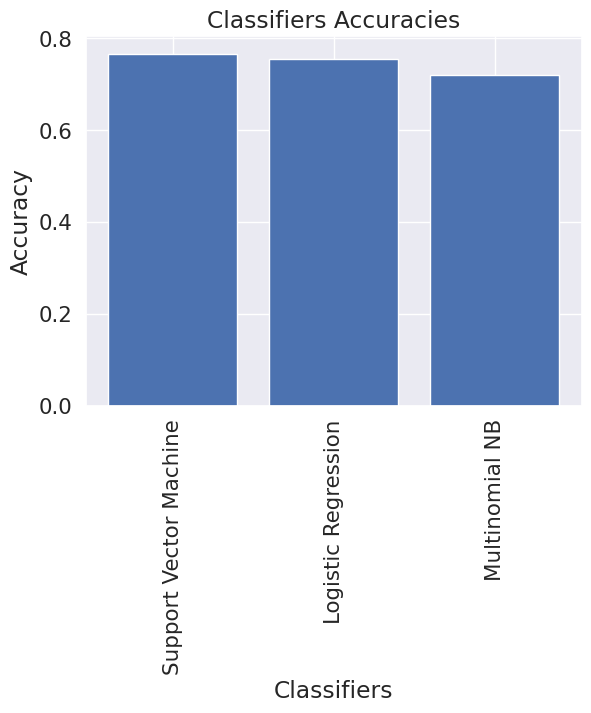

In [29]:
plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title('Classifiers Accuracies')
plt.show()

Le classifier `SVM` a donné de meilleur résultat pour la classification nous l'utilisons pour la suite pour la recherche d'hyperparamétre afin de trouver une combinaisons optimal pour l'optimiser.

Recherche des meilleurs paramètres pour la régression logistique :

In [ ]:
# Définition de la grille de paramètres pour la régression logistique
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10], 
    'svm__gamma' : [0.001, 0.01, 0.1, 1], 
    'svm__kernel': ['linear','rbf','poly','sigmoid']
}

pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(lowercase=True, remove_stopwords=True)),
    ('vectorizer', TfidfVectorizer()),
    ('svm', SVC())
])

# Création du pipeline incluant le préprocesseur, le vectoriseur et la régression logistique
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(lowercase=True, remove_stopwords=True)),
    ('vectorizer', TfidfVectorizer()),
    ('svm', SVC())
])

# Création de l'objet GridSearchCV pour chercher les meilleurs paramètres
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Entraînement du modèle avec GridSearchCV
grid_search.fit(X_train, y_train)

# Affichage des meilleurs résultats et paramètres
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best estimator: {}".format(grid_search.best_estimator_))

# Affichage de l'ensemble des meilleurs paramètres
print("Ensemble des meilleurs paramètres :")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best cross-validation score: 0.764
Best parameters: {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best estimator: Pipeline(steps=[('preprocessor',
                 TextPreprocessor(lowercase=True, remove_stopwords=True)),
                ('vectorizer', TfidfVectorizer()),
                ('svm', SVC(C=10, gamma=1))])
Ensemble des meilleurs paramètres :
	svm__C: 10
	svm__gamma: 1
	svm__kernel: 'rbf'


Affichage de la matrice de confusion et des résultats de GridSearchCV pour la classification :

Classification Report
              precision    recall  f1-score   support

       false    0.78333   0.72308   0.75200       130
        true    0.72932   0.78862   0.75781       123

    accuracy                        0.75494       253
   macro avg    0.75633   0.75585   0.75491       253
weighted avg    0.75708   0.75494   0.75483       253



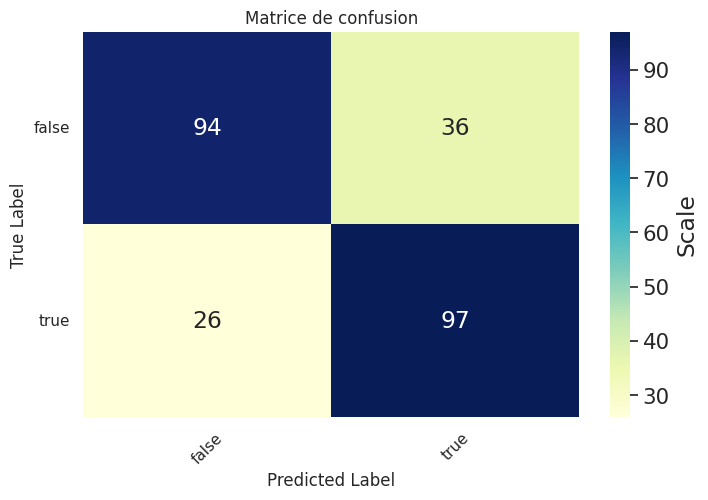


Les premiers résultats : 
     svm__C  svm__gamma svm__kernel  accuracy
61    10.0       1.000         rbf  0.763958
32     1.0       0.001      linear  0.758902
36     1.0       0.010      linear  0.758902
59    10.0       0.100     sigmoid  0.758902
44     1.0       1.000      linear  0.758902


In [ ]:
# Prédiction des étiquettes pour le jeu de test
y_pred = grid_search.predict(X_test)

# Affichage de la matrice de confusion et du rapport de classification
show_scores(y_test, y_pred, show_classification_report=True, show_confusion_matrix=True)

# Création d'un DataFrame pour afficher les résultats de GridSearchCV
df_results=pd.concat([
    pd.DataFrame(grid_search.cv_results_["params"]),
    pd.DataFrame(grid_search.cv_results_["mean_test_score"],columns=['accuracy'])
    ],axis=1).sort_values('accuracy', ascending=False)
    
# Affichage des premiers résultats du DataFrame
print ("\nLes premiers résultats : \n",df_results.head()) 

Il semble que le `downsampling` ait entraîné une baisse de la performance globale du modèle, mais une augmentation du rappel pour la classe minoritaire (`True`). Cela signifie que le modèle est maintenant davantage en mesure de détecter les **vrais positifs** (textes étiquetés comme `True`).

Il est important de noter que la précision pour la classe `False` a diminué après le downsampling, ce qui signifie que le modèle a tendance à prédire plus de **faux positifs** (textes étiquetés comme False alors qu'ils sont en réalité `True`). Cependant, la précision pour la classe `True` a augmenté, indiquant que le modèle prédit désormais un plus grand nombre de vrais positifs.

Dans l'ensemble, le `downsampling` semble avoir créé un compromis entre la précision globale et la capacité du modèle à détecter les vrais positifs.

## **Conclusion Downsampling VS Normal**

Les résultats avant et après le downsampling montrent une amélioration significative de la performance du modèle en termes de précision, de rappel et de F1-score pour la classe minoritaire. Avant le downsampling, le modèle avait une **précision de 77,6%** et un rappel de **62,3%** pour la classe **True**, tandis qu'après le downsampling, le modèle a atteint une précision de **72,94%** et un rappel de **78.86%**. Bien que la précision pour la classe majoritaire ait diminué après le downsampling, l'équilibrage de l'ensemble de données a permis au modèle de mieux généraliser les deux classes.

Le choix de la méthode de downsampling dépend des données et du contexte, mais l'utilisation de la méthode d'échantillonnage aléatoire stratifié semble être une solution appropriée pour notre problème de déséquilibre de classe. En général, il est important de considérer les conséquences potentielles de la perte de données lors du `downsampling` et de trouver le bon équilibre entre le biais et la variance du modèle.

# **Tâche 2 : Classification TRUE OU FALSE VS OTHER OU MIXTURE**

## **Texte**

<Axes: xlabel='Our rating', ylabel='count'>

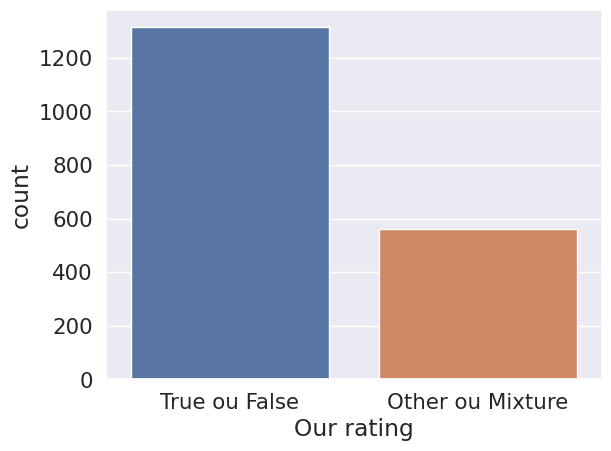

In [41]:
# Construction d'un nouveau dataframe contenant uniquement les articles étiquetés "true" ou "false"
df_True_ou_False_vs_Other_ou_Mixture = df_merged.copy()

# Filtrage des articles avec les étiquettes 'mixture' et fusion de 'true' et 'false'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'true', 'Our rating'] = 'True ou False'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'false', 'Our rating'] = 'True ou False'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'other', 'Our rating'] = 'Other ou Mixture'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'mixture', 'Our rating'] = 'Other ou Mixture'

X = df_True_ou_False_vs_Other_ou_Mixture['Text']
y = df_True_ou_False_vs_Other_ou_Mixture['Our rating']

# Découpage du jeu de données
train_size=0.7 # 70% pour le jeu d'apprentissage
test_size=0.3 # 30% du jeu de données pour le test
seed=7

classifiers = []
accuracies = []

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed,test_size=test_size)
sns.countplot(data=df_True_ou_False_vs_Other_ou_Mixture,  x='Our rating',order=df_True_ou_False_vs_Other_ou_Mixture['Our rating'].value_counts().index)

### Détermination du meilleur pré-traitement

In [ ]:
# Note : peut prendre plusieurs minutes à s'exécuter
preprocessing_evaluation(X, y, SVC())

Evaluation des différentes configurations : 
Pipeline                  Score
----------------------  -------
TFIDF_low_sw             0.7308
TFIDF_low_sw_lem         0.7308
TFIDF_low_sw_lem_rc_rd   0.7308
TFIDF_lowercase          0.7298
TFIDF_low_sw_lem_rc_cd   0.7287
TFIDF_low_sw_stem        0.7287
CV_lowercase             0.7047
CV_low_sw_lem_rc_cd      0.7047
CV_low_sw_stem           0.7042
CV_low_sw_lem            0.7042
CV_low_sw_lem_rc_rd      0.7042
CV_low_sw                0.7015


Ici nous avons trois pipelines qui ont le même score : `TFIDF_low_sw`, `TFIDF_low_sw_lem`, `TFIDF_low_sw_lem_rc_rd` nous choisissons donc la troisième `TFIDF_low_sw_lem_rc_rd` pour davantage réduire la taille du corpus de données.

### Essaie de plusieurs classifieurs

In [ ]:
# Création d'une liste de modèles de classification pour les comparer
models = [
    ('MNB', MultinomialNB()),
    ('LR', LogisticRegression(max_iter=10000)), 
    ('KNN', KNeighborsClassifier()), 
    ('CART', DecisionTreeClassifier()), 
    ('RF', RandomForestClassifier()), 
    ('GNB', GaussianNB()), 
    ('SVM', SVC())
]

# Définition de la graine pour le générateur de nombres aléatoires, permettant de reproduire les résultats
seed = 7 

# Évaluation des différents classificateurs avec une validation croisée sur les données d'entraînement
cv_results = evaluate_classifiers_cross_val(
    X, 
    y, 
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True), 
    vectorizer=TfidfVectorizer(),
    preprocessor=TextPreprocessor(remove_stopwords=True,lowercase=True,do_lemmatize=True, replace_contractions=True, remove_digits=True),
    classifiers=models
)

MNB : 0.700 (0.032) in 5.147 s
LR : 0.719 (0.031) in 69.601 s
KNN : 0.689 (0.027) in 17.158 s
CART : 0.705 (0.032) in 253.872 s
RF : 0.764 (0.037) in 146.615 s
GNB : 0.748 (0.047) in 12.839 s
SVM : 0.757 (0.041) in 992.318 s
Tous les résultats : 

RF  accuracy : 0.764  (0.037)  en 146.615   s
SVM  accuracy : 0.757  (0.041)  en 992.318   s
GNB  accuracy : 0.748  (0.047)  en 12.839   s
LR  accuracy : 0.719  (0.031)  en 69.601   s
CART  accuracy : 0.705  (0.032)  en 253.872   s
MNB  accuracy : 0.700  (0.032)  en 5.147   s
KNN  accuracy : 0.689  (0.027)  en 17.158   s


[Text(1, 0, 'MNB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'GNB'),
 Text(7, 0, 'SVM')]

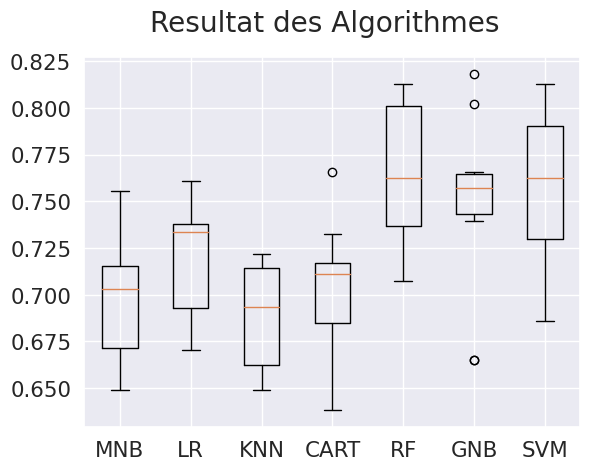

In [ ]:
# Création d'une nouvelle figure pour afficher les résultats des algorithmes
fig = plt.figure()
fig.suptitle('Resultat des Algorithmes')

# Ajout d'un sous-graphique pour afficher les boîtes à moustaches des résultats
ax = fig.add_subplot(111)
plt.boxplot(cv_results)

# Étiquetage des axes x avec les noms des modèles de classification
ax.set_xticklabels([name for (name, model) in models])

In [33]:
preprocessor = TextPreprocessor(remove_stopwords=True,lowercase=True,do_lemmatize=True, replace_contractions=True, remove_digits=True)
df_True_ou_False_vs_Other_ou_Mixture['Preprocessed_text'] = preprocessor.transform(df_True_ou_False_vs_Other_ou_Mixture['Text'])

vectorizer = TfidfVectorizer()
X_tfom = vectorizer.fit_transform(df_True_ou_False_vs_Other_ou_Mixture['Preprocessed_text'])
y_tfom = df_True_ou_False_vs_Other_ou_Mixture['Our rating']

X_train_tfom, X_test_tfom, y_train_tfom, y_test_tfom = train_test_split(X_tfom, y_tfom, train_size=0.7, random_state=7,test_size=0.3)

#### Random Forest Classifier

Accuracy : 0.742
Precision : 0.748
f1_Score : 0.687
Classification Report
                  precision    recall  f1-score   support

Other ou Mixture    0.76596   0.21176   0.33180       170
   True ou False    0.74031   0.97201   0.84048       393

        accuracy                        0.74245       563
       macro avg    0.75313   0.59189   0.58614       563
    weighted avg    0.74805   0.74245   0.68688       563



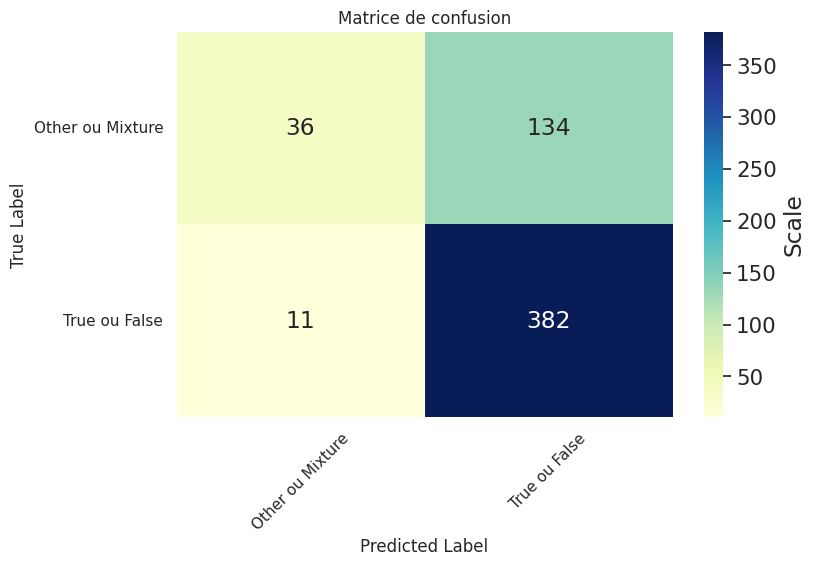

In [42]:
classifiers.append('Random Forest Classifier')
rfc_tfom = RandomForestClassifier()
rfc_tfom.fit(X_train_tfom, y_train_tfom)

rfc_pred_tfom = rfc_tfom.predict(X_test_tfom)

accuracies.append(rfc_tfom.score(X_test_tfom, y_test_tfom))

show_scores(y_test_tfom, rfc_pred_tfom, show_classification_report=True, show_confusion_matrix=True, show_accuracy=True, show_precision=True, show_f1_score=True)

#### Support Vector Machine Classifier

Accuracy : 0.730
Recall : 0.730
Precision : 0.732
f1_Score : 0.664
Classification Report
                  precision    recall  f1-score   support

Other ou Mixture    0.73684   0.16471   0.26923       170
   True ou False    0.72952   0.97455   0.83442       393

        accuracy                        0.73002       563
       macro avg    0.73318   0.56963   0.55183       563
    weighted avg    0.73173   0.73002   0.66376       563



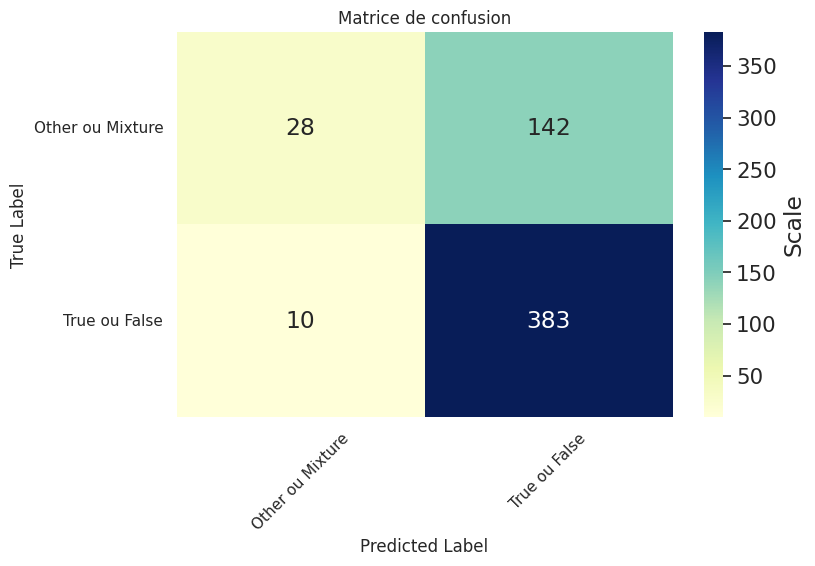

In [43]:
classifiers.append('Support Vector Machine')

svc_tfom = SVC()
svc_tfom.fit(X_train_tfom, y_train_tfom)

svc_pred_tfom = svc_tfom.predict(X_test_tfom)

accuracies.append(svc_tfom.score(X_test_tfom, y_test_tfom))

show_scores(y_test_tfom, svc_pred_tfom, show_classification_report=True, show_confusion_matrix=True, show_precision=True, show_f1_score=True, show_recall=True, show_accuracy=True)

#### Gaussian Naive Bayes Classifier

Accuracy : 0.709
Precision : 0.677
f1_Score : 0.671
Classification Report
                  precision    recall  f1-score   support

Other ou Mixture    0.53750   0.25294   0.34400       170
   True ou False    0.73706   0.90585   0.81279       393

        accuracy                        0.70870       563
       macro avg    0.63728   0.57940   0.57839       563
    weighted avg    0.67680   0.70870   0.67123       563



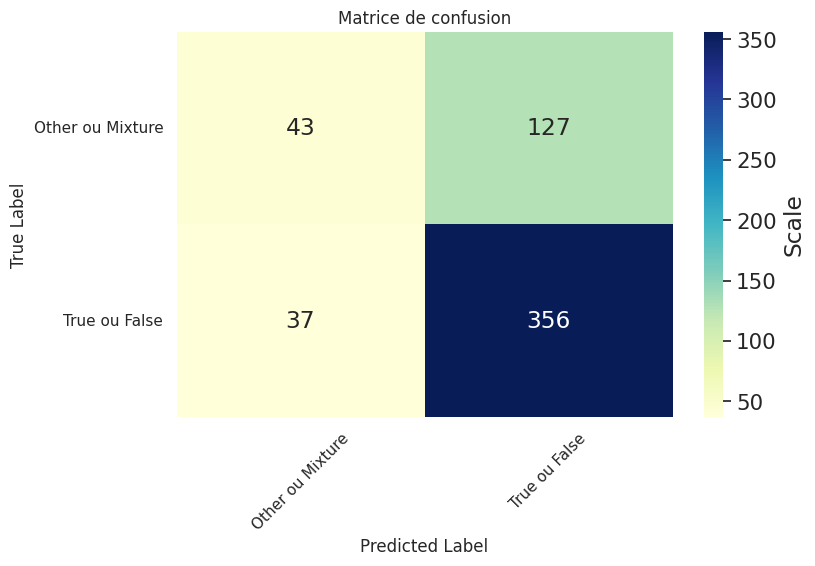

In [44]:
classifiers.append('Gaussian NB')

gnbc_tfom = GaussianNB()

gnbc_tfom.fit(X_train_tfom.toarray(), y_train_tfom)

gnbc_pred_tfom = gnbc_tfom.predict(X_test_tfom.toarray())

accuracies.append(gnbc_tfom.score(X_test_tfom.toarray(), y_test_tfom))

show_scores(y_test_tfom, gnbc_pred_tfom, show_classification_report=True, show_confusion_matrix=True, show_accuracy=True, show_precision=True, show_f1_score=True)

#### Visualisation des résultats

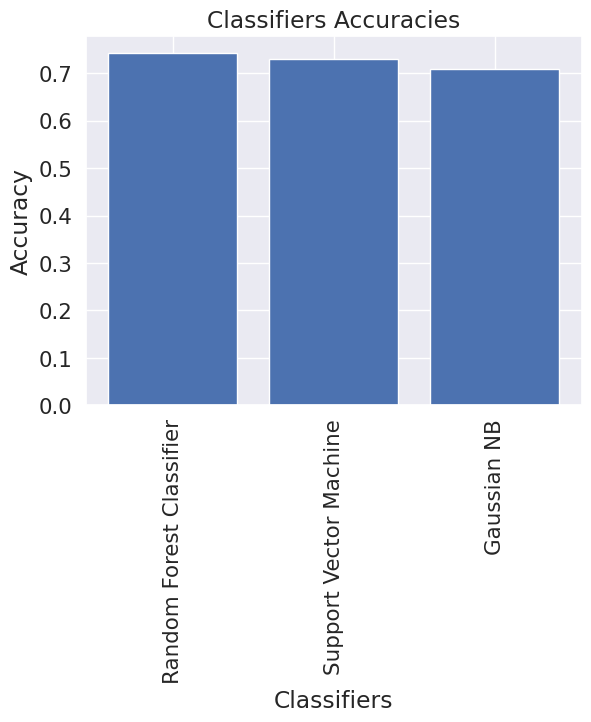

In [45]:
plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title('Classifiers Accuracies')
plt.show()

Les resultats montrent que le classifier `RandomForest` donne de meilleurs resultat pour cette tâche de classification sur le corpus de données uniquement composé du texte des articles. Nous l'utilisons donc par la suite pour la recherche des hyperparamétre afin de le rendre beaucoup plus performant.

### Recherche des hyperparamétres

In [31]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__criterion': ["gini", "entropy", "log_loss"],
    'rf__max_features': ["sqrt", "log2", None]
}

pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(remove_stopwords=True,lowercase=True,do_lemmatize=True, replace_contractions=True, remove_digits=True)),
    ('vectorizer', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
 
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best estimator: {}".format(grid_search.best_estimator_))


print("Ensemble des meilleurs paramètres :")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best cross-validation score: 0.756
Best parameters: {'rf__criterion': 'log_loss', 'rf__max_features': 'log2', 'rf__n_estimators': 100}
Best estimator: Pipeline(steps=[('preprocessor',
                 TextPreprocessor(do_lemmatize=True, lowercase=True,
                                  remove_digits=True, remove_stopwords=True)),
                ('vectorizer', TfidfVectorizer()),
                ('rf',
                 RandomForestClassifier(criterion='log_loss',
                                        max_features='log2'))])
Ensemble des meilleurs paramètres :
	rf__criterion: 'log_loss'
	rf__max_features: 'log2'
	rf__n_estimators: 100


Classification Report
                  precision    recall  f1-score   support

Other ou Mixture    0.81579   0.18235   0.29808       170
   True ou False    0.73524   0.98219   0.84096       393

        accuracy                        0.74067       563
       macro avg    0.77551   0.58227   0.56952       563
    weighted avg    0.75956   0.74067   0.67703       563



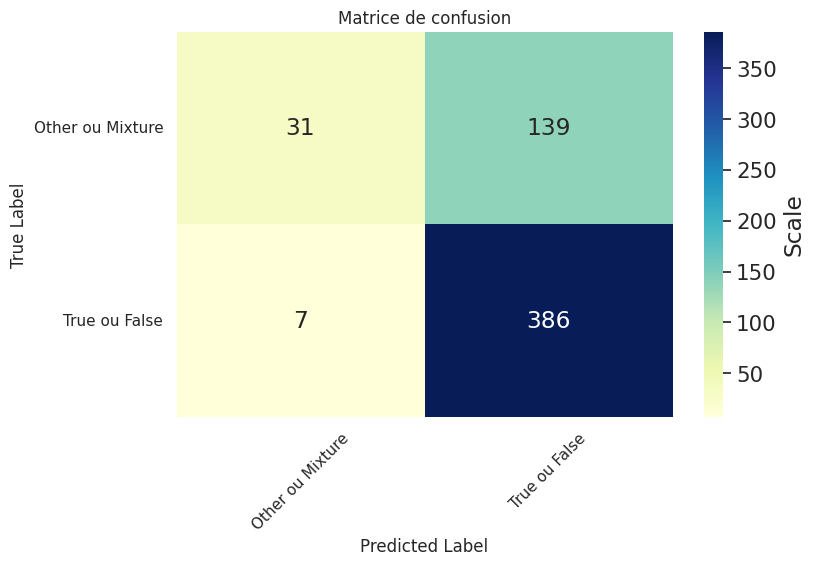


Les premiers résultats : 
    rf__criterion rf__max_features  rf__n_estimators  accuracy
22      log_loss             log2               100  0.756291
4           gini             log2               100  0.755534
14       entropy             log2               200  0.755528
11       entropy             sqrt               200  0.754788
12       entropy             log2                50  0.754770


In [37]:
y_pred = grid_search.predict(X_test)
show_scores(y_test, y_pred, show_classification_report=True, show_confusion_matrix=True)

df_results=pd.concat([
    pd.DataFrame(grid_search.cv_results_["params"]),
    pd.DataFrame(grid_search.cv_results_["mean_test_score"],columns=['accuracy'])
    ],axis=1).sort_values('accuracy', ascending=False)
    
print ("\nLes premiers résultats : \n",df_results.head())

Classification Report
                  precision    recall  f1-score   support

Other ou Mixture    0.88889   0.18824   0.31068       170
   True ou False    0.73814   0.98982   0.84565       393

        accuracy                        0.74778       563
       macro avg    0.81351   0.58903   0.57817       563
    weighted avg    0.78366   0.74778   0.68412       563



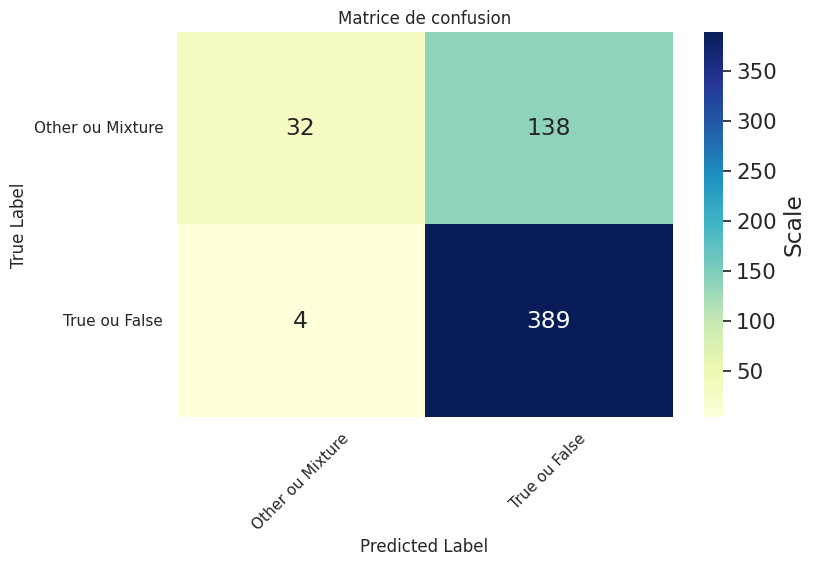

In [38]:
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(remove_stopwords=True,lowercase=True,do_lemmatize=True, replace_contractions=True, remove_digits=True)),
    ('vectorizer', TfidfVectorizer()),
    ('rf', RandomForestClassifier(criterion="log_loss", max_features="log2", n_estimators=100))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
show_scores(y_test, y_pred, show_classification_report=True, show_confusion_matrix=True)

Les résultats de classification montrent que la tâche de classification **{`true` or `false`}** vs **{`other` or `mixture`}** a donné de bons résultats, avec une précision de 0,75 et un f1-score de 0,85 pour la classe `True` ou `False`. En revanche, la classe `Other` ou `Mixture` a obtenu de moins bons résultats, avec une précision de 0,82 mais un rappel très faible de 0,21, indiquant un déséquilibre important entre les classes. Cela pourrait être dû au fait que le jeu de données initial est fortement déséquilibré en faveur de la classe `True` ou `False`, ce qui peut biaiser le modèle. Pour y remédier, nous appliquerons ultérieurement une méthode d'échantillonnage aléatoire stratifié afin de réduire ce déséquilibre (`downsampling`).

Dans l'ensemble, l'exactitude (`accuracy`) du modèle était de 75,3 %, mais le modèle a tendance à prédire la classe majoritaire ("`True` ou `False`") plus souvent.

## **Titre**

<Axes: xlabel='Our rating', ylabel='count'>

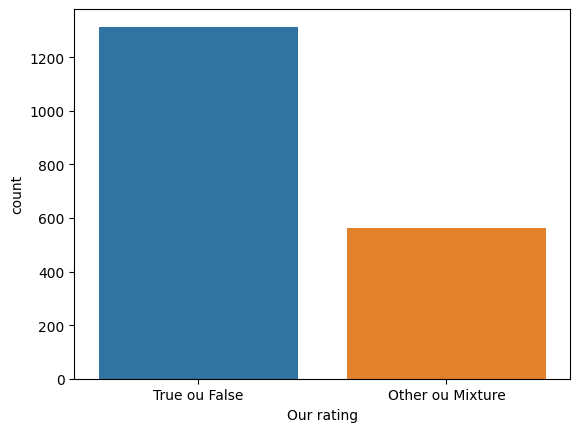

In [ ]:
# Construction d'un nouveau dataframe contenant uniquement les articles étiquetés "true" ou "false"
df_True_ou_False_vs_Other_ou_Mixture = df_merged.copy()

# Filtrage des articles avec les étiquettes 'mixture' et fusion de 'true' et 'false'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'true', 'Our rating'] = 'True ou False'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'false', 'Our rating'] = 'True ou False'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'other', 'Our rating'] = 'Other ou Mixture'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'mixture', 'Our rating'] = 'Other ou Mixture'

X = df_True_ou_False_vs_Other_ou_Mixture['Title']
y = df_True_ou_False_vs_Other_ou_Mixture['Our rating']

# Découpage du jeu de données
train_size=0.7 # 70% pour le jeu d'apprentissage
test_size=0.3 # 30% du jeu de données pour le test
seed=30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed,test_size=test_size)
sns.countplot(data=df_True_ou_False_vs_Other_ou_Mixture,  x='Our rating',order=df_True_ou_False_vs_Other_ou_Mixture['Our rating'].value_counts().index)

### Détermination des meilleur prétraitement

In [ ]:
# Attention : peut prendre plusieurs minutes à s'exécuter
preprocessing_evaluation(X, y, SVC())

Evaluation des différentes configurations : 
Pipeline                  Score
----------------------  -------
TFIDF_lowercase          0.7378
TFIDF_low_sw             0.7356
TFIDF_low_sw_lem         0.7346
TFIDF_low_sw_lem_rc_rd   0.7346
TFIDF_low_sw_lem_rc_cd   0.7340
TFIDF_low_sw_stem        0.7324
CV_lowercase             0.7026
CV_low_sw_lem_rc_cd      0.6994
CV_low_sw_lem            0.6967
CV_low_sw_lem_rc_rd      0.6967
CV_low_sw_stem           0.6967
CV_low_sw                0.6951


Le pipeline qui a donnée le meilleur resultat est `TFIDF_lowercase`.

### Essaie de plusieurs classfieurs

In [ ]:
# Création d'une liste de modèles de classification pour les comparer
models = [
    ('MNB', MultinomialNB()),
    ('LR', LogisticRegression(max_iter=10000)), 
    ('KNN', KNeighborsClassifier()), 
    ('CART', DecisionTreeClassifier()), 
    ('RF', RandomForestClassifier()), 
    ('GNB', GaussianNB()), 
    ('SVM', SVC())
]

# Définition de la graine pour le générateur de nombres aléatoires, permettant de reproduire les résultats
seed = 7 

# Évaluation des différents classificateurs avec une validation croisée sur les données d'entraînement
cv_results = evaluate_classifiers_cross_val(
    X, 
    y, 
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True), 
    vectorizer=TfidfVectorizer(),
    preprocessor=TextPreprocessor(lowercase=True),
    classifiers=models
)

MNB : 0.711 (0.033) in 3.292 s
LR : 0.708 (0.036) in 13.844 s
KNN : 0.508 (0.157) in 2.700 s
CART : 0.702 (0.041) in 123.107 s
RF : 0.762 (0.032) in 110.640 s
GNB : 0.700 (0.037) in 3.029 s
SVM : 0.760 (0.034) in 206.444 s
Tous les résultats : 

RF  accuracy : 0.762  (0.032)  en 110.640   s
SVM  accuracy : 0.760  (0.034)  en 206.444   s
MNB  accuracy : 0.711  (0.033)  en 3.292   s
LR  accuracy : 0.708  (0.036)  en 13.844   s
CART  accuracy : 0.702  (0.041)  en 123.107   s
GNB  accuracy : 0.700  (0.037)  en 3.029   s
KNN  accuracy : 0.508  (0.157)  en 2.700   s


[Text(1, 0, 'MNB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'GNB'),
 Text(7, 0, 'SVM')]

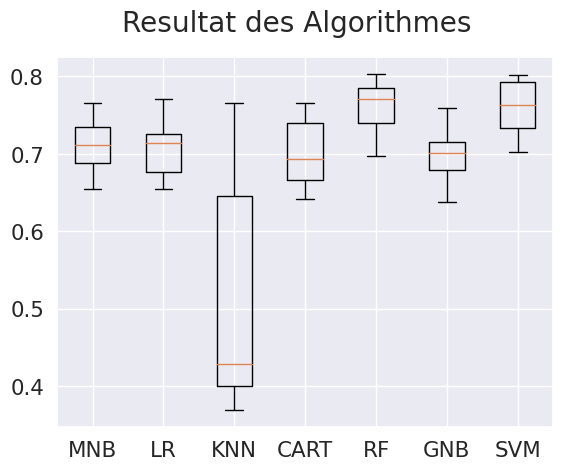

In [ ]:
# Création d'une nouvelle figure pour afficher les résultats des algorithmes
fig = plt.figure()
fig.suptitle('Resultat des Algorithmes')

# Ajout d'un sous-graphique pour afficher les boîtes à moustaches des résultats
ax = fig.add_subplot(111)
plt.boxplot(cv_results)

# Étiquetage des axes x avec les noms des modèles de classification
ax.set_xticklabels([name for (name, model) in models])

Les resultat obtenu sur le corpus de données précédent ((Text uniquement) sont nettement meilleurs nous n'entamons donc pas la recherche des hyperparamétres.

## **Texte + Titre**

<Axes: xlabel='Our rating', ylabel='count'>

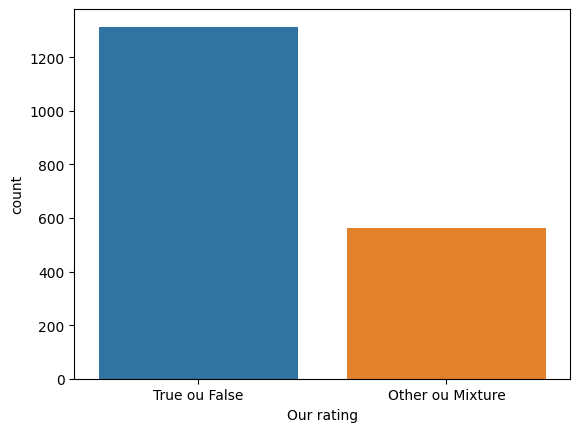

In [ ]:
# Construction d'un nouveau dataframe contenant uniquement les articles étiquetés "true" ou "false"
df_True_ou_False_vs_Other_ou_Mixture = df_merged.copy()

# Filtrage des articles avec les étiquettes 'mixture' et fusion de 'true' et 'false'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'true', 'Our rating'] = 'True ou False'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'false', 'Our rating'] = 'True ou False'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'other', 'Our rating'] = 'Other ou Mixture'
df_True_ou_False_vs_Other_ou_Mixture.loc[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'mixture', 'Our rating'] = 'Other ou Mixture'

X = df_True_ou_False_vs_Other_ou_Mixture['Text_Title']
y = df_True_ou_False_vs_Other_ou_Mixture['Our rating']

# Découpage du jeu de données
train_size=0.7 # 70% pour le jeu d'apprentissage
test_size=0.3 # 30% du jeu de données pour le test
seed=30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed,test_size=test_size)
sns.countplot(data=df_True_ou_False_vs_Other_ou_Mixture,  x='Our rating',order=df_True_ou_False_vs_Other_ou_Mixture['Our rating'].value_counts().index)

### Determination du meilleur pré-traitement 

In [ ]:
# Attention : peut prendre plusieurs minutes à s'exécuter
preprocessing_evaluation(X, y, SVC())

Evaluation des différentes configurations : 
Pipeline                  Score
----------------------  -------
TFIDF_low_sw_lem_rc_cd   0.7324
TFIDF_low_sw_lem         0.7319
TFIDF_low_sw_lem_rc_rd   0.7319
TFIDF_low_sw             0.7303
TFIDF_low_sw_stem        0.7303
TFIDF_lowercase          0.7276
CV_low_sw_lem_rc_rd      0.7058
CV_low_sw_lem            0.7058
CV_low_sw_stem           0.7047
CV_lowercase             0.7042
CV_low_sw                0.7036
CV_low_sw_lem_rc_cd      0.7026


La pipeline ayant un obtenu un meilleur score (accuracy) est `TFIDF_low_lem_rc_cd` nous utilisons donc par la suite : 
- `TfidfVectorizer` comme vectorizer pour l'extraction des features
- `TextPreprocessor(lowercase=True, remove_stopwords=True, do_lemmatize=True, replace_contractions=True, convert_digits=True)` pour le pré-traitement.

### Essaie de plusieurs classifieurs

In [ ]:
# Création d'une liste de modèles de classification pour les comparer
models = [
    ('MNB', MultinomialNB()),
    ('LR', LogisticRegression(max_iter=10000)), 
    ('KNN', KNeighborsClassifier()), 
    ('CART', DecisionTreeClassifier()), 
    ('RF', RandomForestClassifier()), 
    ('GNB', GaussianNB()), 
    ('SVM', SVC())
]

# Définition de la graine pour le générateur de nombres aléatoires, permettant de reproduire les résultats
seed = 7 

# Évaluation des différents classificateurs avec une validation croisée sur les données d'entraînement
cv_results = evaluate_classifiers_cross_val(
    X, 
    y, 
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True), 
    vectorizer=TfidfVectorizer(),
    preprocessor=TextPreprocessor(remove_stopwords=True,lowercase=True,do_lemmatize=True, replace_contractions=True, convert_digits=True),
    classifiers=models
)

MNB : 0.700 (0.032) in 5.618 s
LR : 0.720 (0.036) in 73.792 s
KNN : 0.688 (0.036) in 16.558 s
CART : 0.703 (0.028) in 294.471 s
RF : 0.761 (0.030) in 172.035 s
GNB : 0.750 (0.040) in 14.533 s
SVM : 0.754 (0.037) in 1171.628 s
Tous les résultats : 

RF  accuracy : 0.761  (0.030)  en 172.035   s
SVM  accuracy : 0.754  (0.037)  en 1171.628   s
GNB  accuracy : 0.750  (0.040)  en 14.533   s
LR  accuracy : 0.720  (0.036)  en 73.792   s
CART  accuracy : 0.703  (0.028)  en 294.471   s
MNB  accuracy : 0.700  (0.032)  en 5.618   s
KNN  accuracy : 0.688  (0.036)  en 16.558   s


[Text(1, 0, 'MNB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'GNB'),
 Text(7, 0, 'SVM')]

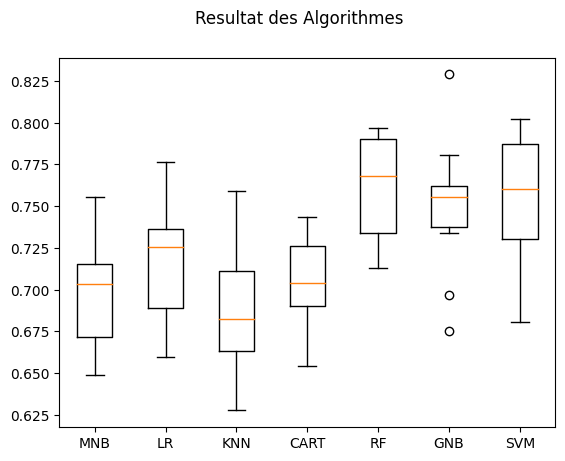

In [ ]:
# Création d'une nouvelle figure pour afficher les résultats des algorithmes
fig = plt.figure()
fig.suptitle('Resultat des Algorithmes')

# Ajout d'un sous-graphique pour afficher les boîtes à moustaches des résultats
ax = fig.add_subplot(111)
plt.boxplot(cv_results)

# Étiquetage des axes x avec les noms des modèles de classification
ax.set_xticklabels([name for (name, model) in models])

Les resultats obtenu en faisant le traitement avec uniquement le texte des article a donner de meilleurs resultats nous n'entamons donc pas la recherche des hyperparamétres.

## **Resampling - Downsampling : Texte**

Nous effectuons un downsampling pour équilibrer le nombre d'articles de la classe **{false}** avec ceux de la classe **{true}**, ce qui réduit le biais du modèle. Cette opération est réalisée sur le champ `Texte` des articles car les résultats obtenus sur ce corpus de données étaient les meilleurs.

Taille des classes : 562


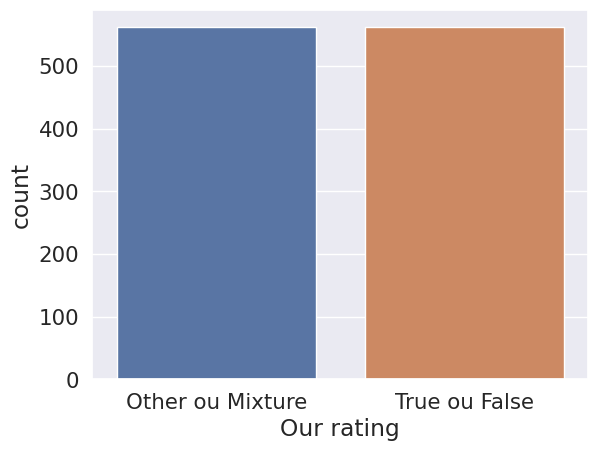

In [53]:
# Séparation des enregistrements "True ou False" et "Other ou Mixture"
df_True_ou_False = df_True_ou_False_vs_Other_ou_Mixture[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'True ou False']
df_Other_ou_Mixture = df_True_ou_False_vs_Other_ou_Mixture[df_True_ou_False_vs_Other_ou_Mixture['Our rating'] == 'Other ou Mixture']

# Calcul du nombre d'échantillons minimum entre les deux classes
num_samples = min(len(df_True_ou_False), len(df_Other_ou_Mixture))
print(f"Taille des classes : {num_samples}")

# Downsampling de la classe "True ou False" pour équilibrer les classes
df_True_ou_False_downsampled = df_True_ou_False.sample(num_samples, random_state=42)

# Fusion des classes équilibrées
df_True_ou_False_vs_Other_ou_Mixture_balanced = pd.concat([df_True_ou_False_downsampled, df_Other_ou_Mixture], axis=0)

# Mélange des données pour une meilleure répartition
df_True_ou_False_vs_Other_ou_Mixture_balanced = df_True_ou_False_vs_Other_ou_Mixture_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Affichage des premières lignes du DataFrame équilibré
df_True_ou_False_vs_Other_ou_Mixture_balanced.head()

# Affichage du nombre d'échantillons par classe
sns.countplot(data=df_True_ou_False_vs_Other_ou_Mixture_balanced,  x='Our rating',order=df_True_ou_False_vs_Other_ou_Mixture_balanced['Our rating'].value_counts().index)
df_True_ou_False_vs_Other_ou_Mixture_balanced['Our rating'].value_counts()

# Séparation des données en variables indépendantes (X) et dépendantes (y)
X = df_True_ou_False_vs_Other_ou_Mixture_balanced['Text']
y = df_True_ou_False_vs_Other_ou_Mixture_balanced['Our rating']

# Découpage du jeu de données
train_size=0.7 # 70% pour le jeu d'apprentissage
test_size= 0.3 # 30% du jeu de données pour le test
seed=7

accuracies = []
classifiers = []

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed,test_size=test_size)

### Détermination du meilleur prétraitement

In [ ]:
# Attention : peut prendre plusieurs minutes à s'exécuter
preprocessing_evaluation(X, y, SVC())

Evaluation des différentes configurations : 
Pipeline                  Score
----------------------  -------
TFIDF_lowercase          0.7090
TFIDF_low_sw             0.7055
TFIDF_low_sw_stem        0.7046
TFIDF_low_sw_lem         0.7046
TFIDF_low_sw_lem_rc_rd   0.7046
TFIDF_low_sw_lem_rc_cd   0.7028
CV_low_sw_stem           0.6423
CV_low_sw                0.6387
CV_low_sw_lem            0.6361
CV_low_sw_lem_rc_rd      0.6343
CV_low_sw_lem_rc_cd      0.6103
CV_lowercase             0.5765


Sur le jeu de donnée rééquilibré, la pipeline `TFIDF_lowercase` a donner un meilleur score (accuracy). Nous utiliserons donc par la suite : 

- `TfidfVectorizer` comme vectorizer pour l'extraction des features.
- `TextPreprocessor(lowercase=True)` pour le pré-traitement.

### Essaie de plusieurs classifieurs

In [ ]:
# Création d'une liste de modèles de classification pour les comparer
models = [
    ('MNB', MultinomialNB()),
    ('LR', LogisticRegression(max_iter=10000)), 
    ('KNN', KNeighborsClassifier()), 
    ('CART', DecisionTreeClassifier()), 
    ('RF', RandomForestClassifier()), 
    ('GNB', GaussianNB()), 
    ('SVM', SVC())
]

# Définition de la graine pour le générateur de nombres aléatoires, permettant de reproduire les résultats
seed = 7 

# Évaluation des différents classificateurs avec une validation croisée sur les données d'entraînement
cv_results = evaluate_classifiers_cross_val(
    X, 
    y, 
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True), 
    vectorizer=TfidfVectorizer(),
    preprocessor=TextPreprocessor(lowercase=True),
    classifiers=models
)

MNB : 0.699 (0.033) in 3.256 s
LR : 0.699 (0.050) in 22.061 s
KNN : 0.583 (0.048) in 7.477 s
CART : 0.617 (0.025) in 56.031 s
RF : 0.687 (0.025) in 51.420 s
GNB : 0.651 (0.023) in 7.392 s
SVM : 0.711 (0.035) in 356.661 s
Tous les résultats : 

SVM  accuracy : 0.711  (0.035)  en 356.661   s
LR  accuracy : 0.699  (0.050)  en 22.061   s
MNB  accuracy : 0.699  (0.033)  en 3.256   s
RF  accuracy : 0.687  (0.025)  en 51.420   s
GNB  accuracy : 0.651  (0.023)  en 7.392   s
CART  accuracy : 0.617  (0.025)  en 56.031   s
KNN  accuracy : 0.583  (0.048)  en 7.477   s


[Text(1, 0, 'MNB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'GNB'),
 Text(7, 0, 'SVM')]

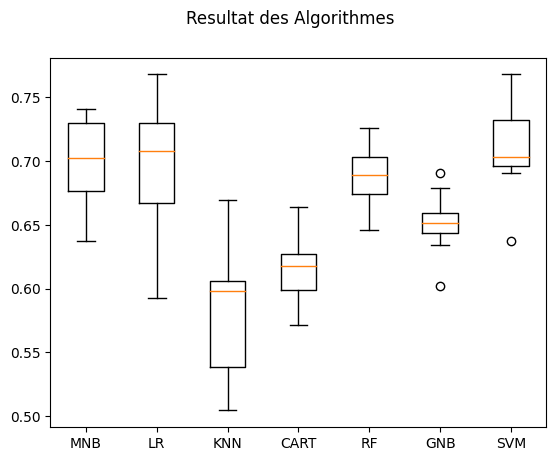

In [ ]:
# Création d'une nouvelle figure pour afficher les résultats des algorithmes
fig = plt.figure()
fig.suptitle('Resultat des Algorithmes')

# Ajout d'un sous-graphique pour afficher les boîtes à moustaches des résultats
ax = fig.add_subplot(111)
plt.boxplot(cv_results)

# Étiquetage des axes x avec les noms des modèles de classification
ax.set_xticklabels([name for (name, model) in models])

In [47]:
preprocessor = TextPreprocessor(lowercase=True)
df_True_ou_False_vs_Other_ou_Mixture_balanced['Preprocessed_text'] = preprocessor.transform(df_True_ou_False_vs_Other_ou_Mixture_balanced['Text'])

vectorizer = TfidfVectorizer()
X_tfomb = vectorizer.fit_transform(df_True_ou_False_vs_Other_ou_Mixture_balanced['Preprocessed_text'])
y_tfomb = df_True_ou_False_vs_Other_ou_Mixture_balanced['Our rating']

X_train_tfomb, X_test_tfomb, y_train_tfomb, y_test_tfomb = train_test_split(X_tfomb, y_tfomb, train_size=0.7, random_state=7,test_size=0.3)

#### Support Vector Machine Classifier

Accuracy : 0.695
Recall : 0.695
Precision : 0.702
f1_Score : 0.695
Classification Report
                  precision    recall  f1-score   support

Other ou Mixture    0.65591   0.75776   0.70317       161
   True ou False    0.74342   0.63842   0.68693       177

        accuracy                        0.69527       338
       macro avg    0.69967   0.69809   0.69505       338
    weighted avg    0.70174   0.69527   0.69467       338



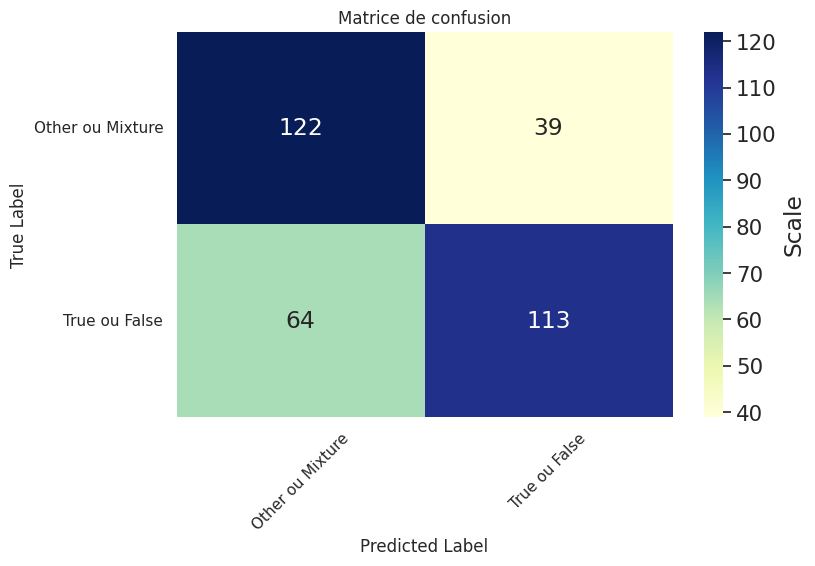

In [54]:
classifiers.append('Support Vector Machine')

svc_tfomb = SVC()
svc_tfomb.fit(X_train_tfomb, y_train_tfomb)

svc_pred_tfomb = svc_tfomb.predict(X_test_tfomb)

accuracies.append(svc_tfomb.score(X_test_tfomb, y_test_tfomb))

show_scores(y_test_tfomb, svc_pred_tfomb, show_classification_report=True, show_confusion_matrix=True, show_precision=True, show_f1_score=True, show_recall=True, show_accuracy=True)

#### Logistic Regression Classifier

Accuracy : 0.680
Recall : 0.680
Precision : 0.686
f1_Score : 0.680
Classification Report
                  precision    recall  f1-score   support

Other ou Mixture    0.64481   0.73292   0.68605       161
   True ou False    0.72258   0.63277   0.67470       177

        accuracy                        0.68047       338
       macro avg    0.68369   0.68284   0.68037       338
    weighted avg    0.68554   0.68047   0.68010       338



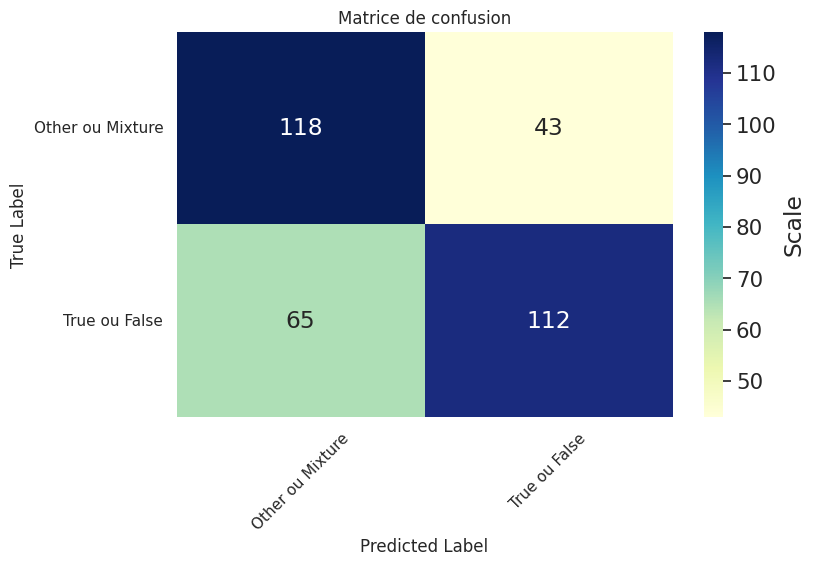

In [55]:
classifiers.append('Logistic Regression')

lrc_tfomb = LogisticRegression(max_iter=10000)

lrc_tfomb.fit(X_train_tfomb, y_train_tfomb)

lrc_predicted_tfomb = lrc_tfomb.predict(X_test_tfomb)

accuracies.append(lrc_tfomb.score(X_test_tfomb, y_test_tfomb))

show_scores(y_test_tfomb, lrc_predicted_tfomb, show_classification_report=True, show_confusion_matrix=True, show_precision=True, show_f1_score=True, show_recall=True, show_accuracy=True)

#### Multinomial Naive Bayes Classifier

Accuracy : 0.663
Recall : 0.663
Precision : 0.690
f1_Score : 0.655
Classification Report
                  precision    recall  f1-score   support

Other ou Mixture    0.60731   0.82609   0.70000       161
   True ou False    0.76471   0.51412   0.61486       177

        accuracy                        0.66272       338
       macro avg    0.68601   0.67011   0.65743       338
    weighted avg    0.68973   0.66272   0.65542       338



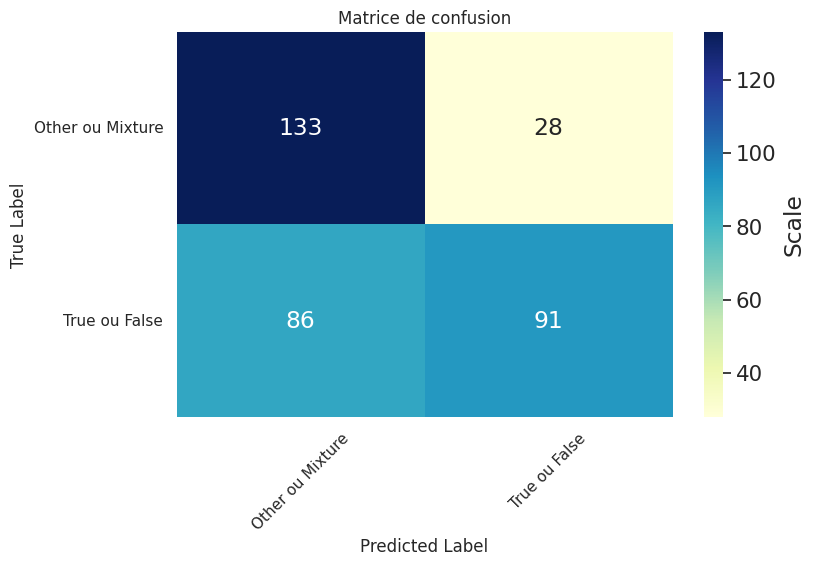

In [56]:
classifiers.append('Multinomial NB')

mnbc_tfomb = MultinomialNB()

mnbc_tfomb.fit(X_train_tfomb, y_train_tfomb)

mnbc_pred_tfomb = mnbc_tfomb.predict(X_test_tfomb)

accuracies.append(mnbc_tfomb.score(X_test_tfomb, y_test_tfomb))

show_scores(y_test_tfomb, mnbc_pred_tfomb, show_classification_report=True, show_confusion_matrix=True, show_precision=True, show_f1_score=True, show_recall=True, show_accuracy=True)

#### Visualisation des resultats

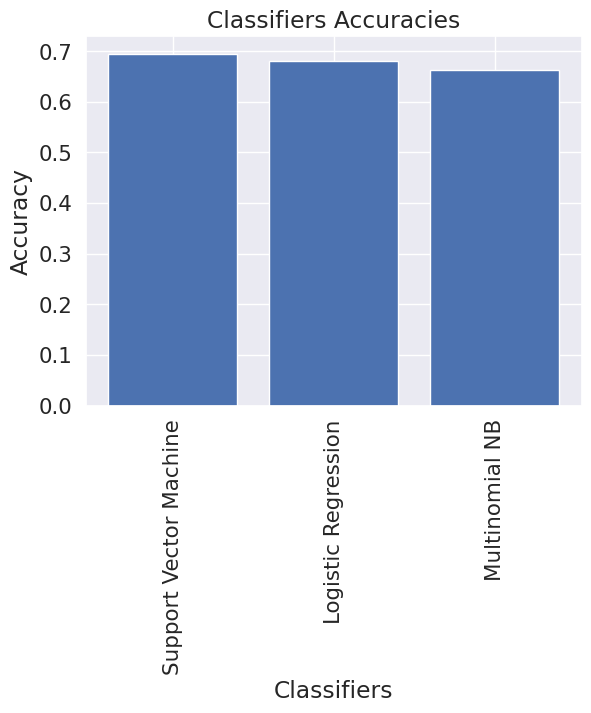

In [57]:
plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title('Classifiers Accuracies')
plt.show()

Le `Boxplot` représentant les accuracy obtenu pour chaque models lors de la validation croisée, ainsi que le précédent `Bar Graphe` , montrent que le classifieur `Support Vector Machine (SVM)` 
semble offrir de meilleures performances par rapport aux autres modèles sur ce jeu de données. La prochaine étape consistera à explorer et à ajuster les différents hyperparamètres de l'algorithme `SVM` afin de trouver la combinaison optimale pour améliorer encore davantage ses performances.

### Recherche des hyperparamétres

In [ ]:
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10], 
    'svm__gamma' : [0.001, 0.01, 0.1, 1], 
    'svm__kernel': ['linear','rbf','poly','sigmoid']
}

pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(lowercase=True)),
    ('vectorizer', TfidfVectorizer()),
    ('svm', SVC())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
 
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best estimator: {}".format(grid_search.best_estimator_))


print("Ensemble des meilleurs paramètres :")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best cross-validation score: 0.683
Best parameters: {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best estimator: Pipeline(steps=[('preprocessor', TextPreprocessor(lowercase=True)),
                ('vectorizer', TfidfVectorizer()),
                ('svm', SVC(C=10, gamma=1))])
Ensemble des meilleurs paramètres :
	svm__C: 10
	svm__gamma: 1
	svm__kernel: 'rbf'


Classification Report
                  precision    recall  f1-score   support

Other ou Mixture    0.64972   0.70552   0.67647       163
   True ou False    0.70186   0.64571   0.67262       175

        accuracy                        0.67456       338
       macro avg    0.67579   0.67562   0.67454       338
    weighted avg    0.67672   0.67456   0.67448       338



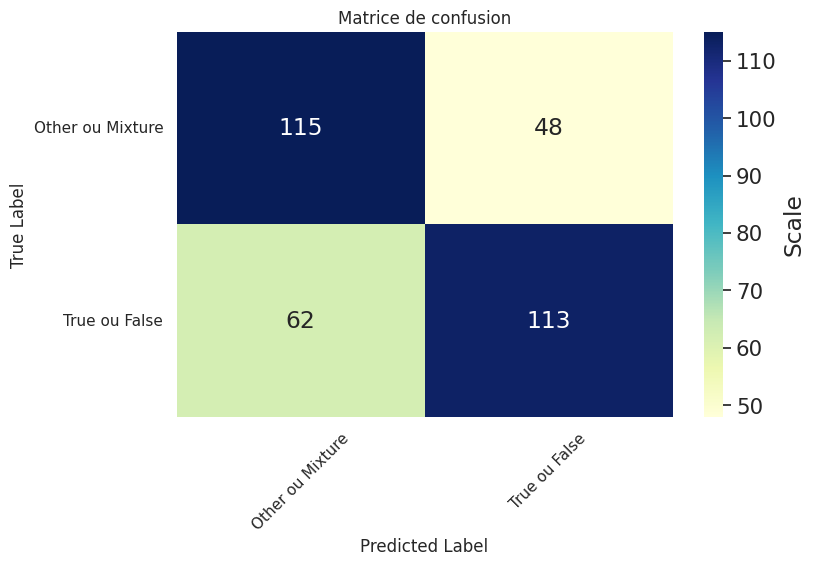


Les premiers résultats : 
     svm__C  svm__gamma svm__kernel  accuracy
61    10.0         1.0         rbf  0.683262
62    10.0         1.0        poly  0.678159
57    10.0         0.1         rbf  0.674369
45     1.0         1.0         rbf  0.674337
47     1.0         1.0     sigmoid  0.670531


In [ ]:
# Matrice de confusion
y_pred = grid_search.predict(X_test)
show_scores(y_test, y_pred, show_classification_report=True, show_confusion_matrix=True)

df_results=pd.concat([
    pd.DataFrame(grid_search.cv_results_["params"]),
    pd.DataFrame(grid_search.cv_results_["mean_test_score"],columns=['accuracy'])
    ],axis=1).sort_values('accuracy', ascending=False)
    
print ("\nLes premiers résultats : \n",df_results.head()) 

Après le downsampling, pour la tâche de classification **`True` ou `False`** vs **`Other` ou `Mixture`**, les résultats montrent que la précision et le rappel sont désormais assez similaires entre les deux classes, avec une précision de 70,19% pour la classe **"`True` ou `False`"** et de 64,97% pour la classe **"`Other` ou `Mixture`"**. L'exactitude globale est de 67,46%, et le f1-score moyen s'élève à 67,45%. Bien que ces résultats soient légèrement inférieurs à ceux obtenus avant le `downsampling`, le modèle est maintenant moins biaisé en faveur de la classe majoritaire et pourrait être plus fiable pour prédire de nouvelles données.

## **Conclusion Downsampling VS Normal**

Avant le `downsampling`, nous avons obtenu des résultats de classification assez déséquilibrés, avec une grande différence entre les scores de précision, de rappel et de f1-score pour les deux classes. En revanche, après avoir appliqué la technique de `downsampling`, nous avons réussi à équilibrer les données et à obtenir des résultats de classification plus homogènes, avec une précision, un rappel et un f1-score mieux répartis entre les deux classes. La précision de la classe **"`Other` ou `Mixture`"** a diminué, mais le rappel a augmenté, indiquant que le modèle est désormais capable de détecter davantage de cas positifs pour cette classe. En somme, nous avons amélioré les performances de classification en équilibrant les données grâce à la méthode d'échantillonnage aléatoire stratifié.

# **Tâche 3 : Classification TRUE VS FALSE VS OTHER VS MIXTURE**

## **Texte**

<Axes: xlabel='Our rating', ylabel='count'>

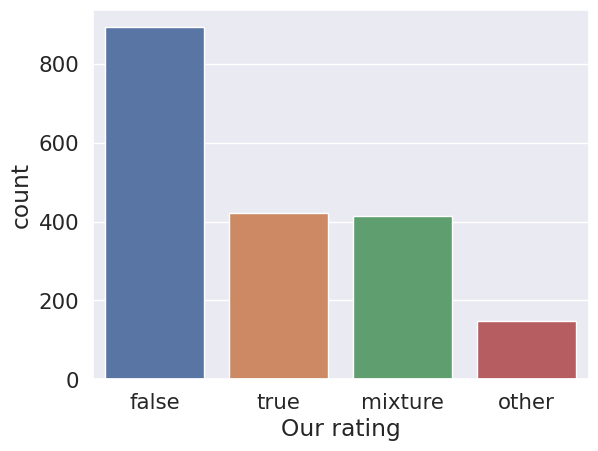

In [64]:
X = df_merged['Text']
y = df_merged['Our rating']

# Découpage du jeu de données
train_size=0.7 # 70% pour le jeu d'apprentissage
test_size=0.3 # 30% du jeu de données pour le test
seed=30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed,test_size=test_size)
sns.countplot(data=df_merged,  x='Our rating',order=df_merged['Our rating'].value_counts().index)

### **Détermination du meilleurs pré-traitement**

In [ ]:
# Attention : peut prendre plusieurs minutes à s'exécuter
preprocessing_evaluation(X, y, SVC())

Evaluation des différentes configurations : 
Pipeline                  Score
----------------------  -------
TFIDF_lowercase          0.5448
TFIDF_low_sw_stem        0.5405
TFIDF_low_sw_lem         0.5400
TFIDF_low_sw_lem_rc_rd   0.5400
TFIDF_low_sw             0.5400
TFIDF_low_sw_lem_rc_cd   0.5378
CV_low_sw_stem           0.5208
CV_low_sw                0.5171
CV_low_sw_lem_rc_rd      0.5165
CV_low_sw_lem            0.5155
CV_low_sw_lem_rc_cd      0.5075
CV_lowercase             0.4899


Aprés avoir lancer les differents pipeline que nous avons pré-défini, nous voyons que la pipeline `TFIDF_low` a donné un score (accuracy) plus elevé que les autres nous utiliserons donc par la suite : 
- Le `TfidfVectorizer` comme vectorizer pour l'extraction des features.
- Le `TextPreprocessor(lowercase=True)` pour le prétraitement.

### **Essai de plusieurs classifieurs**

In [ ]:
# Création d'une liste de modèles de classification pour les comparer
models = [
    ('MNB', MultinomialNB()),
    ('LR', LogisticRegression(max_iter=10000)), 
    ('KNN', KNeighborsClassifier()), 
    ('CART', DecisionTreeClassifier()), 
    ('RF', RandomForestClassifier()), 
    ('GNB', GaussianNB()), 
    ('SVM', SVC())
]

# Définition de la graine pour le générateur de nombres aléatoires, permettant de reproduire les résultats
seed = 7 

# Évaluation des différents classificateurs avec une validation croisée sur les données d'entraînement
cv_results = evaluate_classifiers_cross_val(
    X, 
    y, 
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True), 
    vectorizer=TfidfVectorizer(),
    preprocessor=TextPreprocessor(lowercase=True),
    classifiers=models
)

MNB : 0.477 (0.043) in 6.556 s
LR : 0.592 (0.042) in 409.392 s
KNN : 0.528 (0.043) in 17.119 s
CART : 0.541 (0.041) in 95.280 s
RF : 0.600 (0.041) in 127.439 s
GNB : 0.598 (0.043) in 16.691 s
SVM : 0.605 (0.037) in 1865.387 s
Tous les résultats : 

SVM  accuracy : 0.605  (0.037)  en 1865.387   s
RF  accuracy : 0.600  (0.041)  en 127.439   s
GNB  accuracy : 0.598  (0.043)  en 16.691   s
LR  accuracy : 0.592  (0.042)  en 409.392   s
CART  accuracy : 0.541  (0.041)  en 95.280   s
KNN  accuracy : 0.528  (0.043)  en 17.119   s
MNB  accuracy : 0.477  (0.043)  en 6.556   s


[Text(1, 0, 'MNB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'GNB'),
 Text(7, 0, 'SVM')]

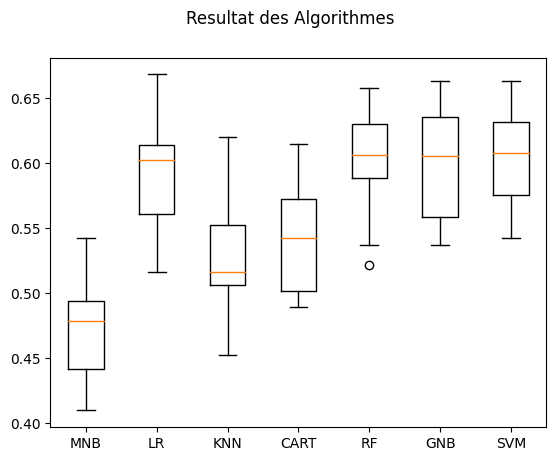

In [ ]:
# Création d'une nouvelle figure pour afficher les résultats des algorithmes
fig = plt.figure()
fig.suptitle('Resultat des Algorithmes')

# Ajout d'un sous-graphique pour afficher les boîtes à moustaches des résultats
ax = fig.add_subplot(111)
plt.boxplot(cv_results)

# Étiquetage des axes x avec les noms des modèles de classification
ax.set_xticklabels([name for (name, model) in models])

In [65]:
preprocessor = TextPreprocessor(lowercase=True)
df_merged['Preprocessed_text'] = preprocessor.transform(df_merged['Text'])

vectorizer = TfidfVectorizer()
X_tf_all = vectorizer.fit_transform(df_merged['Preprocessed_text'])
y_tf_all = df_merged['Our rating']

accuracies = []
classifiers = []

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_tf_all, y_tf_all, train_size=0.7, random_state=30,test_size=0.3)

#### Support Vector Machine

Accuracy : 0.634
Recall : 0.634
Precision : 0.647
f1_Score : 0.599
Classification Report
              precision    recall  f1-score   support

       false    0.64304   0.92453   0.75851       265
     mixture    0.57609   0.44915   0.50476       118
       other    0.88889   0.16327   0.27586        49
        true    0.62963   0.38931   0.48113       131

    accuracy                        0.63410       563
   macro avg    0.68441   0.48156   0.50507       563
weighted avg    0.64729   0.63410   0.59878       563



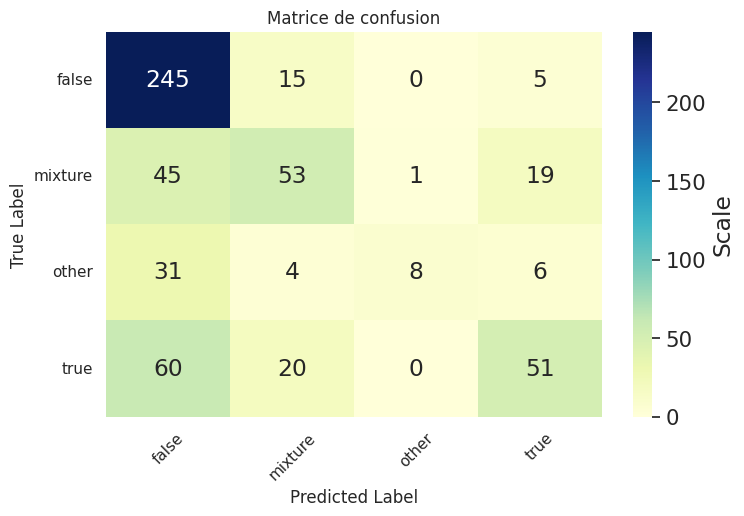

In [73]:
classifiers.append('Support Vector Machine')

svc_all = SVC(C=10)

svc_all.fit(X_train_all, y_train_all)

svc_pred_all = svc_all.predict(X_test_all)

accuracies.append(svc_all.score(X_test_all, y_test_all))

show_scores(y_test_all, svc_pred_all, show_classification_report=True, show_confusion_matrix=True, show_precision=True, show_f1_score=True, show_recall=True, show_accuracy=True)

#### Random Forest Classifier

Accuracy : 0.583
Precision : 0.633
f1_Score : 0.516
Classification Report
              precision    recall  f1-score   support

       false    0.56156   0.98113   0.71429       265
     mixture    0.66000   0.27966   0.39286       118
       other    0.88889   0.16327   0.27586        49
        true    0.65854   0.20611   0.31395       131

    accuracy                        0.58259       563
   macro avg    0.69225   0.40754   0.42424       563
weighted avg    0.63324   0.58259   0.51561       563



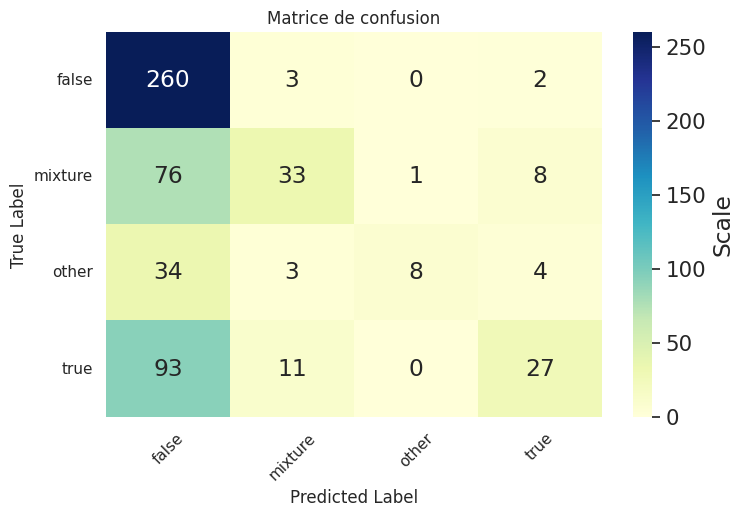

In [68]:
classifiers.append('Random Forest Classifier')
rfc_all = RandomForestClassifier()
rfc_all.fit(X_train_all, y_train_all)

rfc_pred_all = rfc_all.predict(X_test_all)

accuracies.append(rfc_all.score(X_test_all, y_test_all))

show_scores(y_test_all, rfc_pred_all, show_classification_report=True, show_confusion_matrix=True, show_accuracy=True, show_precision=True, show_f1_score=True)

#### Gaussian Naive Classifier

Accuracy : 0.574
Precision : 0.572
f1_Score : 0.560
Classification Report
              precision    recall  f1-score   support

       false    0.65574   0.75472   0.70175       265
     mixture    0.54430   0.36441   0.43655       118
       other    0.55000   0.22449   0.31884        49
        true    0.43396   0.52672   0.47586       131

    accuracy                        0.57371       563
   macro avg    0.54600   0.46758   0.48325       563
weighted avg    0.57158   0.57371   0.56028       563



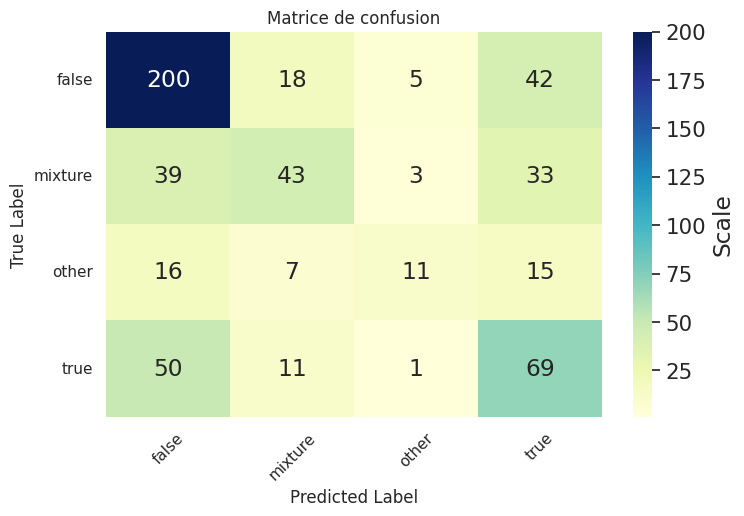

In [69]:
classifiers.append('Gaussian NB')

gnbc_all = GaussianNB()

gnbc_all.fit(X_train_all.toarray(), y_train_all)

gnbc_pred_all = gnbc_all.predict(X_test_all.toarray())

accuracies.append(gnbc_all.score(X_test_all.toarray(), y_test_all))

show_scores(y_test_all, gnbc_pred_all, show_classification_report=True, show_confusion_matrix=True, show_accuracy=True, show_precision=True, show_f1_score=True)

#### Visualisation des resultat

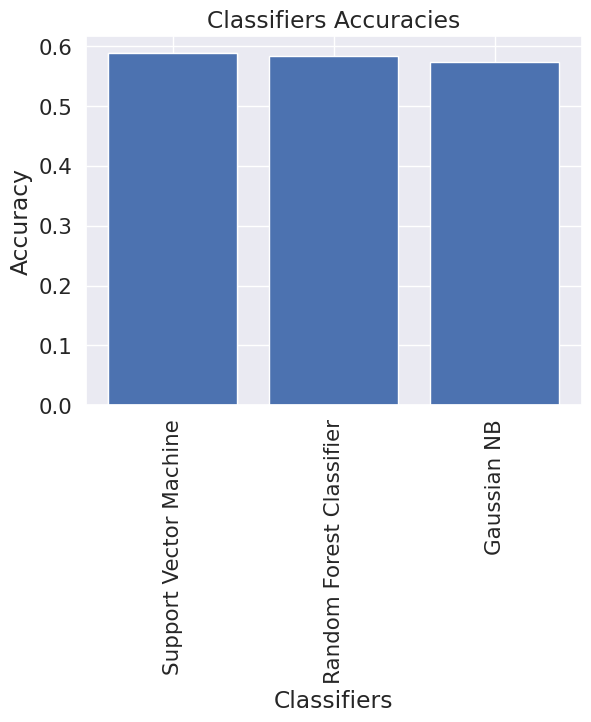

In [70]:
plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title('Classifiers Accuracies')
plt.show()

Le `Boxplot` représentant les accuracy obtenu pour chaque models lors de la validation croisée ainsi que le `Bar Graph` précédent montrent que, le classifieur `Support Vector Machine (SVM)` 
semble offrir de meilleures performances par rapport aux autres modèles sur ce jeu de données. La prochaine étape consistera à explorer et à ajuster les différents hyperparamètres de l'algorithme `SVM` afin de trouver la combinaison optimale pour améliorer encore davantage ses performances.

### **Recherche des hyperparamétres**

In [ ]:
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10], 
    'svm__gamma' : [0.001, 0.01, 0.1, 1], 
    'svm__kernel': ['linear','rbf','poly','sigmoid']
}

pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(lowercase=True)),
    ('vectorizer', TfidfVectorizer()),
    ('svm', SVC())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
 
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best estimator: {}".format(grid_search.best_estimator_))


print("Ensemble des meilleurs paramètres :")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best cross-validation score: 0.599
Best parameters: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best estimator: Pipeline(steps=[('preprocessor', TextPreprocessor(lowercase=True)),
                ('vectorizer', TfidfVectorizer()),
                ('svm', SVC(C=10, gamma=0.1))])
Ensemble des meilleurs paramètres :
	svm__C: 10
	svm__gamma: 0.1
	svm__kernel: 'rbf'


Classification Report
              precision    recall  f1-score   support

       false    0.70588   0.86038   0.77551       265
     mixture    0.53846   0.53390   0.53617       118
       other    0.81818   0.18367   0.30000        49
        true    0.59821   0.51145   0.55144       131

    accuracy                        0.65187       563
   macro avg    0.66518   0.52235   0.54078       563
weighted avg    0.65551   0.65187   0.63182       563



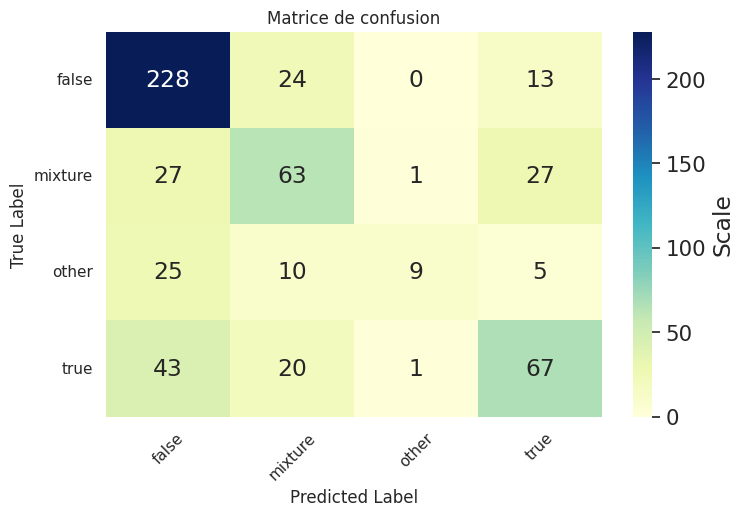


Les premiers résultats : 
     svm__C  svm__gamma svm__kernel  accuracy
57    10.0       0.100         rbf  0.598618
60    10.0       1.000      linear  0.593287
56    10.0       0.100      linear  0.593287
52    10.0       0.010      linear  0.593287
48    10.0       0.001      linear  0.593287


In [ ]:
y_pred = grid_search.predict(X_test)
show_scores(y_test, y_pred, show_classification_report=True, show_confusion_matrix=True)

df_results=pd.concat([
    pd.DataFrame(grid_search.cv_results_["params"]),
    pd.DataFrame(grid_search.cv_results_["mean_test_score"],columns=['accuracy'])
    ],axis=1).sort_values('accuracy', ascending=False)
    
print ("\nLes premiers résultats : \n",df_results.head())

Classification Report
              precision    recall  f1-score   support

       false    0.70588   0.86038   0.77551       265
     mixture    0.53846   0.53390   0.53617       118
       other    0.81818   0.18367   0.30000        49
        true    0.59821   0.51145   0.55144       131

    accuracy                        0.65187       563
   macro avg    0.66518   0.52235   0.54078       563
weighted avg    0.65551   0.65187   0.63182       563



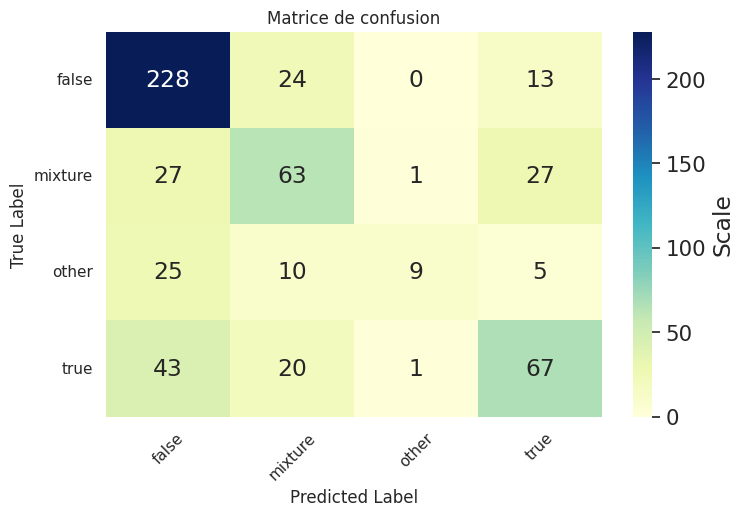

In [ ]:
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(lowercase=True)),
    ('vectorizer', TfidfVectorizer()),
    ('rf', SVC(C=10, gamma=0.1, kernel='rbf'))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
show_scores(y_test, y_pred, show_classification_report=True, show_confusion_matrix=True)

Le rapport de classification montre les performances du modèle pour la tâche de classification d'articles de presse en 4 catégories. L'accuracy du modèle est de 65,2%, ce qui signifie que 65,2% des prédictions du modèle sont correctes.

Les classes "false" et "true" ont une précision et un rappel supérieurs à 50%, ce qui indique que le modèle est capable de bien classer ces deux classes. Cependant, la classe "other" a une précision élevée mais un rappel très faible, ce qui signifie que le modèle a du mal à bien classer les articles de cette classe.

La classe "mixture" a des scores similaires de précision et de rappel, mais un faible f1-score, ce qui suggère que le modèle a également des difficultés à bien classer les articles de cette classe.

En général, les résultats montrent que le modèle est biaisé en faveur des classes majoritaires, ce qui affecte la performance du modèle pour les classes minoritaires. Nous appliquerons donc plus loin des méthodes de rééquilibrage des classes pour améliorer la performance du modèle pour ces classes.

## **Titre**

<Axes: xlabel='Our rating', ylabel='count'>

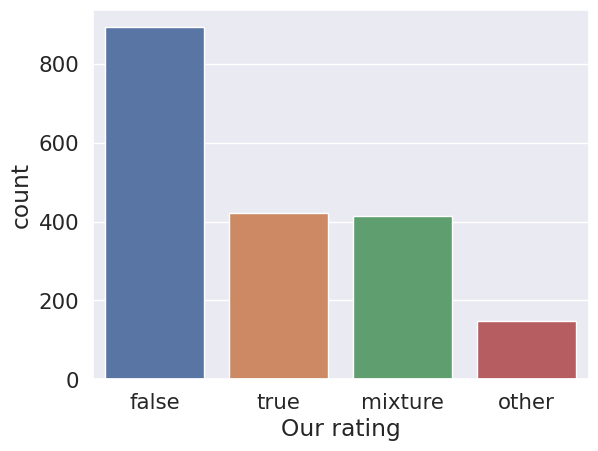

In [ ]:
X = df_merged['Title']
y = df_merged['Our rating']

# Découpage du jeu de données
train_size=0.7 # 70% pour le jeu d'apprentissage
test_size=0.3 # 30% du jeu de données pour le test
seed=30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed,test_size=test_size)
sns.countplot(data=df_merged,  x='Our rating',order=df_merged['Our rating'].value_counts().index)

### **Determination du meilleur prétraitement**

In [ ]:
# Attention : peut prendre plusieurs minutes à s'exécuter
preprocessing_evaluation(X, y, SVC())

Evaluation des différentes configurations : 
Pipeline                  Score
----------------------  -------
TFIDF_low_sw             0.5277
TFIDF_low_sw_lem         0.5240
TFIDF_low_sw_lem_rc_rd   0.5240
TFIDF_low_sw_stem        0.5229
TFIDF_low_sw_lem_rc_cd   0.5224
TFIDF_lowercase          0.5165
CV_lowercase             0.4712
CV_low_sw                0.4712
CV_low_sw_lem            0.4707
CV_low_sw_lem_rc_rd      0.4707
CV_low_sw_stem           0.4701
CV_low_sw_lem_rc_cd      0.4696


La pipeline `TFIDF_low_sw` a donner un meilleur resultat que les autres, nous utilisons donc le `TfidfVectorizer` pour vectoriser le corpus de données et `TextPreprocessor(remove_stopwords=True,lowercase=True)` pour le pré-traitement.

### **Essaie de plusieurs classifieurs**

In [ ]:
# Création d'une liste de modèles de classification pour les comparer
models = [
    ('MNB', MultinomialNB()),
    ('LR', LogisticRegression(max_iter=10000)), 
    ('KNN', KNeighborsClassifier()), 
    ('CART', DecisionTreeClassifier()), 
    ('RF', RandomForestClassifier()), 
    ('GNB', GaussianNB()), 
    ('SVM', SVC())
]

# Définition de la graine pour le générateur de nombres aléatoires, permettant de reproduire les résultats
seed = 7 

# Évaluation des différents classificateurs avec une validation croisée sur les données d'entraînement
cv_results = evaluate_classifiers_cross_val(
    X, 
    y, 
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True), 
    vectorizer=TfidfVectorizer(),
    preprocessor=TextPreprocessor(remove_stopwords=True,lowercase=True),
    classifiers=models
)

MNB : 0.501 (0.053) in 3.207 s
LR : 0.540 (0.056) in 87.032 s
KNN : 0.370 (0.090) in 4.921 s
CART : 0.536 (0.038) in 133.725 s
RF : 0.576 (0.050) in 164.751 s
GNB : 0.530 (0.042) in 4.106 s
SVM : 0.559 (0.051) in 355.862 s
Tous les résultats : 

RF  accuracy : 0.576  (0.050)  en 164.751   s
SVM  accuracy : 0.559  (0.051)  en 355.862   s
LR  accuracy : 0.540  (0.056)  en 87.032   s
CART  accuracy : 0.536  (0.038)  en 133.725   s
GNB  accuracy : 0.530  (0.042)  en 4.106   s
MNB  accuracy : 0.501  (0.053)  en 3.207   s
KNN  accuracy : 0.370  (0.090)  en 4.921   s


Le `Boxplot` représentant les accuracy obtenu pour chaque models lors de la validation croisée montre que, l'algorithme `RandomForest (RF)` 
semble offrir de meilleures performances par rapport aux autres modèles sur ce jeu de données. La prochaine étape consistera à explorer et à ajuster les différents hyperparamètres de l'algorithme `RF` afin de trouver la combinaison optimale pour améliorer encore davantage ses performances.



## **Texte + Titre**

<Axes: xlabel='Our rating', ylabel='count'>

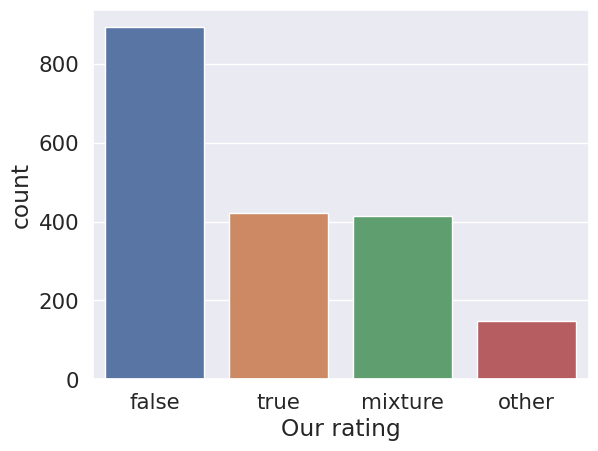

In [ ]:
X = df_merged['Text_Title']
y = df_merged['Our rating']

# Découpage du jeu de données
train_size=0.7 # 70% pour le jeu d'apprentissage
test_size=0.3 # 30% du jeu de données pour le test
seed=30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed,test_size=test_size)
sns.countplot(data=df_merged,  x='Our rating',order=df_merged['Our rating'].value_counts().index)

### **Determination du meilleur prétraitement**

In [ ]:
# Note : peut prendre plusieurs minutes à s'exécuter
preprocessing_evaluation(X, y, SVC())

Evaluation des différentes configurations : 
Pipeline                  Score
----------------------  -------
TFIDF_low_sw_stem        0.5394
TFIDF_lowercase          0.5389
TFIDF_low_sw_lem         0.5389
TFIDF_low_sw_lem_rc_rd   0.5389
TFIDF_low_sw_lem_rc_cd   0.5373
TFIDF_low_sw             0.5362
CV_low_sw_stem           0.5203
CV_low_sw_lem            0.5187
CV_low_sw_lem_rc_rd      0.5176
CV_low_sw                0.5139
CV_low_sw_lem_rc_cd      0.5032
CV_lowercase             0.4915


### **Essaie de plusieurs classifieurs**

In [ ]:
# Création d'une liste de modèles de classification pour les comparer
models = [
    ('MNB', MultinomialNB()),
    ('LR', LogisticRegression(max_iter=10000)), 
    ('KNN', KNeighborsClassifier()), 
    ('CART', DecisionTreeClassifier()), 
    ('RF', RandomForestClassifier()), 
    ('GNB', GaussianNB()), 
    ('SVM', SVC())
]

# Définition de la graine pour le générateur de nombres aléatoires, permettant de reproduire les résultats
seed = 7 

# Évaluation des différents classificateurs avec une validation croisée sur les données d'entraînement
cv_results = evaluate_classifiers_cross_val(
    X, 
    y, 
    kfold=KFold(n_splits=10, random_state=seed, shuffle=True), 
    vectorizer=TfidfVectorizer(),
    preprocessor=TextPreprocessor(remove_stopwords=True,lowercase=True,do_stem=True),
    classifiers=models
)

MNB : 0.479 (0.041) in 5.831 s
LR : 0.592 (0.036) in 316.035 s
KNN : 0.515 (0.037) in 12.660 s
CART : 0.554 (0.022) in 59.628 s
RF : 0.605 (0.047) in 89.658 s
GNB : 0.584 (0.045) in 11.936 s
SVM : 0.611 (0.040) in 1301.001 s
Tous les résultats : 

SVM  accuracy : 0.611  (0.040)  en 1301.001   s
RF  accuracy : 0.605  (0.047)  en 89.658   s
LR  accuracy : 0.592  (0.036)  en 316.035   s
GNB  accuracy : 0.584  (0.045)  en 11.936   s
CART  accuracy : 0.554  (0.022)  en 59.628   s
KNN  accuracy : 0.515  (0.037)  en 12.660   s
MNB  accuracy : 0.479  (0.041)  en 5.831   s


[Text(1, 0, 'MNB'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'RF'),
 Text(6, 0, 'GNB'),
 Text(7, 0, 'SVM')]

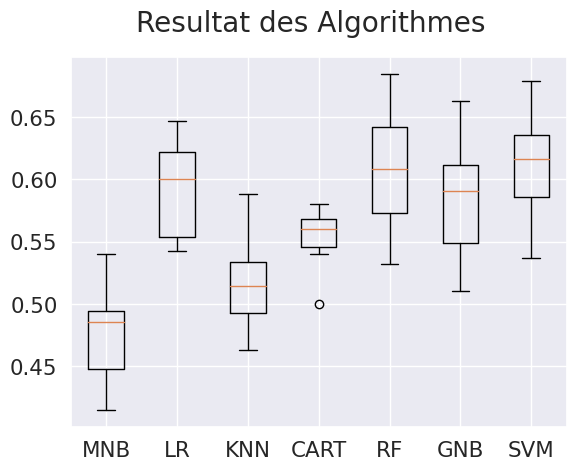

In [ ]:
# Création d'une nouvelle figure pour afficher les résultats des algorithmes
fig = plt.figure()
fig.suptitle('Resultat des Algorithmes')

# Ajout d'un sous-graphique pour afficher les boîtes à moustaches des résultats
ax = fig.add_subplot(111)
plt.boxplot(cv_results)

# Étiquetage des axes x avec les noms des modèles de classification
ax.set_xticklabels([name for (name, model) in models])

### **Recherche des hyperparamétres**

In [ ]:
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10], 
    'svm__gamma' : [0.001, 0.01, 0.1, 1], 
    'svm__kernel': ['linear','rbf','poly','sigmoid']
}

pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(lowercase=True)),
    ('vectorizer', TfidfVectorizer()),
    ('svm', SVC())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
 
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best estimator: {}".format(grid_search.best_estimator_))


print("Ensemble des meilleurs paramètres :")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best cross-validation score: 0.596
Best parameters: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best estimator: Pipeline(steps=[('preprocessor', TextPreprocessor(lowercase=True)),
                ('vectorizer', TfidfVectorizer()),
                ('svm', SVC(C=10, gamma=0.1))])
Ensemble des meilleurs paramètres :
	svm__C: 10
	svm__gamma: 0.1
	svm__kernel: 'rbf'


Classification Report
              precision    recall  f1-score   support

       false    0.68421   0.83396   0.75170       265
     mixture    0.52000   0.55085   0.53498       118
       other    0.81818   0.18367   0.30000        49
        true    0.60577   0.48092   0.53617       131

    accuracy                        0.63588       563
   macro avg    0.65704   0.51235   0.53071       563
weighted avg    0.64320   0.63588   0.61681       563



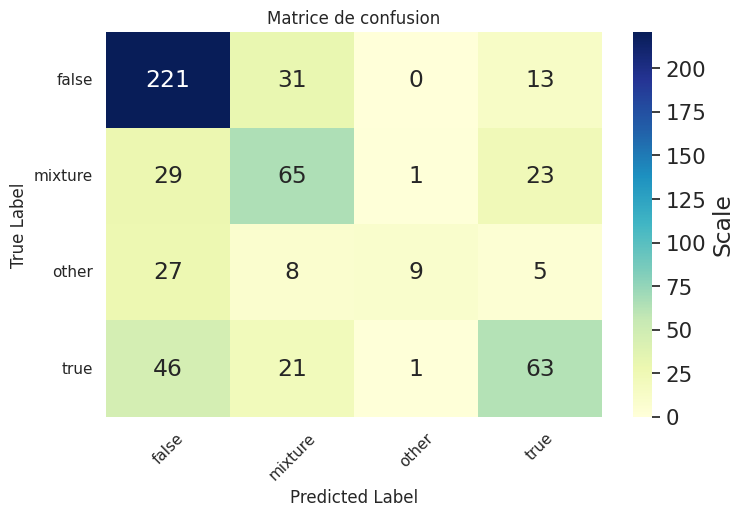


Les premiers résultats : 
     svm__C  svm__gamma svm__kernel  accuracy
57    10.0       0.100         rbf  0.595562
60    10.0       1.000      linear  0.590996
56    10.0       0.100      linear  0.590996
52    10.0       0.010      linear  0.590996
48    10.0       0.001      linear  0.590996


In [ ]:
y_pred = grid_search.predict(X_test)
show_scores(y_test, y_pred, show_classification_report=True, show_confusion_matrix=True)

df_results=pd.concat([
    pd.DataFrame(grid_search.cv_results_["params"]),
    pd.DataFrame(grid_search.cv_results_["mean_test_score"],columns=['accuracy'])
    ],axis=1).sort_values('accuracy', ascending=False)
    
print ("\nLes premiers résultats : \n",df_results.head())

Classification Report
              precision    recall  f1-score   support

       false    0.68421   0.83396   0.75170       265
     mixture    0.52000   0.55085   0.53498       118
       other    0.81818   0.18367   0.30000        49
        true    0.60577   0.48092   0.53617       131

    accuracy                        0.63588       563
   macro avg    0.65704   0.51235   0.53071       563
weighted avg    0.64320   0.63588   0.61681       563



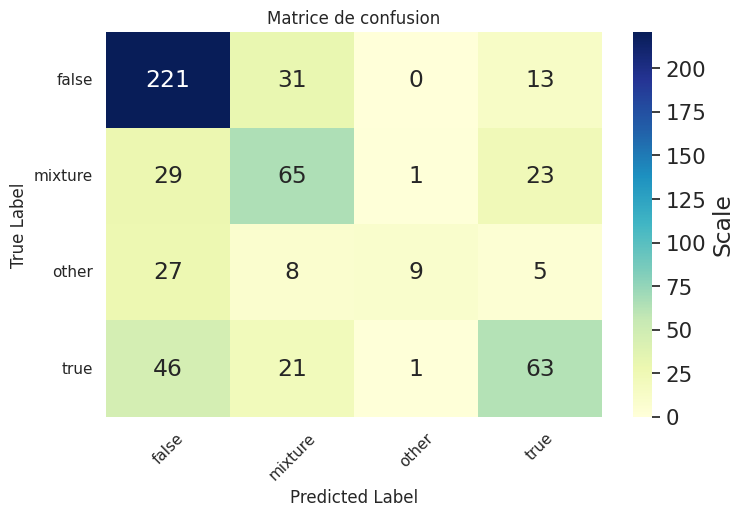

In [ ]:
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(lowercase=True)),
    ('vectorizer', TfidfVectorizer()),
    ('rf', SVC(C=10, gamma=0.1, kernel='rbf'))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
show_scores(y_test, y_pred, show_classification_report=True, show_confusion_matrix=True)


Les résultats obtenus jusqu'à présent avec ce corpus de données (titres et texte des articles) sont prometteurs, mais il est clair que la matrice de confusion et le rapport de classification obtenus uniquement à partir du texte des articles sont meilleurs.

##**Resampling - Combinaison du Upsampling et du Downsampling : Texte**

Il est à noter que le jeu de données utilisé à cette étape est fortement déséquilibré, ce qui entraîne un biais important du modèle en faveur de la classe majoritaire. Pour pallier ce problème, nous avons opté pour une combinaison de techniques d'upsampling et de downsampling afin de rééquilibrer le jeu de données.

**Résumé** :
- Utilisation de la classe `RandomOverSampler` du package `imbalanced-learn` aprés le preprocessing et l'extraction des features pour augmenter les articles `OTHER` -> `Upsampling`.
- Suppression de maniére aleatoire de plusieurs article de type `FALSE` pour équilibrer avec les autres classes -> `Downsampling`.

###**Downsampling des 'false'**

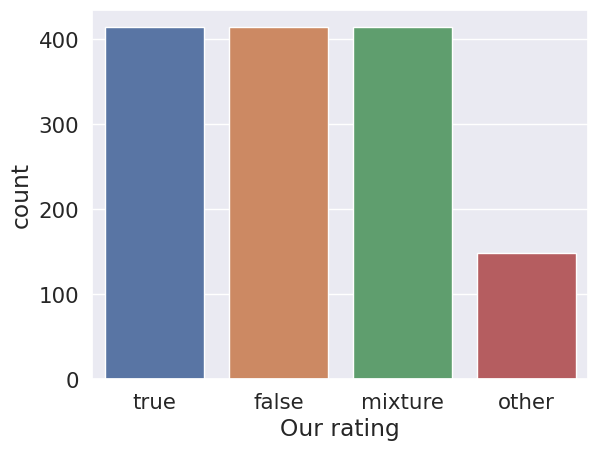

In [ ]:
#Downsample the false articles
from sklearn.metrics import precision_recall_fscore_support

df_true = df_merged[df_merged['Our rating'] == 'true']
df_false = df_merged[df_merged['Our rating'] == 'false']
df_other = df_merged[df_merged['Our rating'] == 'other']
df_mixture = df_merged[df_merged['Our rating'] == 'mixture']

num_samples = min(len(df_true), len(df_mixture))

df_false_downsampled = df_false.sample(num_samples, random_state=42)
df_true_downsampled = df_true.sample(num_samples, random_state=42)

# Fusion des classes équilibrées
df_merged_downsampled = pd.concat([df_false_downsampled, df_true_downsampled, df_mixture, df_other], axis=0)

# Mélange des données pour une meilleure répartition
df_merged_downsampled = df_merged_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

sns.countplot(data=df_merged_downsampled,  x='Our rating', order=df_merged_downsampled['Our rating'].value_counts().index)
df_merged_downsampled['Our rating'].value_counts()

accuracies = []
recalls = []
f1_scores = []
precisions = []
classifiers = []


###**Preprocessing, Feature Extraction et Upsampling**

In [ ]:
preprocessor = TextPreprocessor(lowercase=True)
df_merged['Preprocessed_text'] = preprocessor.transform(df_merged['Text'])

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_merged['Preprocessed_text'])
y = df_merged['Our rating']

#upsampling des donnees
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.7, random_state=7,test_size=0.3)

###**Apprentissage**

####**Support Vector Machine**

Classification Report
              precision    recall  f1-score   support

       false    0.87069   0.78599   0.82618       257
     mixture    0.82734   0.88123   0.85343       261
       other    0.97153   0.98556   0.97849       277
        true    0.86833   0.88087   0.87455       277

    accuracy                        0.88526      1072
   macro avg    0.88447   0.88341   0.88316      1072
weighted avg    0.88558   0.88526   0.88467      1072



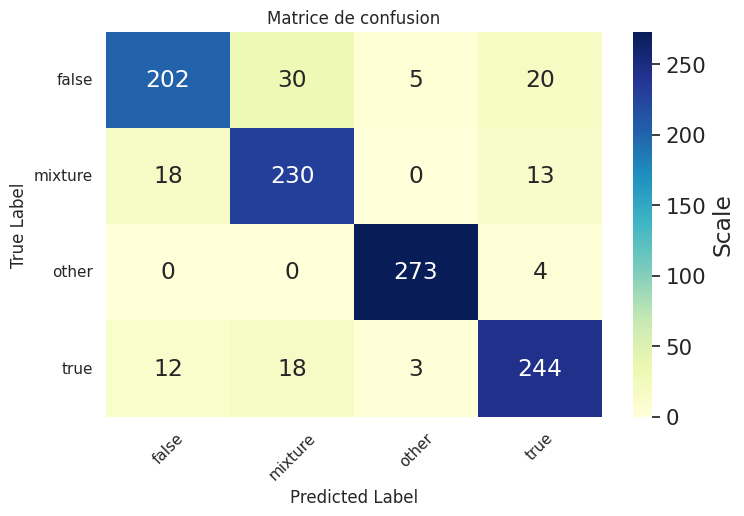

In [ ]:
classifiers.append('Support Vector Machine')
svc = SVC(C=10, gamma=0.1)
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

precisions.append(precision_score(y_test, svc_pred, average='weighted'))
recalls.append(recall_score(y_test, svc_pred, average='weighted'))
f1_scores.append(f1_score(y_test, svc_pred, average='weighted'))


accuracies.append(svc.score(X_test, y_test))


show_scores(y_test, svc_pred, show_classification_report=True, show_confusion_matrix=True)

####**Random Forest**

Classification Report
              precision    recall  f1-score   support

       false    0.77656   0.82490   0.80000       257
     mixture    0.84314   0.82375   0.83333       261
       other    0.98921   0.99278   0.99099       277
        true    0.87218   0.83755   0.85451       277

    accuracy                        0.87127      1072
   macro avg    0.87027   0.86975   0.86971      1072
weighted avg    0.87242   0.87127   0.87155      1072



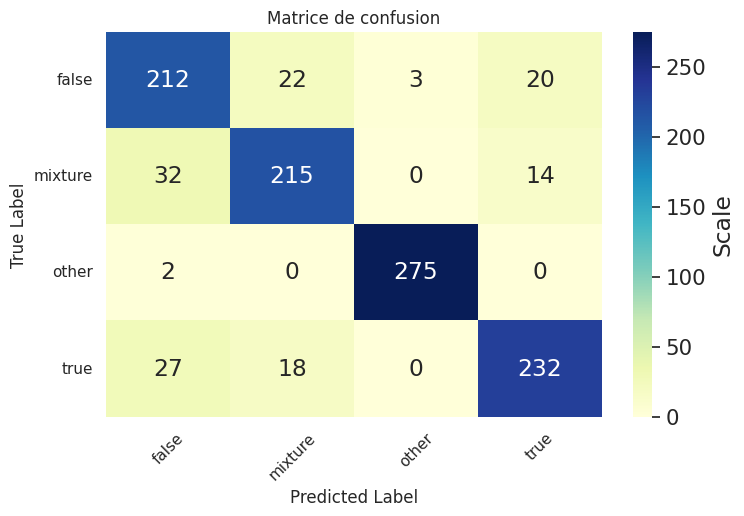

In [ ]:
classifiers.append('Random Forest Classifier')
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

precisions.append(precision_score(y_test, rfc_pred, average='weighted'))
recalls.append(recall_score(y_test, rfc_pred, average='weighted'))
f1_scores.append(f1_score(y_test, rfc_pred, average='weighted'))
accuracies.append(rfc.score(X_test, y_test))

show_scores(y_test, rfc_pred, show_classification_report=True, show_confusion_matrix=True)

####**Gaussian Naive Bayes**

Classification Report
              precision    recall  f1-score   support

       false    0.80932   0.74319   0.77485       257
     mixture    0.83077   0.82759   0.82917       261
       other    0.97865   0.99278   0.98566       277
        true    0.78983   0.84116   0.81469       277

    accuracy                        0.85354      1072
   macro avg    0.85214   0.85118   0.85109      1072
weighted avg    0.85326   0.85354   0.85284      1072



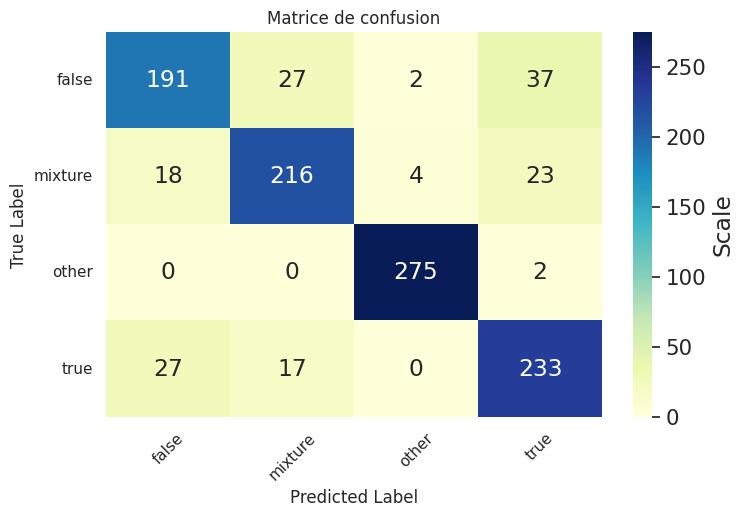

In [ ]:
classifiers.append('Gaussian NB')
gnbc = GaussianNB()

gnbc.fit(X_train.toarray(), y_train)

gnbc_pred = gnbc.predict(X_test.toarray())

precisions.append(precision_score(y_test, gnbc_pred, average='weighted'))
recalls.append(recall_score(y_test, gnbc_pred, average='weighted'))
f1_scores.append(f1_score(y_test, gnbc_pred, average='weighted'))

accuracies.append(gnbc.score(X_test.toarray(), y_test))

show_scores(y_test, gnbc_pred, show_classification_report=True, show_confusion_matrix=True)

####**Logistic Regression**

Classification Report
              precision    recall  f1-score   support

       false    0.80417   0.75097   0.77666       257
     mixture    0.79478   0.81609   0.80529       261
       other    0.91901   0.94224   0.93048       277
        true    0.80357   0.81227   0.80790       277

    accuracy                        0.83209      1072
   macro avg    0.83038   0.83039   0.83008      1072
weighted avg    0.83140   0.83209   0.83145      1072



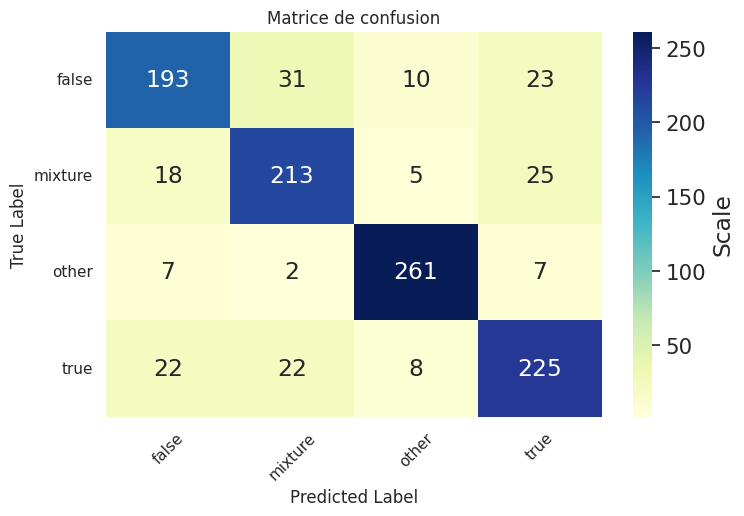

In [ ]:
classifiers.append('Logistic Regression')
lrc = LogisticRegression(max_iter=10000)

lrc.fit(X_train, y_train)

lrc_predicted = lrc.predict(X_test)

precisions.append(precision_score(y_test, lrc_predicted, average='weighted'))
recalls.append(recall_score(y_test, lrc_predicted, average='weighted'))
f1_scores.append(f1_score(y_test, lrc_predicted, average='weighted'))

accuracies.append(lrc.score(X_test, y_test))

show_scores(y_test, lrc_predicted, show_classification_report=True, show_confusion_matrix=True)

####**Decision Tree**

Classification Report
              precision    recall  f1-score   support

       false    0.72947   0.58755   0.65086       257
     mixture    0.79779   0.83142   0.81426       261
       other    0.91362   0.99278   0.95156       277
        true    0.76027   0.80144   0.78032       277

    accuracy                        0.80690      1072
   macro avg    0.80029   0.80330   0.79925      1072
weighted avg    0.80165   0.80690   0.80179      1072



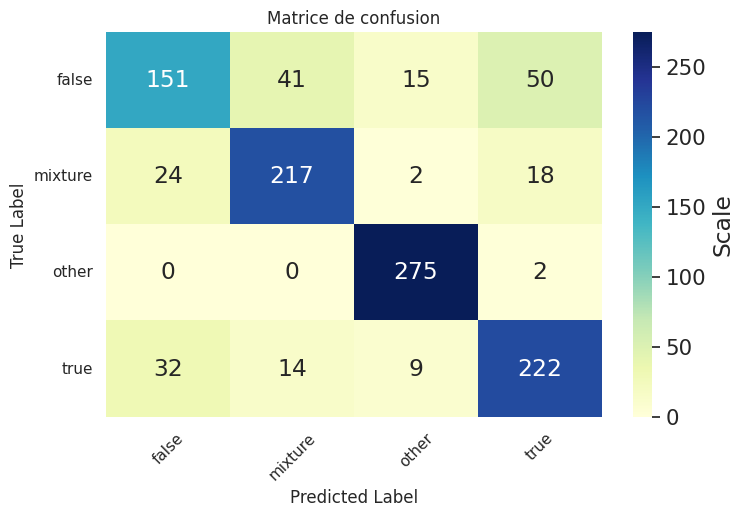

In [ ]:
classifiers.append('Decision Tree')
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)

precisions.append(precision_score(y_test, dtc_pred, average='weighted'))
recalls.append(recall_score(y_test, dtc_pred, average='weighted'))
f1_scores.append(f1_score(y_test, dtc_pred, average='weighted'))

accuracies.append(dtc.score(X_test, y_test))
show_scores(y_test, dtc_pred, show_classification_report=True, show_confusion_matrix=True)

####**KNN Classifier**

Classification Report
              precision    recall  f1-score   support

       false    0.63755   0.56809   0.60082       257
     mixture    0.64234   0.67433   0.65794       261
       other    0.79027   0.93863   0.85809       277
        true    0.65417   0.56679   0.60735       277

    accuracy                        0.68937      1072
   macro avg    0.68108   0.68696   0.68105      1072
weighted avg    0.68247   0.68937   0.68289      1072



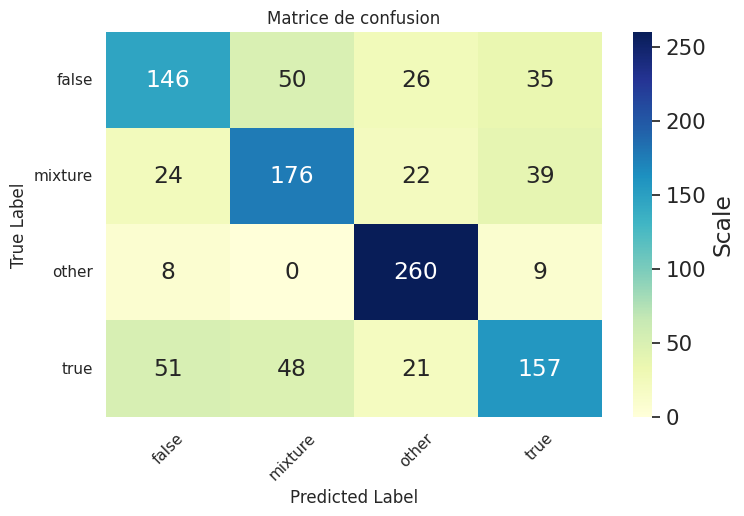

In [ ]:
classifiers.append('KNN')
knnc = KNeighborsClassifier()

knnc.fit(X_train, y_train)

knnc_pred = knnc.predict(X_test)

precisions.append(precision_score(y_test, knnc_pred, average='weighted'))
recalls.append(recall_score(y_test, knnc_pred, average='weighted'))
f1_scores.append(f1_score(y_test, knnc_pred, average='weighted'))

accuracies.append(knnc.score(X_test, y_test))
show_scores(y_test, knnc_pred, show_classification_report=True, show_confusion_matrix=True)

####**Multinomial NB Classifier**

Classification Report
              precision    recall  f1-score   support

       false    0.79327   0.64202   0.70968       257
     mixture    0.80444   0.69349   0.74486       261
       other    0.91078   0.88448   0.89744       277
        true    0.63784   0.85199   0.72952       277

    accuracy                        0.77146      1072
   macro avg    0.78658   0.76799   0.77037      1072
weighted avg    0.78619   0.77146   0.77189      1072



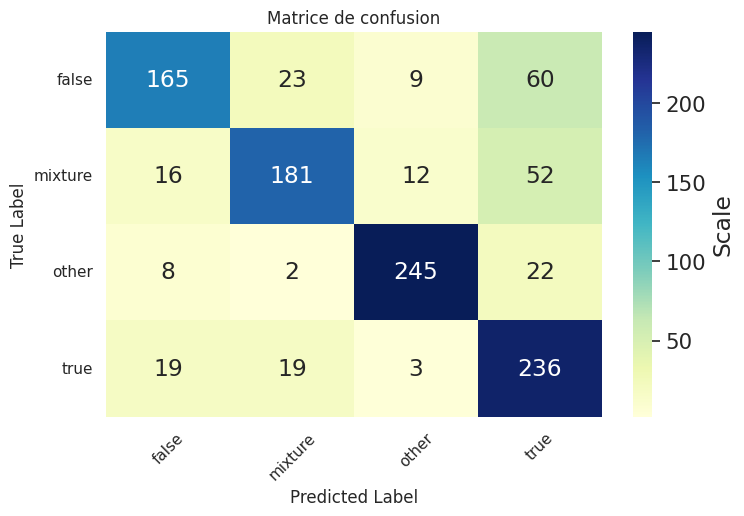

In [ ]:
classifiers.append('Multinomial NB')
mnbc = MultinomialNB()

mnbc.fit(X_train, y_train)

mnbc_pred = mnbc.predict(X_test)

precisions.append(precision_score(y_test, mnbc_pred, average='weighted'))
recalls.append(recall_score(y_test, mnbc_pred, average='weighted'))
f1_scores.append(f1_score(y_test, mnbc_pred, average='weighted'))

accuracies.append(mnbc.score(X_test, y_test))
show_scores(y_test, mnbc_pred, show_classification_report=True, show_confusion_matrix=True)

###**Visualisation des résultat**

####**Accuracy**

In [ ]:
clf_acc_map = {'classifiers': classifiers, 'accuracies': accuracies, 'precisions': precisions, 'f1_scores': f1_scores, 'recalls': recalls}
df_acc = pd.DataFrame(clf_acc_map)
df_acc

classifiers  accuracies  precisions  f1_scores   recalls
0    Support Vector Machine    0.885261    0.885581   0.884671  0.885261
1  Random Forest Classifier    0.871269    0.872424   0.871553  0.871269
2               Gaussian NB    0.853545    0.853260   0.852842  0.853545
3       Logistic Regression    0.832090    0.831403   0.831450  0.832090
4             Decision Tree    0.806903    0.801648   0.801793  0.806903
5                       KNN    0.689366    0.682473   0.682892  0.689366
6            Multinomial NB    0.771455    0.786192   0.771886  0.771455

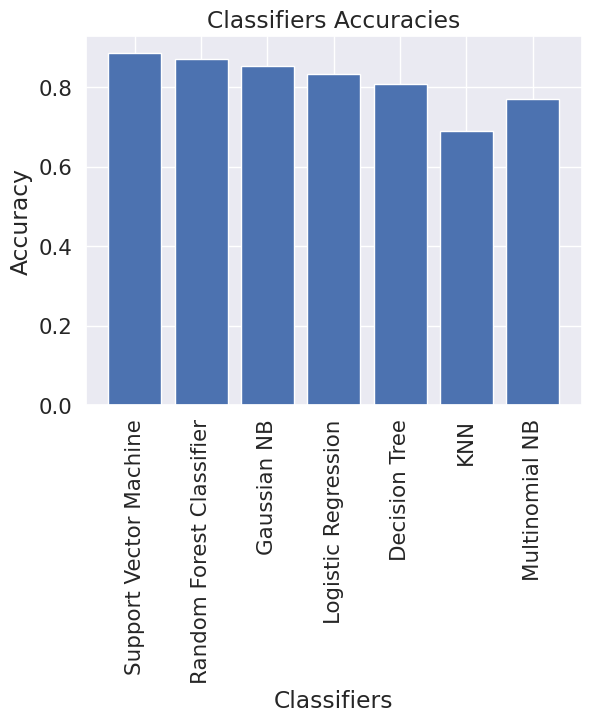

In [ ]:
plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title('Classifiers Accuracies')
plt.show()

####**Precision**

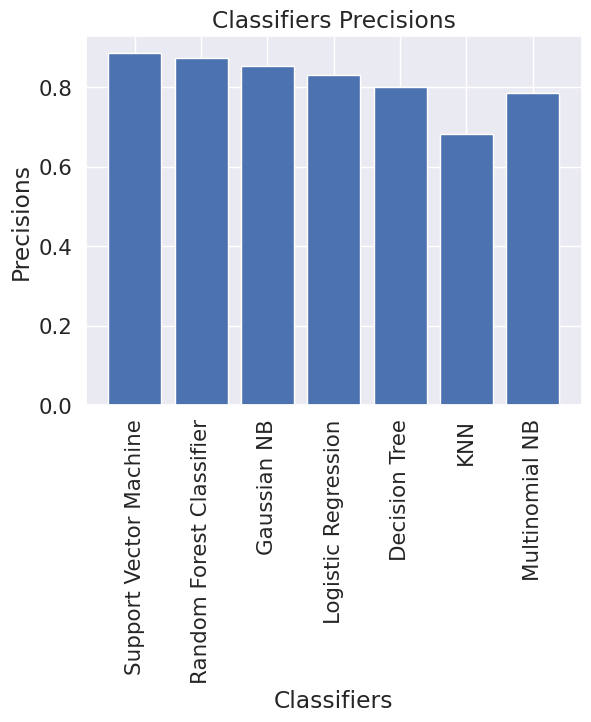

In [ ]:
plt.bar(classifiers, precisions)
plt.xlabel('Classifiers')
plt.ylabel('Precisions')
plt.xticks(rotation=90)
plt.title('Classifiers Precisions')
plt.show()

####**F1 Score**

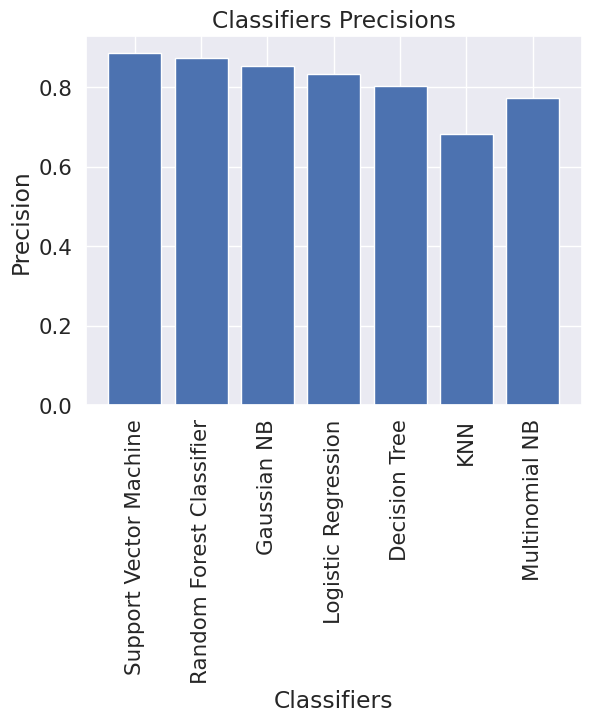

In [ ]:
plt.bar(classifiers, f1_scores)
plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.xticks(rotation=90)
plt.title('Classifiers Precisions')
plt.show()

####**Recall**


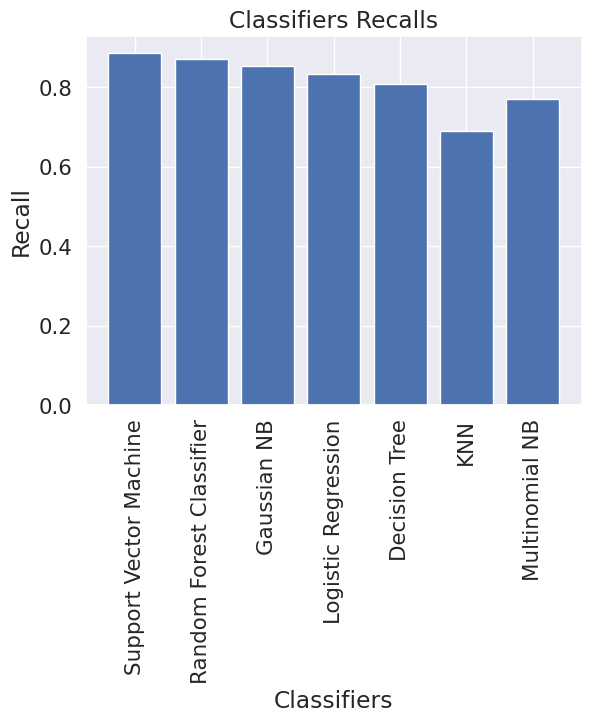

In [ ]:
plt.bar(classifiers, recalls)
plt.xlabel('Classifiers')
plt.ylabel('Recall')
plt.xticks(rotation=90)
plt.title('Classifiers Recalls')
plt.show()